# Part I - The Programme for International Student Assessment (PISA) Data Exploration
## by Ogunlana. A. Adejoke


## Introduction

### PISA Dataset Description 

> The Program for International Student Assessment (PISA) is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test that focuses on examining how well students have learnt the school curriculum; rather, it is an international assessment that tests how well students are prepared for life beyond school.

> There are 5233 students in 2 economies, all Non-OECD member countries that took part in the PISA assessment of reading, mathematics and science literacy. In addition to that, the dataset also consist of 636 variables/features describing each student’s background, personality and academic performance. Some of the variables were repeated and some were condensed, so effort was made to select the important features/variables necessary for the analysis. Some of the selected features/variables include: the student's country, age, grade, gender; whether they are male or female, if they repeated a grade or not, perseverance level, immigration status, class management, teacher support, student-teacher relation, parents highest level of education and parent's highest education years to mention a few. The dataset was gathered from Udacity hosted site available [here](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub). In addition, the PISA data dictionary can also be obtained from [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv&sa=D&ust=1554482573645000).

### Question(s) for Analysis
Furthermore, the various variables enumerated above were explored to understand the relationship between/among them. This further provide insights into the student's personality and highlight the factors that would affect their academic performance. To achieve these, several questions were asked, some of which include: 
> 1. What are the factors responsible for student's academic performance in school?
> 2. Do students who learned for long hours perform better academically than those who learned for short hours?
> 3. What is the impact of class repetition on student's academic performance?
> 4. Does the immigration status of a student affect his/her academic performance?
> 5. What is the relationship between students who give up easily and their academic performance?
> 6. Could immigration status and student's perseverance level to give up easily hinder students from perform well academically?
> 7. Does classroom management have an impact on student's academic performance?
> 8. What attributes can be ascribed to student's failure in their academic studies?
> 9. How does teacher's suport influence the academic performance of students?
> 10. Have students learnt the school curriculum well enough?
> 11. What is the impact of student-teacher relationship on student's academic achievement?
> 12. Does good academic achievement of student implies that students are prepared for life within and outside school?   

> These questions and **many more** will be addressed in this report. Moreso, data visualizations to further shed light on the analysis will be included. 



## Preliminary Wrangling
 

In [250]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Comment 1:  
The next step is to load in the **"PISA"** dataset and describe its properties.

In [251]:
# load in the dataset into a pandas dataframe
pisa = pd.read_csv('pisa.csv', sep= ",")

## Assessing Data
- In this section, I will do little assessment to detect and document some **quality issues and  tidiness issue**. 
- I will also use **both** visual assessment and programmatic assessement to assess the data.

- Before then, I need to assess the dataset to gather more information such as the number of columns, rows, the statistics of each data in each dataframe, shapes, data types and others.
- In addition, I need to check for missing values, duplicated data, redundant columns, unique values or characters etc.

In [252]:
# high-level overview of data shape and composition
print(pisa.shape)
print('\n')
print(pisa.dtypes)
pisa.head(10)

(5233, 636)


Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
               ...   
W_FSTR80      float64
WVARSTRR      float64
VAR_UNIT      float64
SENWGT_STU    float64
VER_STU        object
Length: 636, dtype: object


,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
5,6,Albania,80000,ALB0006,Non-OECD,Albania,1,6,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
6,7,Albania,80000,ALB0006,Non-OECD,Albania,1,7,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19.0,1.0,0.2098,22NOV13
7,8,Albania,80000,ALB0006,Non-OECD,Albania,1,8,10,1,...,14.4599,14.6374,15.8728,15.8728,5.2248,15.2579,19.0,1.0,0.2322,22NOV13
8,9,Albania,80000,ALB0006,Non-OECD,Albania,1,9,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19.0,1.0,0.1999,22NOV13
9,10,Albania,80000,ALB0005,Non-OECD,Albania,2,10,10,1,...,3.3844,10.1533,3.3844,10.1533,10.1533,10.1533,74.0,2.0,0.1594,22NOV13


In [253]:
# Get more information on the dataset
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(353), int64(14), object(269)
memory usage: 25.4+ MB


#### Comment 2: 
Due to the large number of columns in the PISA dataset, this function could not list out the total columns in the PISA dataset.

In [254]:
# Check an overview on the statistics of the dataset
pisa.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,5233.00000,5.233000e+03,5233.000000,5233.000000,5233.000000,5233.000000,5233.000000,5233.0,4996.000000,4884.000000,...,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000
mean,2617.00000,8.066337e+05,95.288171,2172.881903,9.623925,1.124403,6.315116,1996.0,6.361689,1.242424,...,8.429316,8.323052,8.328039,8.367237,8.165812,8.254512,8.274102,40.869839,1.514717,0.197386
std,1510.78131,2.260922e+06,62.783150,1444.015784,0.579974,0.463090,3.387933,0.0,0.782878,0.531800,...,6.887186,7.019799,7.176734,6.196027,6.149730,6.824609,6.311611,23.434703,0.519707,0.111031
min,1.00000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.0,4.000000,1.000000,...,0.309100,0.309600,0.309600,0.309100,0.309100,0.309100,0.318000,1.000000,1.000000,0.023500
25%,1309.00000,8.000000e+04,35.000000,819.000000,9.000000,1.000000,3.000000,1996.0,6.000000,1.000000,...,3.857700,3.837000,3.837600,3.823600,3.820800,3.854500,3.871500,20.000000,1.000000,0.146700
50%,2617.00000,8.000000e+04,95.000000,2127.000000,10.000000,1.000000,6.000000,1996.0,6.000000,1.000000,...,6.056800,5.577700,5.419900,6.647000,5.577700,5.388100,5.702850,41.000000,2.000000,0.187800
75%,3925.00000,8.000000e+04,149.000000,3435.000000,10.000000,1.000000,9.000000,1996.0,7.000000,1.000000,...,11.963600,11.957500,11.963600,12.244325,11.957500,11.916100,11.999300,62.000000,2.000000,0.221200
max,5233.00000,7.840200e+06,204.000000,4743.000000,12.000000,4.000000,12.000000,1996.0,16.000000,4.000000,...,75.555200,75.555200,75.555200,63.491300,63.491300,75.555200,61.031500,80.000000,3.000000,1.140200


In [255]:
# Check for missing data in the pisa dataset
pisa.isnull().sum().any()

True

In [256]:
# Check for sum of missing data for rows and columns in the pisa dataset
print(sum(pisa.isnull().values.any(axis=0)))

# Check for sum of missing data for rows in the pisa dataset
sum(pisa.isnull().values.any(axis=1))

617


5233

In [257]:
# Check for the sum of duplicated values
sum(pisa.duplicated())

0

In [258]:
# Check the unique values of REPEAT
pisa.REPEAT.unique()

array(['Did not repeat a <grade>', nan, 'Repeated a <grade>'],
      dtype=object)

In [259]:
# Check the unique values of AGE
pisa['AGE'].unique()

array([16.17, 15.58, 15.67, 15.5 , 16.08, 15.83, 15.92, 16.  , 15.75,
       16.25, 15.33, 15.42, 16.33,   nan])

In [260]:
# Check the unique values of PARED
pisa['PARED'].unique()

array([12., 16., 10.,  3.,  6., 15., nan,  9.,  5.])

In [261]:
# Check the unique values of OECD
pisa.OECD.unique()

# Since the unique value here is only one, signifying that all students are from countries in OECD. 

array(['Non-OECD'], dtype=object)

In [262]:
# Check the unique values of TIMEINT (Time of computer use (mins))
pisa.TIMEINT.unique()

array([nan])

In [263]:
# Check the unique values of ICTSCH (ICT Availability at School)
pisa.ICTSCH.unique()

array([nan])

In [264]:
# Check the unique values of ST44Q03 (Attributions to Failure - Teacher Did Not Explain Well)
pisa.ST44Q03.unique()

array(['Slightly likely', 'Likely', nan, 'Not at all likely',
       'Very   Likely'], dtype=object)

In [265]:
# Check the unique values of ST44Q07 (Attributions to Failure - Teacher Did not Get Students Interested)
pisa.ST44Q07.unique()

array(['Likely', 'Slightly likely', 'Very   Likely', nan,
       'Not at all likely'], dtype=object)

In [266]:
# Check the unique values of ST85Q01 (Classroom Management - Students Listen)
pisa.ST85Q01.unique()

array(['Agree', nan, 'Strongly agree', 'Strongly disagree', 'Disagree'],
      dtype=object)

In [267]:
# Check the unique values of ST83Q04 (Teacher Support - Let Us Know We Have to Work Hard)
pisa.ST83Q04.value_counts()

Strongly agree       1620
Agree                1155
Disagree              145
Strongly disagree      69
Name: ST83Q04, dtype: int64

In [268]:
# Check the unique values of STUDREL (Student-Teacher relation)
pisa.STUDREL.unique()

array([-1.04,   nan, -0.02,  0.81,  1.13,  1.51,  2.16,  0.45, -0.48,
        0.52,  0.53, -1.26, -1.47, -0.79, -0.64,  0.59, -3.11, -0.55,
        0.71, -1.91, -0.05,  0.  ,  0.95,  0.57,  1.35, -0.56,  1.38,
       -0.54,  2.04, -0.03, -0.08, -1.23, -1.68, -0.15,  2.09, -0.9 ,
       -1.46,  0.01, -0.66,  0.98, -0.97, -2.16,  1.72,  2.06, -0.6 ,
        1.42,  0.93,  0.99,  1.  ,  2.02, -1.48, -2.5 ])

In [269]:
# Check the unique values of HISCED
pisa.HISCED.unique()

array(['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 3B, C', 'ISCED 2',
       'ISCED 5B', 'None', 'ISCED 1', nan], dtype=object)

In [270]:
# Check the unique values of ST44Q03
pisa.ST44Q03.unique()

array(['Slightly likely', 'Likely', nan, 'Not at all likely',
       'Very   Likely'], dtype=object)

In [271]:
# Check the unique values of ST44Q07
pisa.ST44Q07.unique()

array(['Likely', 'Slightly likely', 'Very   Likely', nan,
       'Not at all likely'], dtype=object)

### Quality issues: 

- Drop redundant columns: columns with more null values are considered redundant and thus regarded as low-level information columns.
- Incorrect data type for "AGE" and "PARED" from float to integer
- Rename the columns appropriately for better representation/information purpose.
- Fixing formatting error by remove the **greater than and less than symbol** from the **grade** word in the **REPEAT column**
- Fix the formatting error in the ST44Q03, ST44Q07 and HISCED columns.

### Tidiness issues

- Condense the plausible values in **mathematics** ['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH'], in **reading** ['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ'] and in **science** ['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE'] by finding the mean. Thereafter rename the mean of each subject as **'Average_math_literacy', 'Average_reading_literacy' and 'Average_science_literacy'** respectively.

- Condense the **Learning time(minutes per week) columns for Science, text language and mathematics** ('SMINS','LMINS','MMINS' respectively) by finding the mean of these and renaming it in a column called **Average_learning_time** 

## Cleaning Data
In this section, **all** issues documented will be addressed and cleaned. 

### Action 1: Create copy of the dataframe

In [272]:
# Before cleaning, create a copy of the dataframe so as to get back to the original dataset in case the need arises.
df_pisa =pisa.copy()

### Action 2: Address the tidiness issues which has to do with feature engineering

### Issue #1: Condense the plausible values in the mathematics, reading and sciences. Thereafter, find the average

#### Define:
Find the average of the 5 plausible variables for each subjects below 
- PV1MATH to PV5MATH for Mathematics;
- PV1SCIE to PV5SCIE for Science
- PV1READ to PV5READ for Reading

and save each average created for each subjects as 
- Average_math_literacy
- Average_science_literacy
- Average_reading_literacy respectively

#### Code:

In [273]:
# For Mathematics
df_pisa[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].describe()

,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
count,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000
mean,400.173338,399.932003,400.436557,399.857713,399.097832
std,93.527959,93.219210,94.077933,94.012758,94.018127
min,62.400700,60.998600,53.910300,66.373300,37.085200
25%,340.559300,338.222500,339.858200,340.637200,340.773525
50%,402.173200,402.173200,400.887950,401.628000,398.901700
75%,461.528300,460.866150,461.314075,462.015075,459.931450
max,692.794800,719.278700,751.215100,717.798700,690.302200


In [274]:
df_pisa['Average_math_literacy'] = df_pisa[['PV1MATH','PV2MATH','PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis=1)
df_pisa['Average_math_literacy']

0       366.18634
1       470.56396
2       505.53824
3       449.45476
4       385.50398
          ...    
5228    574.70790
5229    608.98114
5230    435.43388
5231    646.99332
5232          NaN
Name: Average_math_literacy, Length: 5233, dtype: float64

In [275]:
# For Reading 
df_pisa[['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ']].describe()

,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ
count,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000
mean,401.928187,402.319508,400.444503,402.404353,400.930271
std,115.084330,115.105851,115.013770,115.515613,115.768850
min,0.083400,3.109300,2.387600,4.849200,2.307400
25%,330.363050,330.774525,330.516400,330.595800,332.728775
50%,410.265100,408.438200,407.369800,409.907700,406.589600
75%,479.926100,480.958700,478.337500,481.148800,481.180700
max,742.048500,784.146900,734.899700,770.891600,796.233000


In [276]:
df_pisa['Average_reading_literacy'] = df_pisa[['PV1READ','PV2READ','PV3READ', 'PV4READ', 'PV5READ']].mean(axis=1)
df_pisa['Average_reading_literacy']

0       261.01424
1       384.68832
2       405.18154
3       477.46376
4       256.01010
          ...    
5228    509.37726
5229    523.65190
5230    423.56914
5231    553.16346
5232          NaN
Name: Average_reading_literacy, Length: 5233, dtype: float64

In [277]:
# For Science
df_pisa[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].describe()

,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
count,5232.000000,5232.000000,5232.000000,5232.000000,5232.000000
mean,405.494542,405.818382,405.153235,405.548367,405.180683
std,100.250409,99.622204,100.855630,100.411146,99.224778
min,39.668000,22.417000,40.134300,34.912300,40.134300
25%,343.659100,346.643000,344.778100,345.407500,345.710600
50%,408.420350,409.865700,408.187200,408.840000,407.814250
75%,471.876200,470.570700,472.901900,470.011200,470.663900
max,726.725100,747.612800,744.815400,770.925000,764.397600


In [278]:
df_pisa['Average_science_literacy'] = df_pisa[['PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)
df_pisa['Average_science_literacy']

0       371.91348
1       478.12382
2       486.60946
3       453.97240
4       367.15778
          ...    
5228    493.78966
5229    513.18540
5230    414.52818
5231    609.41812
5232          NaN
Name: Average_science_literacy, Length: 5233, dtype: float64

#### Comment 3: 
- The Academic performance of the students will be based on the mean of the average subject literacies. So I need to find the mean of these average subject literacies per student to know each student's Academic performance. 

#### Define:
- Create another engineered variable called **Academic performance** and this will be the average of the 3 newly created variables (Average_math_literacy, Average_science_literacy and Average_reading_literacy)

#### Code:

In [279]:
df_pisa['Academic_performance'] = df_pisa[['Average_math_literacy','Average_reading_literacy','Average_science_literacy']].mean(axis=1)

#### Test:

In [280]:
df_pisa[['Average_math_literacy','Average_reading_literacy','Average_science_literacy','Academic_performance']].head()

,Average_math_literacy,Average_reading_literacy,Average_science_literacy,Academic_performance
0,366.18634,261.01424,371.91348,333.038020
1,470.56396,384.68832,478.12382,444.458700
2,505.53824,405.18154,486.60946,465.776413
3,449.45476,477.46376,453.97240,460.296973
4,385.50398,256.01010,367.15778,336.223953


### Issue #2:  Condense the learning time(minutes per week) columns for science, text language and mathematics  by finding the average of these and renaming the result in a column called Average_learning_time.

#### Define:
- Perform similar feature engineering as performed for Academic performance.
- Find the average of LMINS','MMINS','SMINS' and save it in a new variable called 'Average learning time'

#### Code:

In [281]:
df_pisa[['LMINS','MMINS','SMINS']].describe()

,LMINS,MMINS,SMINS
count,2876.000000,2885.000000,2815.000000
mean,184.541377,181.512305,162.776554
std,68.125593,68.513792,108.082043
min,40.000000,40.000000,0.000000
25%,135.000000,135.000000,90.000000
50%,180.000000,180.000000,90.000000
75%,225.000000,225.000000,270.000000
max,900.000000,1320.000000,1200.000000


In [282]:
df_pisa['Average_learning_time'] = df_pisa[['LMINS','MMINS','SMINS']].mean(axis=1)
df_pisa['Average_learning_time']

0         NaN
1       225.0
2       300.0
3       120.0
4         NaN
        ...  
5228      NaN
5229    495.0
5230      NaN
5231    787.5
5232      NaN
Name: Average_learning_time, Length: 5233, dtype: float64

#### Test:

In [283]:
df_pisa[['LMINS','MMINS','SMINS','Average_learning_time']].head()

,LMINS,MMINS,SMINS,Average_learning_time
0,NaN,NaN,NaN,NaN
1,315.0,270.0,90.0,225.0
2,300.0,NaN,NaN,300.0
3,135.0,135.0,90.0,120.0
4,NaN,NaN,NaN,NaN


### Action 3: 
- Since there are 636 columns in the entire dataset, there's need to only select the relevant columns to be used for analysis in the dataset. 

In [284]:
# Selecting the important variables as relevant to the analysis.
df_pisa = df_pisa[['CNT','ST04Q01','AGE','GRADE','Average_math_literacy','Average_reading_literacy','Average_science_literacy',
                   'Academic_performance','Average_learning_time','REPEAT', 'IMMIG','ST93Q01', 'HISCED','HISEI','PARED',
                  'ST29Q06','ST88Q01','TEACHSUP', 'STUDREL','ST85Q02','ST85Q03','ST83Q02','ST83Q03','ST86Q02',
                  'ST86Q03','ST86Q04','ST44Q03','ST44Q07']]

where 
- CNT - Country (Categorical)
- ST04Q01 - Gender (Categorical)
- AGE - Age of the student (Numeric).
- GRADE - Grade compared to modal grade in country (Numeric)
- Average_math_literacy - Average achievement score in mathematics (Numeric)
- Average_reading_literacy - Average achievement score in reading (Numeric)
- Average_science_literacy - Average achievement score in science (Numeric)
- Academic_performance - Engineered Variable (Numeric)
- Average_learning_time - Engineered Variable (Numeric)
- HISEI - Highest parental occupational status (Numeric)
- PARED - Highest parental education in years (Numeric)
- HISCED - Highest educational level of parents (Categorical)
- REPEAT - Class_repetition (Class_repetition) (Categorical)
- IMMIG - Immigration status of the student (Categorical)
- ST93Q01 - Perseverance: Give up easily (Categorical)
- TEACHSUP - Teacher Support
- ST83Q02 - Teacher Support - Provides Extra Help When Needed
- ST83Q03 - Teacher Support - Helps Students with Learning
- STUDREL - Student-Teacher Relation
- ST44Q03 - Attributions to Failure - Teacher Did Not Explain Well
- ST44Q07 - Attributions to Failure - Teacher Did'nt Get Students Interested
- ST29Q06 - Math Interest - Interested
- ST88Q01 - Attitude towards School - Does Little to Prepare Me for Life
- ST85Q02 - Classroom Management - Teacher Keeps Class Orderly	
- ST85Q03 - Classroom Management - Teacher Starts On Time
- ST86Q02 - Student-Teacher Relation - Teachers Are Interested
- ST86Q03 - Student-Teacher Relation - Teachers Listen to Students
- ST86Q04 - Student-Teacher Relation - Teachers Help Students

### Issue #3:  Rename the columns appropriately for better representation/information purpose.

In [285]:
df_pisa.rename(columns =   {'CNT'   :'Country', 
                          'ST04Q01' : 'Gender',
                          'AGE'     : 'Age',
                          'GRADE'   : 'Grade',
                          'IMMIG'   : 'Immigration_status',
                          'ST93Q01' : 'Perseverance_Give_up_easily',
                          'HISCED'  : 'Highest_educational_level_parents',
                          'HISEI'   : 'Highest_parental_occupational_status',
                          'TEACHSUP': 'Teacher_support',
                          'ST83Q02' : 'Teacher_support_help_when_needed',
                          'ST83Q03' : 'Teacher_support_help_learn',
                          'STUDREL' : 'Student_teacher_relation',
                          'REPEAT'  : 'Class_repetition',
                          'PARED'   : 'Highest_parental_education_years',
                          'ST44Q03' : 'Teacher_did_not_explain_well',
                          'ST44Q07' : 'Teacher_did_not_get_students_interested',
                          'ST29Q06' : 'Math_interest',
                          'ST88Q01' : 'School_does_little_to_prepare_me_for_life',
                          'ST85Q02' : 'Class_management_teacher_keep_class_orderly',
                          'ST85Q03' : 'Class_management_teacher_starts_on_time',
                          'ST86Q02' : 'Student_teacher_relation_teachers_are_interested',
                          'ST86Q03' : 'Student_teacher_relation_teachers_listen_to_students',
                          'ST86Q04' : 'Student_teacher_relation_teachers_help_students'}, inplace = True);
df_pisa.head()

,Country,Gender,Age,Grade,Average_math_literacy,Average_reading_literacy,Average_science_literacy,Academic_performance,Average_learning_time,Class_repetition,...,Student_teacher_relation,Class_management_teacher_keep_class_orderly,Class_management_teacher_starts_on_time,Teacher_support_help_when_needed,Teacher_support_help_learn,Student_teacher_relation_teachers_are_interested,Student_teacher_relation_teachers_listen_to_students,Student_teacher_relation_teachers_help_students,Teacher_did_not_explain_well,Teacher_did_not_get_students_interested
0,Albania,Female,16.17,0.0,366.18634,261.01424,371.91348,333.038020,NaN,Did not repeat a <grade>,...,-1.04,Strongly disagree,Disagree,Agree,Agree,Strongly disagree,Agree,Agree,Slightly likely,Likely
1,Albania,Female,16.17,0.0,470.56396,384.68832,478.12382,444.458700,225.0,Did not repeat a <grade>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slightly likely,Slightly likely
2,Albania,Female,15.58,-1.0,505.53824,405.18154,486.60946,465.776413,300.0,Did not repeat a <grade>,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Likely,Very Likely
3,Albania,Female,15.67,-1.0,449.45476,477.46376,453.97240,460.296973,120.0,Did not repeat a <grade>,...,NaN,NaN,NaN,Strongly agree,Strongly agree,NaN,NaN,NaN,NaN,NaN
4,Albania,Female,15.50,-1.0,385.50398,256.01010,367.15778,336.223953,NaN,Did not repeat a <grade>,...,-0.02,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Likely,Slightly likely


In [286]:
df_pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 28 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               5233 non-null   object 
 1   Gender                                                5233 non-null   object 
 2   Age                                                   5232 non-null   float64
 3   Grade                                                 5232 non-null   float64
 4   Average_math_literacy                                 5232 non-null   float64
 5   Average_reading_literacy                              5232 non-null   float64
 6   Average_science_literacy                              5232 non-null   float64
 7   Academic_performance                                  5232 non-null   float64
 8   Average_learning_time                                 2937

### Issue #4:   Drop all redundant columns

#### Define:
- Columns with more null values are considered redundant and thus regarded as low-level information columns
- Check for redundant columns by calculating the percentage of missing values
- Drop the columns with the more than 90% of missing values.

#### Code:

In [287]:
for i in df_pisa.columns:
    if(df_pisa[i].isna().sum()/len(df_pisa)) * 100 > 90:
        df_pisa.drop(i, axis=1,inplace=True)
    else:
        pass

#### Test: 

In [288]:
print(df_pisa.shape)

df_pisa.info()

(5233, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               5233 non-null   object 
 1   Gender                                                5233 non-null   object 
 2   Age                                                   5232 non-null   float64
 3   Grade                                                 5232 non-null   float64
 4   Average_math_literacy                                 5232 non-null   float64
 5   Average_reading_literacy                              5232 non-null   float64
 6   Average_science_literacy                              5232 non-null   float64
 7   Academic_performance                                  5232 non-null   float64
 8   Average_learning_time                          

#### Comment 4: 
- The Highest_parental_occupational_status column was detected as the redundant column and was dropped

### Issue #5:   Fix the formatting error in the Class_repetition, Teacher did not explain well, Teacher did not get students interested and Highest_educational_level_parents columns.

#### Define:
- Removing '<>' from the 'Class_repetition' column data.
- For consistency purpose, replace **Very Likely** in "Teacher did not explain well" and "Teacher did not get students interested" columns to **Very likely**.
- For consistency sake, replacing the **ISCED 3A, ISCED 4** in "Highest_educational_level_parents" column to **ISCED 3A, 4**.

#### Code:

In [289]:
df_pisa.Class_repetition = df_pisa.Class_repetition.str.replace('<',"");
df_pisa.Class_repetition = df_pisa.Class_repetition.str.strip('>');

In [290]:
df_pisa.Teacher_did_not_explain_well = df_pisa.Teacher_did_not_explain_well.str.replace('Very   Likely', 'Very likely')

In [291]:
df_pisa.Teacher_did_not_get_students_interested = df_pisa.Teacher_did_not_get_students_interested.str.replace('Very   Likely', 
                                                                                                              'Very likely')

In [292]:
df_pisa.Highest_educational_level_parents = df_pisa.Highest_educational_level_parents.str.replace('ISCED 3A, ISCED 4',
                                                                                                  "ISCED 3A, 4");

#### Test:

In [293]:
df_pisa.Class_repetition.value_counts()

Did not repeat a grade    4601
Repeated a grade           232
Name: Class_repetition, dtype: int64

In [294]:
df_pisa.Teacher_did_not_explain_well.unique()

array(['Slightly likely', 'Likely', nan, 'Not at all likely',
       'Very likely'], dtype=object)

In [295]:
df_pisa.Teacher_did_not_get_students_interested.unique()

array(['Likely', 'Slightly likely', 'Very likely', nan,
       'Not at all likely'], dtype=object)

In [296]:
df_pisa.Highest_educational_level_parents.value_counts()

ISCED 3A, 4    2141
ISCED 5A, 6    1392
ISCED 2         780
None            368
ISCED 5B        341
ISCED 3B, C     152
ISCED 1          51
Name: Highest_educational_level_parents, dtype: int64

### Issue #6:   Fix the datatype where appropriate

#### Define:
- Change the datatype of Age and Highest parental education in years from float to years.
- Before then, I will like to replace the nan values in the two columns with the minimum number of those columns.

#### Code:

In [297]:
# replacing the nan in Age column with minimum number of that column
df_pisa['Age'] = df_pisa['Age'].fillna(df_pisa['Age'].min())

# Changing the datatype from float to integer
df_pisa['Age'] = df_pisa['Age'].astype(int)

In [298]:
# replacing the nan in Highest_parental_education_years column with minimum number of that column
df_pisa['Highest_parental_education_years'] = df_pisa['Highest_parental_education_years'].fillna(df_pisa['Highest_parental_education_years'].min())

# Changing the datatype from float to integer
df_pisa['Highest_parental_education_years'] = df_pisa['Highest_parental_education_years'].astype(int)

#### Test:

In [299]:
df_pisa['Age'].unique()

array([16, 15])

In [300]:
df_pisa['Highest_parental_education_years'].unique()

array([12, 16, 10,  3,  6, 15,  9,  5])

#### Comment 5: 
- Now that the dataset is cleaned of all issues, the next step is to save the cleaned dataset to a new dataframe.

## Storing Data
Save gathered, assessed, and cleaned PISA dataset to a CSV file named "df_pisa_clean.csv".

#### Define:
Save the **df_pisa** dataset  to a CSV file named **`df_pisa_clean.csv`**

#### Code:

In [301]:
# Saving the df_pisa to a new dataframe
df_pisa_clean = pd.DataFrame(df_pisa)

# Save the dataframe into a csv file format 
df_pisa_clean.to_csv('df_pisa_clean.csv')

#### Test:

In [302]:
df_pisa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               5233 non-null   object 
 1   Gender                                                5233 non-null   object 
 2   Age                                                   5233 non-null   int32  
 3   Grade                                                 5232 non-null   float64
 4   Average_math_literacy                                 5232 non-null   float64
 5   Average_reading_literacy                              5232 non-null   float64
 6   Average_science_literacy                              5232 non-null   float64
 7   Academic_performance                                  5232 non-null   float64
 8   Average_learning_time                                 2937

In [303]:
# Check the shape of the data after selecting the relevant variables.
df_pisa_clean.shape

(5233, 27)

### What is the structure of your dataset?

> In the pisa dataset, the survey of 5233 students were taken with 636 features describing each student's characteristics, personalities, background and subject literacy. In the variables examined, some are categorical(qualitative) variables and some are numeric(quantitative) variables.The categorical variables are more of ordered factor variables than the nominal variables. In similar manner, the numeric variables are also more of continuous variables than discrete variables. Due to the enormous variables present in the dataset (636), only variables (27) relevant to the analysis intended to be studied were selected.  


### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is the Academic performance of student which is an engineered variable. I am mostly interested in how different factors(variables) influence/affect the academic performance of the students'. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the engineered variable "average learning time" will have strong influence on the academic performance of student. Moreso, factors such as class repetition, class management, student-teacher relation, teacher support, attitude to school, teacher factor, perserverance level to give up easily, immigration status and highest educational level of parents will support my investigation in my feature of interest.

<a id='eda'></a>
## Exploratory Data Analysis

### Analyzing and Visualizing Data
In this section, the wrangled data will be analyzed and visualized. I will be computing statistics and creating visualizations. Moreso, I will be asking some research questions and providing solutions to the questions by computing the relevant statistics and visualizing them on various plots. Before then, there is the need to load the **`df_pisa_clean.csv`** file into a dataframe.

#### Define:
- Load the **`df_pisa_clean.csv`** file to a dataframe for further analysis.

#### Code 

In [304]:
# Loading the csv file to a dataframe
df_pisa_clean = pd.read_csv('df_pisa_clean.csv')

In [305]:
# There is tendency to get another unnamed column index 0 when reading the "df_pisa_clean.csv" file.
# Drop this unnamed column index using the code below.
df_pisa_clean.drop('Unnamed: 0',axis=1, inplace=True)

# Source: https://stackoverflow.com/questions/44620465/why-did-reset-indexdrop-true-function-unwantedly-remove-column

#### Test 

In [306]:
df_pisa_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5233 entries, 0 to 5232
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               5233 non-null   object 
 1   Gender                                                5233 non-null   object 
 2   Age                                                   5233 non-null   int64  
 3   Grade                                                 5232 non-null   float64
 4   Average_math_literacy                                 5232 non-null   float64
 5   Average_reading_literacy                              5232 non-null   float64
 6   Average_science_literacy                              5232 non-null   float64
 7   Academic_performance                                  5232 non-null   float64
 8   Average_learning_time                                 2937

## Univariate Exploration

> Here, individual variables in the **`df_pisa_clean`** dataset will be investigated and the trend in each variable examined will be visualized via plots. 

### Action: 4
- First, let us look at visualization of individual categorical variable.
- To do this, I created functions and loops to reduce repetitive code.

In [307]:
# Since I will be looking at many categorical variables, it is expedient to create a loop for the categorical variables.

base_color = sb.color_palette()[2]
def univariate_plot(var, sort=None):
    print(df_pisa_clean[var].value_counts());
    if sort == True:
        sort_order = df_pisa_clean[var].value_counts().index
        sb.countplot(data=df_pisa_clean, x=var, color=base_color, order = sort_order);
        plt.xlabel(f"Student's {var}", fontsize = 12)
        plt.ylabel('Number of Students',fontsize = 12)
        plt.title(f"Student's Distribution by {var}")
    else:
        sb.countplot(data=df_pisa_clean, x=var, color=base_color);
        plt.xlabel(f"Student's {var}", fontsize = 12)
        plt.ylabel('Number of Students',fontsize = 12)
        plt.title(f"Student's Distribution by {var}")

### Research Question 1:  Which country do most students who took part in the assessment come from?

Albania                 4743
United Arab Emirates     490
Name: Country, dtype: int64


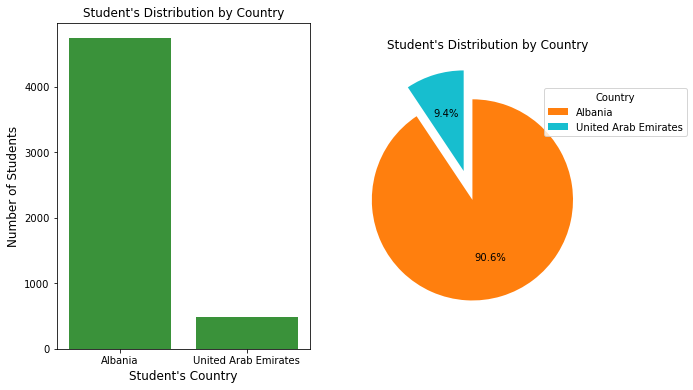

In [308]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

univariate_plot('Country', sort=True)

plt.subplot(1, 2, 2)# row 1, col 2 index 2
colors = ['tab:orange', 'tab:cyan']
sorted_counts = df_pisa_clean.Country.value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.1f%%', explode=[0, 0.3], 
        startangle = 90, colors=colors, counterclock = False, labeldistance=None);
plt.axis('square');
plt.title("Student's Distribution by Country", pad=10)
plt.legend(title= 'Country', bbox_to_anchor=(1.3, 0.9), loc='upper right', borderaxespad=0.4);

#Source: https://www.geeksforgeeks.org/how-to-adjust-title-position-in-matplotlib/
# https://mldoodles.com/matplotlib-pie-chart/

### Observation 1: 
> - In the PISA dataset provided, the **Country** variable which showed the students' country of residence was investigated. A countplot was employed to illustrate the country that has the most students.      
> - Most students that took part in the assessment came from Albania than from the United Arab Emirates according to the analysis. The effect of country on the overall performance of students will be investigated in the later part of this report.

### Research Question 2: Which gender represents most students that took part in the assessment?

Female    2676
Male      2557
Name: Gender, dtype: int64


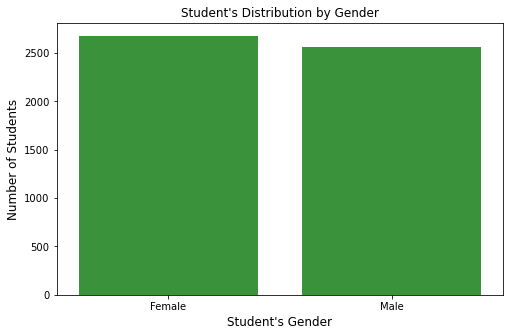

In [309]:
plt.figure(figsize=(8,5))
univariate_plot('Gender', sort=True);

### Observation 2: 
> - In the PISA dataset provided, the **Gender** variable which showed the gender of students was investigated. 
> - There is not much difference between the male gender and female gender that partook in the assessment. The female gender is slightly more than the male gender in the dataset. Thus, it can be concluded that more of female students filled the survey than the male students.

### Research Question 3:  What is the immigration status of most students that partook in the PISA assessment?

Native               4486
First-Generation      230
Second-Generation      96
Name: Immigration_status, dtype: int64


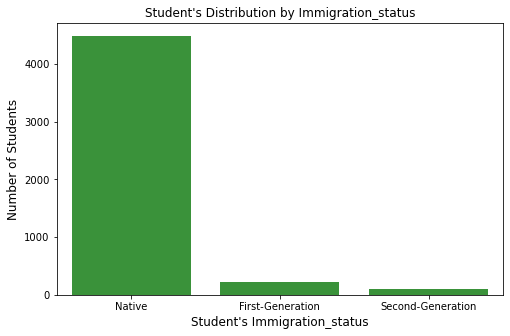

In [310]:
plt.figure(figsize=(8,5))
univariate_plot('Immigration_status', sort=True);

### Comment 6: 
**Immigration Status:** The migration background of a native-born adult is based on the country of birth of his/her parents. Thus, if neither parent is foreign-born, the native-born adult has native origins. Immigrant students are defined here as those who have at least one foreign-born parent. First-generation immigrant students are those who were born outside of a particular country, and second-generation immigrants are those who were born within that particular country or its territories. The analysis covers five immigrant populations :
- first-generation immigrants born in another Member State;
- first-generation immigrants born outside a particular country;
- second-generation immigrants of a particular country origin (native-born with at least one foreign parent where at least one parent was born in a particular country, including the reporting one);
- second-generation immigrants (native-born with both parents born outside a particular country); and
- native-born residents with native backgrounds (i.e. both parents are also native-born).
To understand more about the Immigration status, click [here](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=First_and_second-generation_immigrants_-_statistics_on_education_and_skills) and [here](https://www.childtrends.org/indicators/immigrant-children)
 
 
 ### Observation 3: 
> - The **Immigration status** variable of students who partook in the survey was investigated. 
> - From the statistics and plot above, the highest proportion of students that partook in the survey were more of the Natives (93.2%) than both first-generation (4.8%), and second-generation immigrants (2.0%).

### Research Question 4:  What is the percentage of students that repeated a grade against those that did not in the PISA assessment taken?

Did not repeat a grade    4601
Repeated a grade           232
Name: Class_repetition, dtype: int64


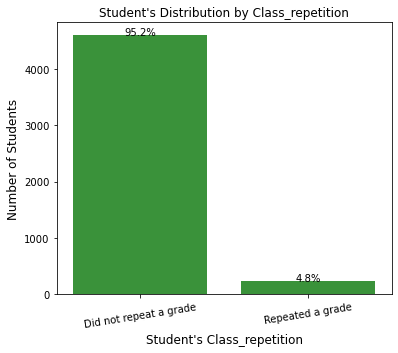

In [311]:
plt.figure(figsize=(6,5))
univariate_plot('Class_repetition',sort=True)

# Calculate the class_repeat_counts just to have clarity.
class_repeat_counts = df_pisa_clean['Class_repetition'].value_counts()
Total_repeat_or_not = df_pisa_clean['Class_repetition'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=9) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = class_repeat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/Total_repeat_or_not)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

### Observation 4: 
Class repetition(Grade repetition) involves the practice of holding back students who had failed to master the curriculum or meet the promotion criteria from reaching the next grade.

> - In the Class_repetition variable investigated in the PISA dataset, the analysis reveal that 95.2% of the students who partook in the survey did not repeat a grade while 4.8% of the students repeated a grade. 
> - This signifies that more students took their studies seriously as against those that did not.

### Research Question 5: Describe the distribution of  "Teacher did not explain well" and "Teacher did not get students interested" variables  as attribution to students' failure in the dataset examined?

Slightly likely      1121
Not at all likely     805
Likely                715
Very likely           273
Name: Teacher_did_not_explain_well, dtype: int64
Slightly likely      1175
Not at all likely     711
Likely                706
Very likely           314
Name: Teacher_did_not_get_students_interested, dtype: int64


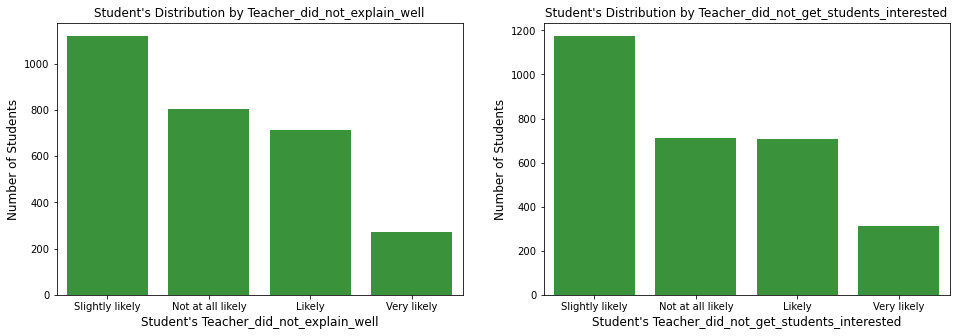

In [312]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
univariate_plot('Teacher_did_not_explain_well', sort=True);

plt.subplot(1,2,2)
univariate_plot('Teacher_did_not_get_students_interested', sort=True);

### Observation 5: 
> - The **"Teacher did not explain well" and "Teacher did not get students interested"** variables are both subsets of student's attribution to failure factor.

> - From the barplots above, it is clear that for most students, the reason for their failure is slightly due to teachers not explaining well and that the teachers did not get them interested in the topics being taught.

### Research Question 6: Explain the distribution of Student-Teacher relationship in the dataset explored?

**NOTE:**
- To answer this question, I examined the various categorical form of student-teacher relationship, those stating the kind of relationship that existed between the student and the teacher. They are: Student_teacher_relation(teachers_are_interested), Student_teacher_relation(teachers_listen_to_students), Student_teacher_relation(teachers_help_students).
- Then, I also examine the numeric form of the student-teacher relation to compare these results together.

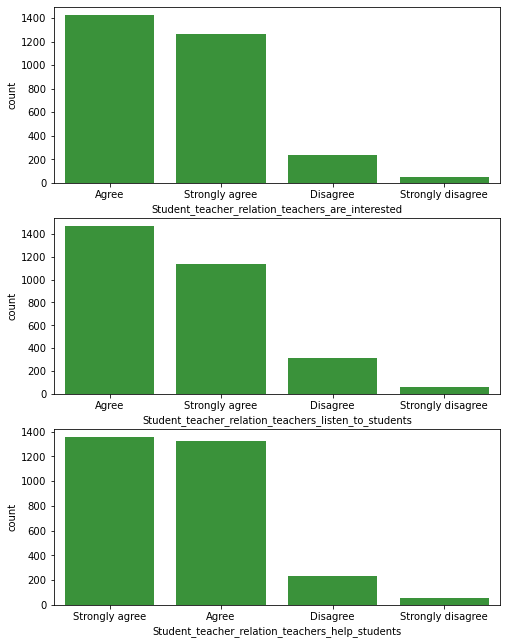

In [313]:
# let's plot all the three categories of Student-Teacher relation together to get an idea of each ordinal variable's distribution of teacher support.

fig, ax = plt.subplots(nrows=3, figsize = [8,11])
default_color = sb.color_palette()[2]

# Dynamic-ordering the bars
# Count the frequency of each unique value in the column of interest, sort it in descending order and return a series

gen_order1 = df_pisa_clean['Student_teacher_relation_teachers_are_interested'].value_counts().index
gen_order2 = df_pisa_clean['Student_teacher_relation_teachers_listen_to_students'].value_counts().index
gen_order3 = df_pisa_clean['Student_teacher_relation_teachers_help_students'].value_counts().index

sb.countplot(data = df_pisa_clean, x = 'Student_teacher_relation_teachers_are_interested', order=gen_order1, 
             color = default_color, ax = ax[0])
sb.countplot(data = df_pisa_clean, x = 'Student_teacher_relation_teachers_listen_to_students',order=gen_order2, 
             color = default_color, ax = ax[1])
sb.countplot(data = df_pisa_clean, x = 'Student_teacher_relation_teachers_help_students',order=gen_order3, 
             color = default_color, ax = ax[2])
plt.show()

### Observation 6a: 
> - From the various form of student-teacher relationship variables examined, the plot showed that most students states that there exist a very good relationship between the students and the teachers. This is seen in the 3 plots above as most students agreed that teachers are interested in their relationship, teachers listens to them and teachers also help them whenever the need arises. 
> - Therefore, it is recommended that teachers should continue to create an enabling environment which will give students an opportunity of understanding the concepts being taught. This kind of enabling environment is to be achieved by developing a good relationship with students.

In [314]:
# For the numeric form of the student-teacher relationship, I employed pandas cut function.
# This is used to segment and sort data values into bins. 
# This function is also useful for going from a continuous variable to a categorical variable 


df_pisa_clean['Student_teacher_relation'] = pd.cut(df_pisa_clean["Student_teacher_relation"], bins = 4, 
                                   labels = ["Strongly disagree","Disagree", "Agree", "Strongly agree"])

Agree                1299
Strongly agree       1193
Disagree              495
Strongly disagree      14
Name: Student_teacher_relation, dtype: int64


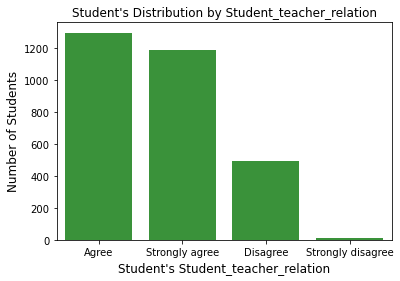

In [315]:
univariate_plot('Student_teacher_relation', sort=True);

### Observation 6b: 
> - The transformed **Student_teacher_relation** variable into categorical variable gave similar observation as does the various form of student-teacher relationship explored above. Most students agreed that there exist a good relationship between the students and the teachers which is in consonant with what was obtained above. The order follows:
> - **Student-Teacher relation = Agree > Strongly Agree > Disagree > Strongly disagree**.


> - For subsequent analysis, this transformed student-teacher-relation variable will be used instead of the various form specifying the kind of relationship that existed between them, unless specified otherwise. 

### Research Question 7: Is Teacher support an important variable in the PISA assessment given?

Strongly agree       1562
Agree                1241
Disagree              159
Strongly disagree      26
Name: Teacher_support_help_when_needed, dtype: int64
Strongly agree       1751
Agree                1103
Disagree              101
Strongly disagree      29
Name: Teacher_support_help_learn, dtype: int64


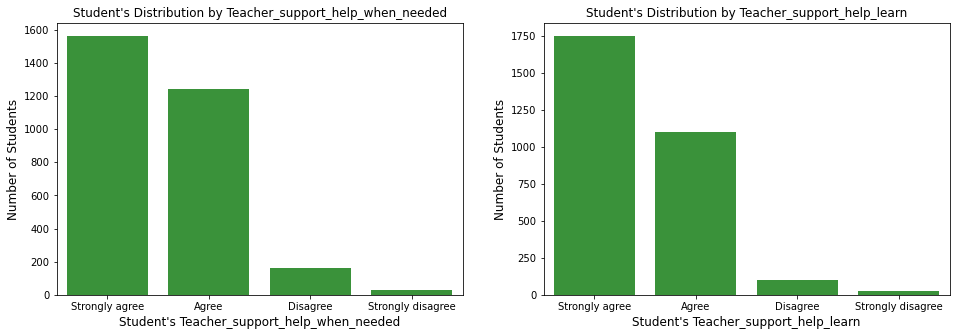

In [316]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
univariate_plot('Teacher_support_help_when_needed', sort=True);

plt.subplot(1,2,2)
univariate_plot('Teacher_support_help_learn', sort=True);

### Observation 7a: 
- The various categories of teacher's support was explored above. The plots support the fact that most students are provided extra help when needed by the teachers and that teachers help them in leraning in the course of their academic pursuit.

In [317]:
# For the numeric form of the Teacher-support variable, I employed pandas cut function as described previously.

df_pisa_clean['Teacher_support'] = pd.cut(df_pisa_clean["Teacher_support"], bins = 4, 
                                   labels = ["Strongly disagree", "Disagree", "Agree", "Strongly agree"])

Strongly agree       1616
Agree                1177
Disagree              205
Strongly disagree      23
Name: Teacher_support, dtype: int64


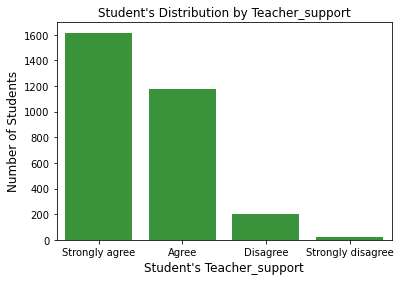

In [318]:
univariate_plot('Teacher_support', sort=True);

### Observation 7b: 
> - The transformed **Teacher_support** variable into categorical variable gave similar observation as does the various form of Teacher_support variables investigated above. Most students agreed that the teachers support them in every way possible to achieve their academic goals. The order follows:
> - **Teacher_support = Strongly Agree > Agree > Disagree > Strongly disagree**.

> - For subsequent analysis, this transformed Teacher_support variable will be used instead of the various form specifying the kind of teachers support given to the students, unless specified otherwise. 

> - Therefore to answer the question, Teacher support is an important variable in the PISA assessment given according to the student's survey.

### Research Question 8: Is class management essential to students according to the assessment taken?

Strongly agree       1826
Agree                 980
Disagree              151
Strongly disagree      31
Name: Class_management_teacher_starts_on_time, dtype: int64
Strongly agree       1627
Agree                1173
Disagree              153
Strongly disagree      33
Name: Class_management_teacher_keep_class_orderly, dtype: int64


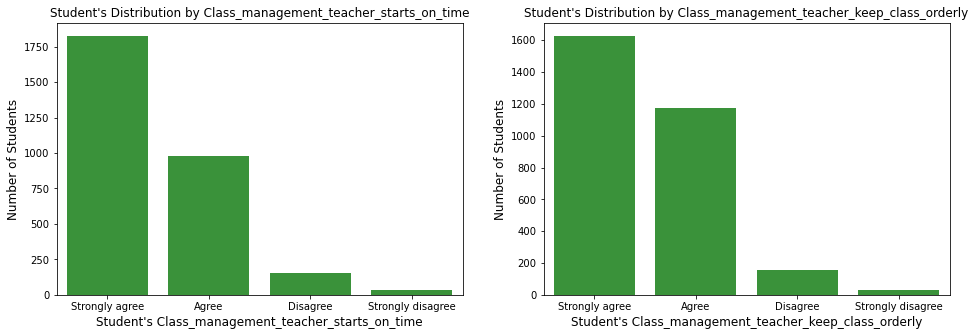

In [319]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
univariate_plot('Class_management_teacher_starts_on_time', sort=True);

plt.subplot(1,2,2)
univariate_plot('Class_management_teacher_keep_class_orderly', sort=True);

### Observation 8: 
> - The **Class management** variable in the assessment was investigated. Most of the students strongly agreed that one of the ways the teacher manages the classroom is to start teaching on time. Also, they strongly agreed that the teacher manages the classroom well by keeping the class orderly.

### Research Question 9:  How many students showed interest in mathematics literacy?

Agree                1484
Strongly agree       1060
Disagree              328
Strongly disagree      79
Name: Math_interest, dtype: int64


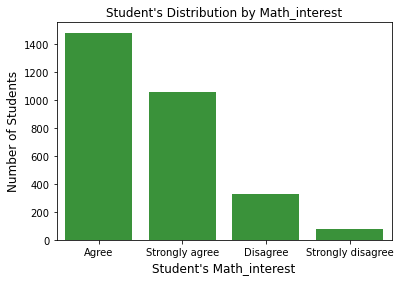

In [320]:
univariate_plot('Math_interest', sort=True);

### Observation 9: 
> - The variable **Math_interest** was investigated. It is believed that most students tend to show less interest in mathematics due to the enormous calculations and skills involved. Therefore, any student with positive attitude/interest towards Mathematics, studies the subject because he/she likes or has pleasure in it.
> - Interestingly, the analysis showed that most students that partook in the assessment showed strong interest for mathematics literacy.

### Research Question 10:  In the assessment taken, what is the attitude of student towards school in terms of preparing them for life?

Disagree             1235
Strongly disagree     664
Agree                 578
Strongly agree        489
Name: School_does_little_to_prepare_me_for_life, dtype: int64


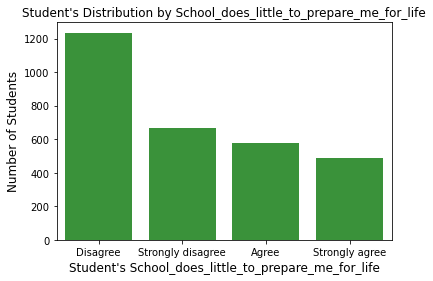

In [321]:
univariate_plot('School_does_little_to_prepare_me_for_life', sort=True);

### Observation 10: 
> - Schools focus on academic knowledge and teach students to memorize information, which gives them extremely low chances to learn critical life skills. Schools focus on preparing students for universities, but not for jobs and real life. It doesn't teach them how to manage money, how to negotiate and how to communicate.
> - According to a survey by the Association of American Colleges and Universities published in 2015, only 55 percent of high school students feel prepared to enter the real world.
> - Although schools do expose students to valuable skills such as perseverance, responsibility, and social skills, they do not account for the skills used in day-to-day life. It is fair to say that students who have just graduated from high school have no set of skills. They do not know how to live in the real world. So the variable "School_does_little_to_prepare_me_for_life" variable was explored.
> - Contrarily to these reports reported in the literature, the analysis depicts that most students disgree with the fact that school does little to prepare them for life. Most of the students are of the opinion that school plays a major role in preparing them for life.

### Research Question 11: Do students who partook in the assessment likely to give up easily?

In [322]:
# Calculate the perseverance_counts and sum just to have clarity.
persev_counts = df_pisa_clean['Perseverance_Give_up_easily'].value_counts()
persev_order = df_pisa_clean['Perseverance_Give_up_easily'].value_counts().index

# Returns the sum of all not-null values in `Perseverance_Give_up_easily` column
persev_sum = df_pisa_clean['Perseverance_Give_up_easily'].value_counts().sum()

Not at all like me    1108
Not much like me       707
Somewhat like me       399
Mostly like me         369
Very much like me      335
Name: Perseverance_Give_up_easily, dtype: int64


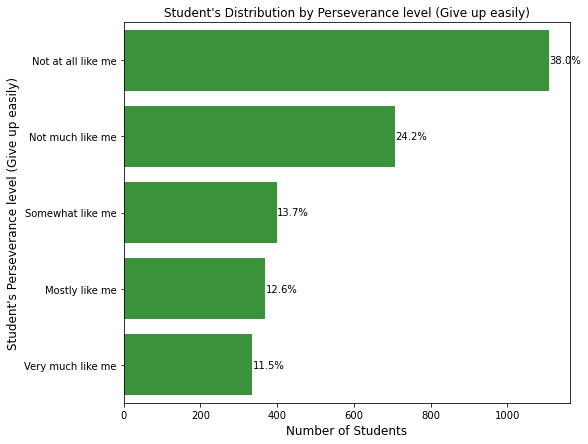

In [323]:
print(df_pisa_clean.Perseverance_Give_up_easily.value_counts())

plt.figure(figsize=(8,7))
sb.countplot(data=df_pisa_clean, y='Perseverance_Give_up_easily', color=base_color, order=persev_order);
plt.xlabel("Number of Students", fontsize =12)
plt.ylabel("Student's Perseverance level (Give up easily)", fontsize =12)
plt.title("Student's Distribution by Perseverance level (Give up easily)", fontsize =12)

# Logic to print the proportion text on the bars
for i in range (persev_counts.shape[0]):
    # Remember, persev_counts contains the frequency of unique values in the `Perseverance_Give_up_easily` column in decreasing order.
    count = persev_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/persev_sum)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

### Observation 11: 
> - In the Perseverance_Give_up_easily variable investigated in the PISA dataset, the statistics and the visualization illustrate that most students are certain to persevere; as they don't give up easily in the course of their academic pursuit.
> - The order of the trend of students that give up easily follows:  **Not at all like me > Not much like me > Somewhat like me > Mostly like me > Very much like me**.
> - This analysis implies that most students who partook in the assessment are determined to solve problems or challenges that spring forth in the course of their academic pursuit than those that are likely to give up easily.

### Research Question 12:  What is the highest educational level of parent of the students who partook in the survey?

In [324]:
parent_edu_counts = df_pisa_clean['Highest_educational_level_parents'].value_counts()
parent_edu_order = df_pisa_clean['Highest_educational_level_parents'].value_counts().index

# Returns the sum of all not-null values in `Highest_educational_level_parents` column
parent_edu_sum = df_pisa_clean['Highest_educational_level_parents'].value_counts().sum()

ISCED 3A, 4    2141
ISCED 5A, 6    1392
ISCED 2         780
None            368
ISCED 5B        341
ISCED 3B, C     152
ISCED 1          51
Name: Highest_educational_level_parents, dtype: int64


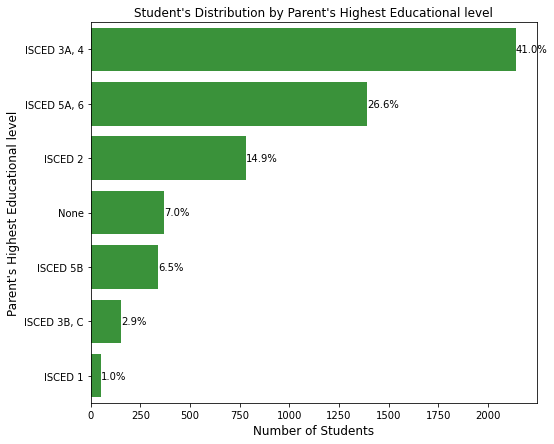

In [325]:
print(df_pisa.Highest_educational_level_parents.value_counts())
plt.figure(figsize=(8,7))
parent_edu_order = df_pisa_clean['Highest_educational_level_parents'].value_counts().index
sb.countplot(data=df_pisa_clean, y='Highest_educational_level_parents', color=base_color, order=parent_edu_order);
plt.xlabel("Number of Students", fontsize =12)
plt.ylabel("Parent's Highest Educational level", fontsize =12)
plt.title("Student's Distribution by Parent's Highest Educational level", fontsize =12)


# Logic to print the proportion text on the bars
for i in range (parent_edu_counts.shape[0]):
    # Remember, parent_edu_counts contains the frequency of unique values in the `Highest_educational_level_parents` column in decreasing order.
    count = parent_edu_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/parent_edu_sum)
    # Print the string value on the bar. 
    plt.text(count+1, i, pct_string, va='center')

### Comment 7: 
**International Standard Classification of Education(ISCED)**: is the reference international classification for organising education programmes and related qualifications by levels and fields.

- **ISCED 1** - PRIMARY EDUCATION OR FIRST STAGE OF BASIC EDUCATION
- **ISCED 2** - LOWER SECONDARY EDUCATION OR SECOND STAGE OF BASIC EDUCATION
- **ISCED 3** - (UPPER) SECONDARY EDUCATION
> - ISCED 3A: Programmes designed to provide direct access to ISCED 5A;
> - ISCED 3B: Programmes designed to provide direct access to ISCED 5B; ISCED 3C: Programmes not designed to lead to ISCED 5A or 5B.
- **ISCED 4** - POST-SECONDARY NON TERTIARY EDUCATION
- **ISCED 5** - FIRST STAGE OF TERTIARY EDUCATION (NOT LEADING DIRECTLY TO AN ADVANCED RESEARCH QUALIFICATION)
> - ISCED 5A: Programmes that are largely theoretically based and are intended to provide sufficient qualifications for gaining entry into advanced research programmes and professions with high skills requirements.
> - ISCED 5B: Programmes that are practically oriented/ occupationally specific and are mainly designed for participants to acquire the practical skills and know-how needed for employment in a particular occupation or trade or class of occupations or trades, the successful completion of which usually provides the participants with a labour-market relevant qualification
- **ISCED 6** - SECOND STAGE OF TERTIARY EDUCATION (LEADING TO AN ADVANCED RESEARCH QUALIFICATION)

  >  **To understand more about the ISCED, click [here](https://ec.europa.eu/eurostat/documents/1978984/6037342/ISCED-EN.pdf)**

### Observation 12:
> - In the survey analyzed statistically and visually, the highest educational level of parent variable investigated in the PISA dataset showed the parents of most students who partook in the survey have the highest educational level of ISCED 4. 
> One would have presumed that the students whose parent's level of education is ISCED 6 will pertake in the survey more than students whose parents have lower qualification than ISCED 6. This presumption is wrong as proven in the statistics and plot above. The trend of parent's highest educational level of students who partook in the survey follow the order: **ISCED 3A, 4  > ISCED 5A,6  >  ISCED 2  >  ISCED 5B  >  ISCED 3B,C  >  ISCED 1 respectively** 

### Action 5: 
**Secondly, let us look at visualization of individual numerical/quantitative variables**

### Research Question 13:  What age of student partook in the PISA assessment the most?

#### Comment 8: 
Since the **Age** and **Grade** appear discrete, we can use the barplot kind of plot to understand the trend in the Age of the students 

15    3428
16    1805
Name: Age, dtype: int64


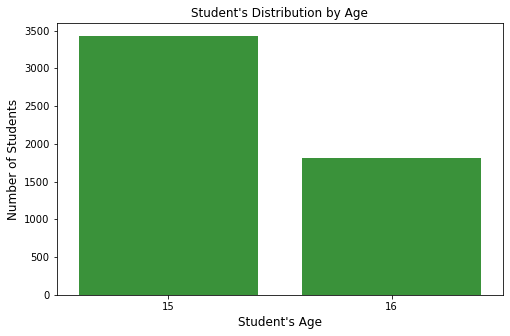

In [326]:
plt.figure(figsize=[8,5])
univariate_plot('Age', sort=True);

### Observation 13: 
> - The age of the most students that partook in the survey is 15years old.

### Research Question 14:  Are students below or above the modal grade of their country?

 0.0    3191
-1.0    1803
-2.0     119
 1.0     105
-3.0      12
 2.0       2
Name: Grade, dtype: int64


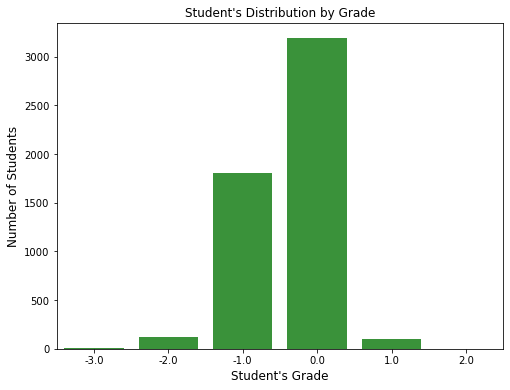

In [327]:
plt.figure(figsize=[8,6])
univariate_plot('Grade');

### Comment 9: 

**The relative grade index indicates whether students are at the modal grade in a country (value of 0), or whether they are below or above the modal grade level (+ x grades, -x grades)**. Find out more about the modal grade in a country **[here](https://books.google.com.ng/books?id=Yw9GAgAAQBAJ&pg=PA261&lpg=PA261&dq=Grade+compared+to+modal+grade+in+country&source=bl&ots=p1qgcM6iNJ&sig=ACfU3U2wEWEaWfFrDf-DDCib6YMPTVDlyw&hl=en&sa=X&ved=2ahUKEwifh6Tinb35AhVGVfEDHRs-AcwQ6AF6BAgYEAM#v=onepage&q=Grade%20compared%20to%20modal%20grade%20in%20country&f=false)** 

### Observation 14: 
> - Grade is the variable analyzed in the PISA dataset. The Grade analyzed is compared to modal grade in country.  
> - This analysis implies that more students are just at the modal grade in their country than those students that were below or above the modal grade. 

In [328]:
# Create a loop for other numeric variables.
def univariate_num(var):
    print(df_pisa_clean[var].describe()); 
    plt.figure(figsize=[15,7])
           
# HISTOGRAM ON LEFT: full data without scaling    
    plt.subplot(1, 2, 1)
    plt.hist(data= df_pisa_clean, x= var, color = 'green');
    plt.xlabel(var, fontsize = 12)
    plt.ylabel('Number of Students',fontsize = 12)
    plt.title(f"Student's Distribution by {var}")
        
# HISTOGRAM ON LEFT: full data with scaling
    plt.subplot(1, 2, 2)
    plt.hist(data= df_pisa_clean, x= var, color = 'blue', bins=bins);
    plt.xlabel(var, fontsize = 12)
    plt.ylabel('Number of Students',fontsize = 12)
    plt.title(f"Student's Distribution by {var}")    

### Research Question 15:  Describe the mathematical literacy ability of the students?

count    5232.000000
mean      399.899489
std        88.897515
min       101.347560
25%       343.499770
50%       399.719590
75%       456.543080
max       688.666440
Name: Average_math_literacy, dtype: float64


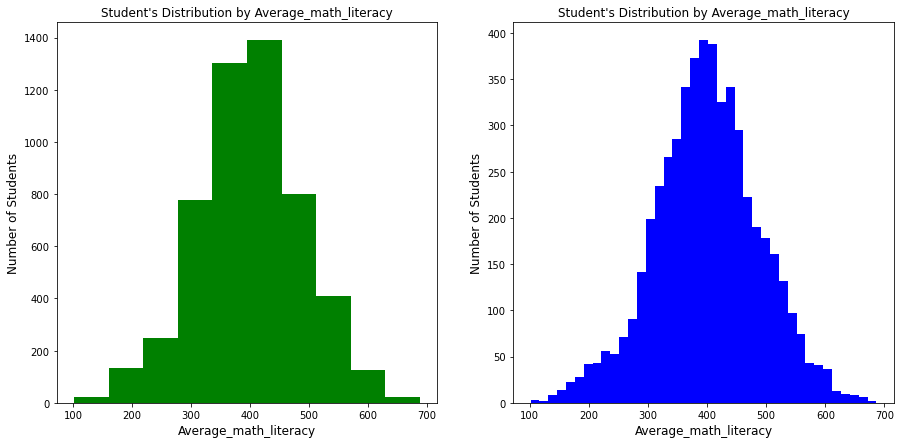

In [329]:
bins = np.arange(df_pisa_clean['Average_math_literacy'].min(), df_pisa_clean['Average_math_literacy'].max()+10, 15)
univariate_num('Average_math_literacy')

### Observation 15: 
> The engineered variable Average_math_literacy is the variable analyzed here. In the left plot, the data on the histogram is without scaling. A bimodal distribution is observed (with two peaks or humps) and the direct adjacency of the bars emphasizes  that the data takes on a continuous range of values. After scaling, the resulting histogram on the right showed that the data is normally distributed although with the bimodal peaks still evident. Both peaks are between 390 and 420. Also, the minimum mathematics literacy score is around 100 and the maximum score is about 690. 

### Research Question 16: Describe the reading literacy ability of the students?

count    5232.000000
mean      401.605365
std       106.738703
min        23.722020
25%       337.277465
50%       408.211890
75%       474.934920
max       743.001640
Name: Average_reading_literacy, dtype: float64


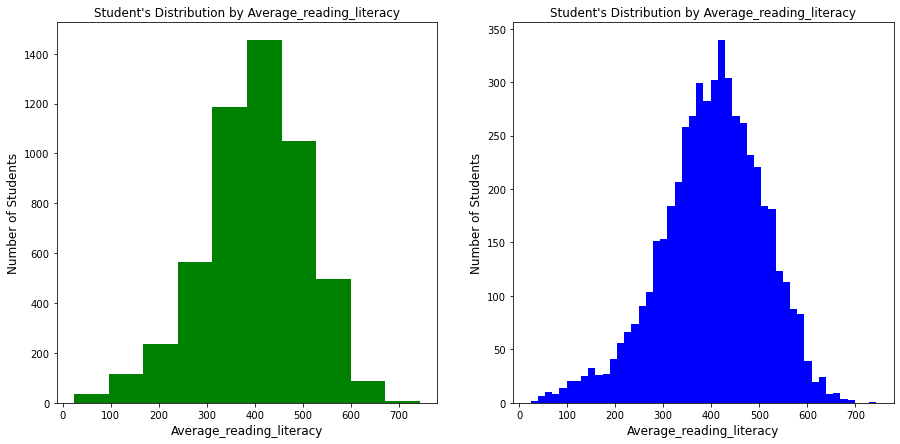

In [330]:
bins = np.arange(df_pisa_clean['Average_reading_literacy'].min(), df_pisa_clean['Average_reading_literacy'].max()+10, 15);
univariate_num('Average_reading_literacy');

### Observation 16: 
> The engineered variable Average_reading_literacy is the variable analyzed here. In the left plot, the data on the histogram is without scaling. A single modal distribution is observed (as against what was operational for the average_math_literacy). After scaling, the resulting histogram on the right showed that the data is normally distributed with a distinct modal peak between 430-440. Also, the minimum reading literacy score is around 20 and the maximum score is about 700. The bin after 700 may be regarded as an outlier.

### Research Question 17:  Describe the scientific literacy ability of the students?

count    5232.000000
mean      405.439042
std        93.609631
min        89.276400
25%       349.254020
50%       408.327110
75%       466.001505
max       716.840720
Name: Average_science_literacy, dtype: float64


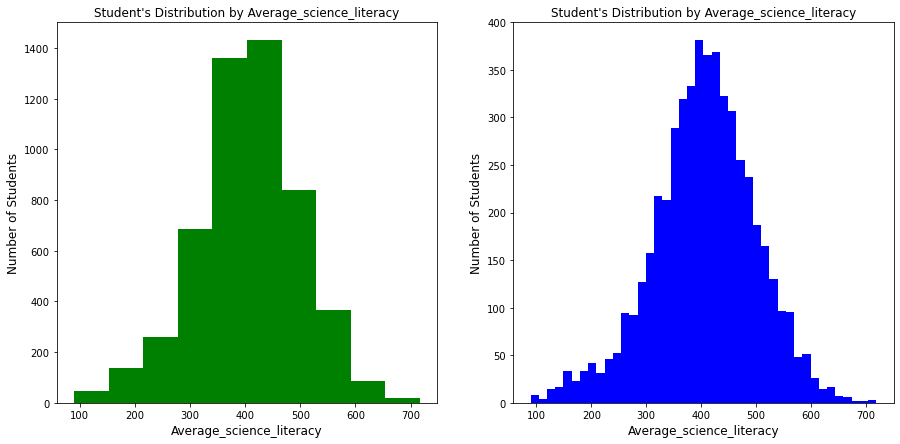

In [331]:
bins = np.arange(df_pisa_clean['Average_science_literacy'].min(), df_pisa_clean['Average_science_literacy'].max()+10, 15)
univariate_num('Average_science_literacy')

### Observation 17: 
> The engineered variable Average_science_literacy is the variable analyzed here. The left plot which is the histogram without scaling resembles that of the average_math literacy. A bimodal distribution is observed. After scaling, the resulting histogram on the right showed that the data is normally distributed with a distinct modal peak between 370-400. The minimum science literacy score is around 90 and the maximum score is about 715.

### Research Question 18:  Give a brief description of the Academic performance of students?

count    5232.000000
mean      402.314632
std        92.082094
min        88.394973
25%       347.176710
50%       405.035353
75%       463.037698
max       706.173240
Name: Academic_performance, dtype: float64


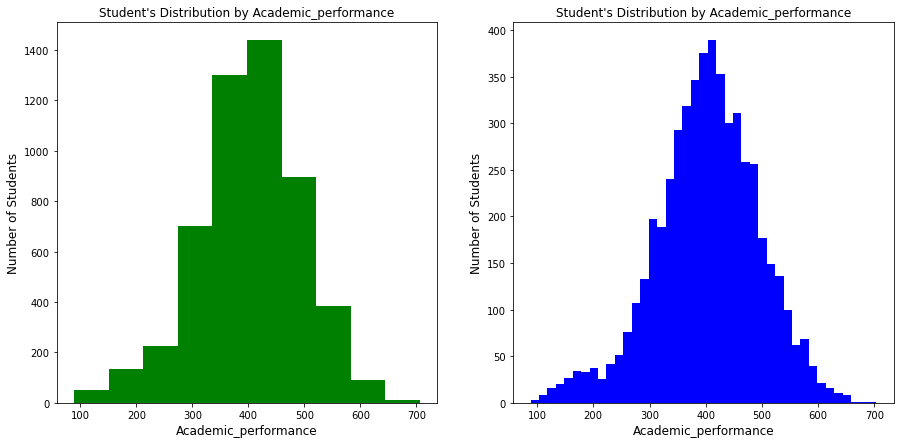

In [332]:
bins = np.arange(df_pisa_clean['Academic_performance'].min(), df_pisa_clean['Academic_performance'].max()+10, 15)
univariate_num('Academic_performance')

### Observation 18: 
> - Academic performance is the measurement of student achievement across various academic subjects.

> - The engineered variable Academic performance is the variable analyzed here. In the left plot, the data on the histogram is without scaling. A bimodal distribution is observed (with two peaks or humps) and the direct adjacency of the bars emphasizes  that the data takes on a continuous range of values. After scaling, the resulting histogram on the right showed that the data is normally distributed although with stepwise modal peaks. The highest peak is between 420 and 440. In the subsequent bivariate exploration, the Academic performance will serve as the dependent variable employed for further analysis.

### Research Question 19:  What is the average learning time for most students who took the PISA assessment?

In [333]:
df_pisa_clean['Average_learning_time'].describe().reset_index()

,index,Average_learning_time
0,count,2937.000000
1,mean,176.640393
2,std,66.493597
3,min,0.000000
4,25%,135.000000
5,50%,165.000000
6,75%,210.000000
7,max,980.000000


count    2937.000000
mean      176.640393
std        66.493597
min         0.000000
25%       135.000000
50%       165.000000
75%       210.000000
max       980.000000
Name: Average_learning_time, dtype: float64


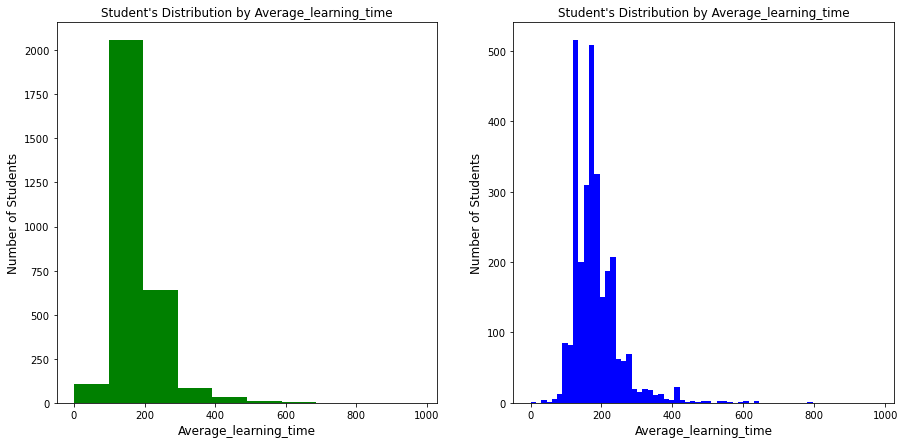

In [334]:
bins = np.arange(df_pisa_clean['Average_learning_time'].min(), df_pisa_clean['Average_learning_time'].max()+10, 15)
univariate_num('Average_learning_time')

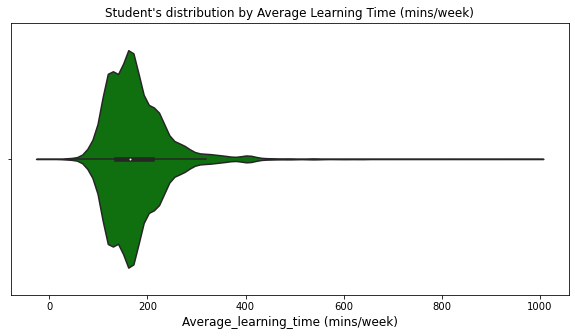

In [335]:
plt.figure(figsize=[10,5])
sb.violinplot(x=df_pisa_clean['Average_learning_time'], color='green');
plt.xlabel('Average_learning_time (mins/week)', fontsize = 12)
plt.title("Student's distribution by Average Learning Time (mins/week)");

### Comment 11:  
In the two histogram plots of average learning time above, it can be observed that the plots seem skewed to the right, suggesting that there might be outliers. So, violinplot was employed to validate the presence of the outliers. As predicted, the violinplot proved the presence of the outside points by the right called outliers. The outliers are the long green line by the right, outside the upper adjacent values (black lines stretched from the bar), at about 320mins/week and above. Therefore, steps are needed to be taken to clean up the outliers. To this effect, the code below was used.

In [246]:
cols = ['Average_learning_time'] # The column(s) you want to search for outliers in

# Calculate quantiles and IQR
Q1 = df_pisa_clean[cols].quantile(0.25) # Same as np.percentile but maps (0,1) and not (0,100)
Q3 = df_pisa_clean[cols].quantile(0.75)
IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df_pisa_clean[cols] < (Q1 - 1.5 * IQR)) | (df_pisa_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition
df_pisa_clean = df_pisa_clean[condition]

**The source of the code used above for the ouliers can be gotten from [here](https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c) and [here](https://www.quora.com/How-can-I-remove-outliers-in-a-large-dataset-with-pandas)**

### After removing the outliers

In [88]:
df_pisa_clean['Average_learning_time'].describe().reset_index()

,index,Average_learning_time
0,count,2838.000000
1,mean,168.552972
2,std,47.190009
3,min,40.000000
4,25%,135.000000
5,50%,165.000000
6,75%,195.000000
7,max,320.000000


(38.0, 330.0)

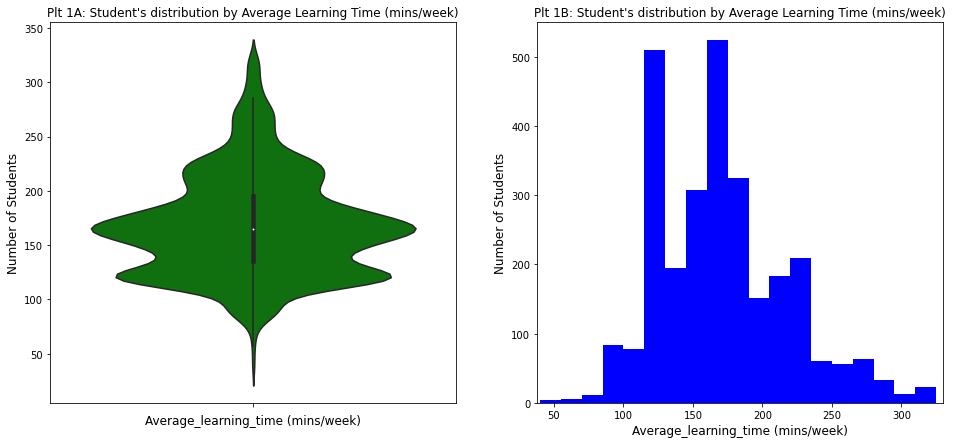

In [247]:
plt.figure(figsize=[16,7])

# Boxplot ON LEFT   
plt.subplot(1, 2, 1)
sb.violinplot(y=df_pisa_clean['Average_learning_time'], color='green');
plt.xlabel('Average_learning_time (mins/week)', fontsize = 12)
plt.ylabel('Number of Students',fontsize = 12)
plt.title("Plt 1A: Student's distribution by Average Learning Time (mins/week)");    
        
# HISTOGRAM ON RIGHT: full data with scaling
plt.subplot(1, 2, 2)
bins = np.arange(df_pisa_clean['Average_learning_time'].min(), df_pisa_clean['Average_learning_time'].max()+10, 15)
plt.hist(data= df_pisa_clean, x= 'Average_learning_time', color = 'blue', bins=bins);
plt.xlabel('Average_learning_time (mins/week)', fontsize = 12)
plt.ylabel('Number of Students',fontsize = 12)
plt.title("Plt 1B: Student's distribution by Average Learning Time (mins/week)")
plt.xlim(38,330)

### Observation 19: 
> - Another engineered variable, Average learning time, is the variable analyzed here. From the statistical analysis done above, it can be seen that the outliers have been removed. This is evident in the decrease in the number of counts before and after cleaning; **2937 _vs_ 2838** respectively. 
> - As seen in plot on the left (plot 1A), the violinplot showed that outliers have been take care of as against what was shown before cleaning. It can also be observed that there exist two modal classes in the plot. To obtain more information on the variable analyzed, histogram plot was employed. After scaling, the visualization of Plot 1B further validates what was observed in the violinplot. The scaled histogram showed that there are two peaks in the plot. The first is between **120-130mins** and the second is between **170-180mins**.

### Research Question 20:  Highlight the distribution of the highest parental education in years in the assessment? 

count    5134.000000
mean       12.273861
std         3.459739
min         3.000000
25%        12.000000
50%        12.000000
75%        16.000000
max        16.000000
Name: Highest_parental_education_years, dtype: float64


12    2271
16    1635
10     752
3      375
6       42
15      33
9       20
5        6
Name: Highest_parental_education_years, dtype: int64


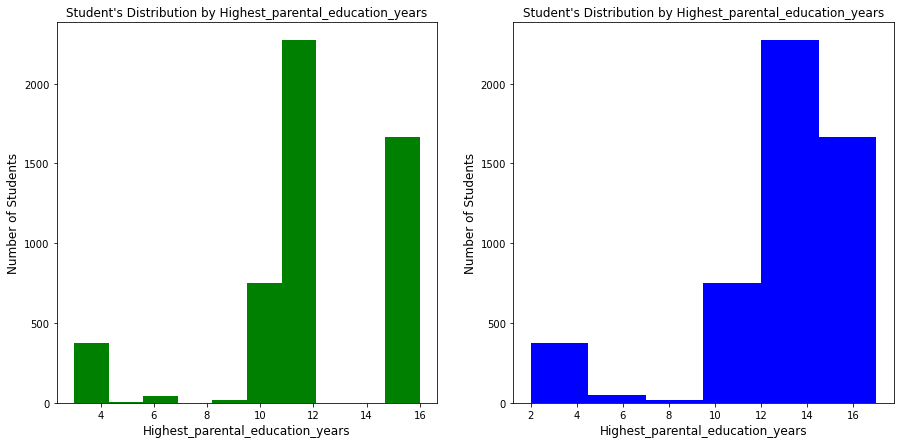

In [90]:
bins = np.arange(2,df_pisa_clean['Highest_parental_education_years'].max()+2, 2.5);
univariate_num('Highest_parental_education_years');
print('\n')
print(df_pisa_clean.Highest_parental_education_years.value_counts())

### Observation 20: 
> - The variable analyzed here is the highest parental education in years. In the dual plot above, the unscaled plot on the left did not represent the variable properly so I set the bin size to show the plot on the right. The plot seems skewed more to the left, implying that most parents tend to have spent reasonable education years during their educational period. 
> - The student's distribution by the highest parental education showed that most parents of the students who took the assessment spent about 12 years and above in their education. 
> - This analysis depicts that most parents of the students that took the survey had finished their secondary school education. This is in consonant with the findings observed for the highest education level of parents variable suggesting that the students of parents who have finished their POST-SECONDARY NON TERTIARY EDUCATION tend to partake more in the PISA assessment than the others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable(s) of interest are Academic performance and Average learning time. The full data of these two variables were individually plotted on histogram  without scaling. The plot for the academic performance variable showed that the histogram seems skewed to the left while that of the average learning time variable seems skewed to the right. So I employed the **axis limit transformation** and the **setting of bin edges** for better plots. Meanwhile, when I employed the log transformation for the academic performance variable, the plot obtained was not as distributed as that of the axis limit transformation. Employing the axis limit transformation and setting the bins for the academic variable, a stepwise modal distribution was obtained. The highest peak is between 420 and 440. However, when similar bin edges was set for the average learning time data, the plot wasn't still properly distributed as there were outliers observed in the histogram plot. Therefore, steps were taken to clean up the outliers.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Of the features investigated, yes, there were unusual distribution. In the average learning time variable, outliers were identified when the histogram and violinplots were plotted on the variable data. The violinplot showed the presence of several inconsistent data points of the average learning time variable at about 320mins/week and above, outside the upper adjacent values that stretches to the right (OUTLIERS). Therefore, necessary steps were taken to remove the outliers before plots were made. A code that can be find [here](https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c) and [here](https://www.quora.com/How-can-I-remove-outliers-in-a-large-dataset-with-pandas) was employed to remove the outliers. After cleaning and setting axis limit transformation, the violinplot and the histogram plot were repeated to verified if the outliers were removed. The result gave a clean bimodally distributed violinplot and histogram plot respectively. 

## Bivariate Exploration

> **In this section, investigation of the relationships between pairs of variables in the df_pisa_clean dataset will be made**. It should be noted that the dependent variable will be the **Academic_performance**. 

### Action: 6
> Herein, I want to look at the relationship between numeric variables to inspect how they correlate with one another.
> To achieve this, I will employ the heatmap to examine the degree of correlation among the numeric variables investigated in this dataset.

In [91]:
numeric_variables = ['Average_math_literacy','Average_reading_literacy','Average_science_literacy','Academic_performance',
                     'Average_learning_time','Age', 'Highest_parental_education_years', 'Grade']

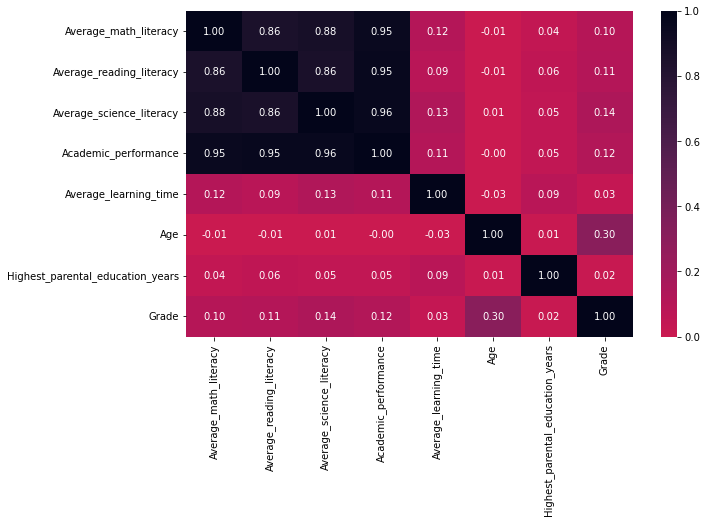

In [92]:
plt.figure(figsize=(10,6))
sb.heatmap(df_pisa_clean[numeric_variables].corr(), cmap='rocket_r', annot=True, fmt='.2f', vmin=0, center=0);

### Research Question 21:  Do students who learned for long hours perform better than those who learned for short hours?

In [93]:
print('The correlation between Average learning time and Academic performance is', 
      df_pisa_clean['Average_learning_time'].corr(df_pisa_clean['Academic_performance']).round(2))

The correlation between Average learning time and Academic performance is 0.11


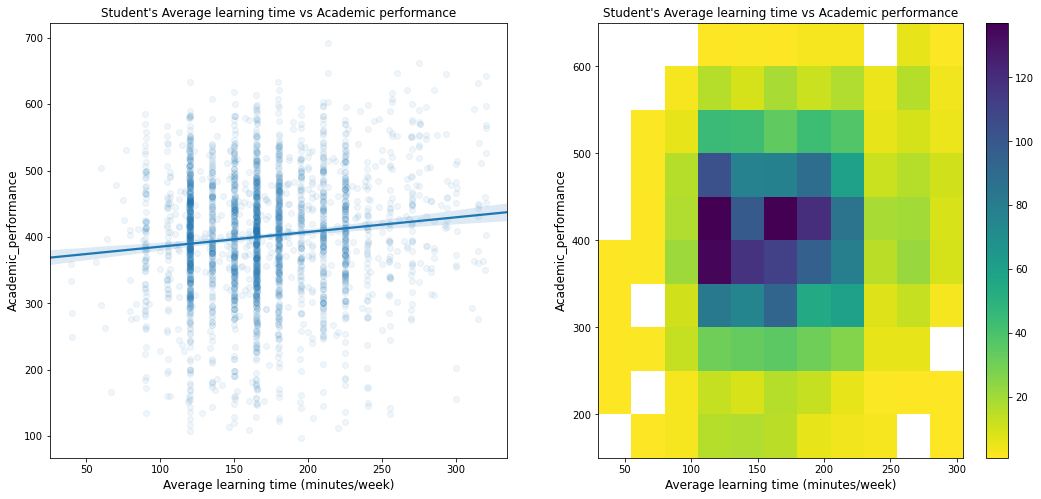

In [94]:
plt.figure(figsize = [18, 8])
plt.subplot(1, 2, 1)
sb.regplot(data = df_pisa_clean, x = 'Average_learning_time', y = 'Academic_performance', truncate=False, 
           x_jitter=0.3, scatter_kws={'alpha':1/15});
plt.xlabel('Average learning time (minutes/week)', fontsize=12);
plt.ylabel('Academic_performance', fontsize=12);
plt.title("Student's Average learning time vs Academic performance"); 


plt.subplot(1, 2, 2)
bins_x = np.arange(30, 300+25, 25)
bins_y = np.arange(150, 700, 50)
cdv = df_pisa_clean.dropna(subset=['Average_learning_time', 'Academic_performance']).reset_index()
plt.hist2d(data = cdv, x = 'Average_learning_time', y = 'Academic_performance', 
           cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Average learning time (minutes/week)', fontsize=12);
plt.ylabel('Academic_performance', fontsize=12);
plt.title("Student's Average learning time vs Academic performance"); 

### Observation 21 
> - There is a common notion that the more a student spends time in learning, the better the student's academic performance. So, let's see if this applies here. 
> - This plot seeks to analyze the relationship between Academic performance and average learning time. For this numeric variable, the scatter plot was employed. The correlation between Average learning time and Academic performance is positive (0.11), although very weak. The hist2d plot show that at 125mins/week, students tend to score a little less than 400 and at an increased learning time of 163mins/week, students tend to score above 400 in their academic performance.   
> - This implies that as students spend more time in learning there is the probability of the students performing very well in their academics.

In [95]:
# For subsequent relationship between two numeric varibales, the function in the code below will be used to avoid code repetition.

def bivar_numeric(var, num):
    print(f'The correlation between {var} and {num} is', 
      df_pisa_clean[num].corr(df_pisa_clean[var]).round(2))
    plt.figure(figsize=[10,8])
    sb.regplot(data = df_pisa_clean, x = num, y = var, truncate=False, 
           x_jitter=0.2, scatter_kws={'alpha':1/4});
    plt.xlabel(num, fontsize=12);
    plt.ylabel(var, fontsize=12);
    plt.title(f"Student's Distribution by {var} and {num}"); 

### Research Question 22:  Is there a relationship between student's academic performance and the average math literacy?

The correlation between Academic_performance and Average_math_literacy is 0.95


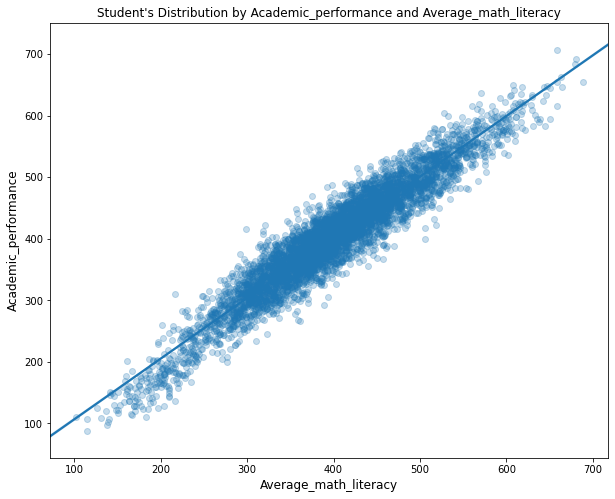

In [96]:
bivar_numeric("Academic_performance", "Average_math_literacy")

### Observation 22: 
Yes, there is a **very strong** relationship student's academic performance and the average math literacy. Analyzing the two numeric variables; Academic_performance and Average_math_literacy, the scatter plot employed showed that is a **very strong positive correlation between these two** as the correlation value is 0.95. This indicate that as a student's average_math_literacy score is increasing, the academic performance of the students is also increasing in the same manner.

### Research Question 23:  What is the influence of scientific literacy on the academic performance of students?

The correlation between Academic_performance and Average_science_literacy is 0.96


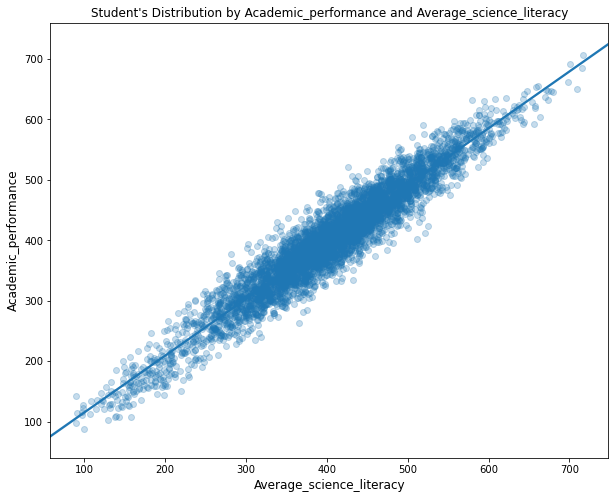

In [97]:
bivar_numeric("Academic_performance","Average_science_literacy")

### Observation 23: 
- Scientific literacy is the ability which must be owned by the students to analyze and apply the concept of science in solving daily life problem. Research has showed that STEM education is effective in improving students' learning outcomes, such as academic learning achievement, student motivation, attitude, problem-solving skills (Saraç, 2018; Yildirim, 2016). 
- Similar to the relationship between academic performance and average math literacy, there is also a **very strong positive correlation between Academic_performance and Average_science_literacy** as the correlation value is 0.96. This indicate that as a student's average_science_literacy score is increasing, it influences the academic performance of the students in a positive manner. Therefore, the influence of scientific literacy on the academic performance of students is in a progressive ratio. 

### Research Question 24: How does reading literacy affects the student's academic performance in school?

The correlation between Academic_performance and Average_reading_literacy is 0.95


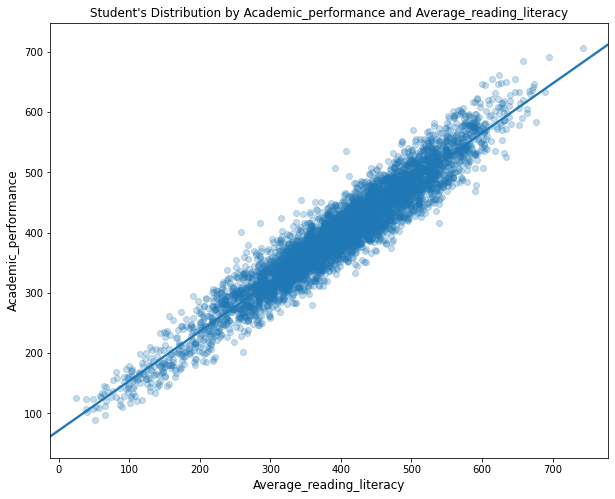

In [98]:
bivar_numeric("Academic_performance","Average_reading_literacy")

### Observation 24: 
- Reading literacy achievement is a measure of text-based reading comprehension. It was reported that students who read independently have greater reading comprehension, verbal fluency and general knowledge than those who do not. They become better readers, score higher on achievement tests in all subject areas, and have greater content knowledge than their non-reading peers. Step was therefore taken to validate this fact. 
- The analysis of the two variables Academic_performance and Average_reading_literacy showed that there exist a **very strong positive relationship between these two variables**. The correlation value as seen in the plot above is 0.95, an indication of a very strong positive relationship. 
- It can therefore be concluded that students with high score in their reading literacy will perform very well in their academic performance. Thus, reading literacy affects the student's academic performance in a positive way.

### Research Question 25:What type of relationship exist between student's achievement in mathematics literacy and science literacy?

The correlation between Average_math_literacy and Average_science_literacy is 0.88


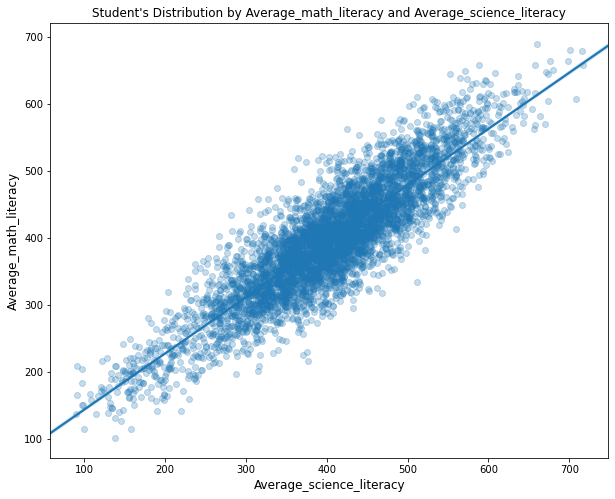

In [99]:
bivar_numeric("Average_math_literacy","Average_science_literacy")

### Observation 25:
- The type of relationship that exist between student achievement in mathematics literacy and science literacy is a positive one. This is illustrated in the scatterplot above with the correlation value of 0.88. 
- This strong positive correlation implies that as a student's score of the mathematical literacy is increasing the score of the scientific literacy is increasing as well.
- The reason for this positive relationship is not far-fetched. This is because most science topics are mathematics oriented. Therefore any student who is proficient in solving mathematical problems will be able to apply such skills in science-related topics and analyzing scientific facts.

### Research Question 26:  State the association between student's achievement in mathematics literacy and reading literacy.

The correlation between Average_math_literacy and Average_reading_literacy is 0.86


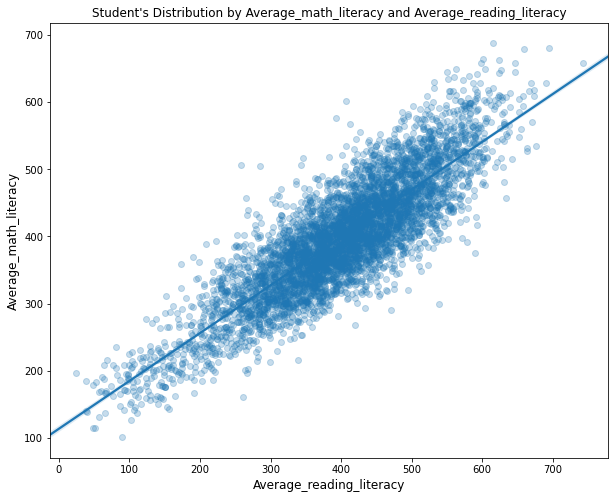

In [100]:
bivar_numeric("Average_math_literacy","Average_reading_literacy")

### Observation 26: 
- The association that exist between student's achievement in mathematics literacy and reading literacy is also a positive one as shown in the scatter plot above. The correlation value between these two variables(Average_math_literacy and Average_reading_literacy) is 0.86. 
- This strong positive correlation also suggests that as a student's score of the mathematical literacy is increasing the score of the reading literacy is increasing as well. 
- The reason for this positive relationship could be traced to the fact that students who are proficient in reading have been able to hone their comprehension skills such that when a mathematical word problem is presented, they have the total grasp of what is expected and they can solve the problem accordingly.

### Research Question 27: Examine the relationship between student's achievement in reading literacy and science literacy. State your observation.

The correlation between Average_science_literacy and Average_reading_literacy is 0.86


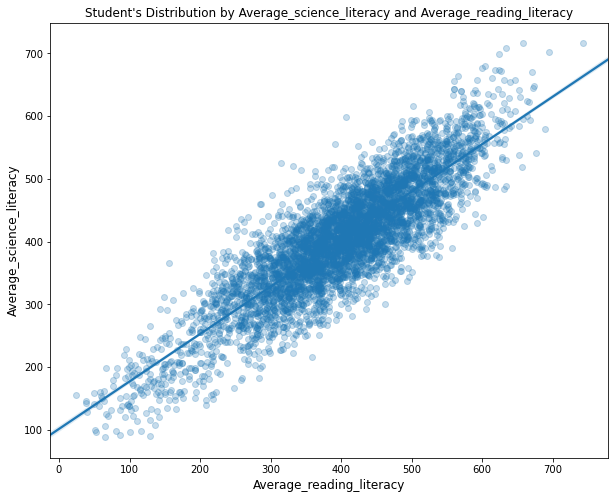

In [101]:
bivar_numeric("Average_science_literacy","Average_reading_literacy")

### Observation 27:
Examining the relationship between student's achievement in reading literacy and science literacy showed that there is a positive relationship between the two variables(Average_reading_literacy and Average_science_literacy) with a correlation value of 0.86. An increase in the student's achievement reading literacy score will also facilitate an increase in the student's science literacy score.

### Action: 7
> Also, I will like to understand the relationship between categorical variables and numeric variables. The dependent variable is the "Academic performance" and other variables will act as the independent variables. In addition, I will want to employ the box/violin plot and facetgrid simultaneously to understand the relationship between categorical variables and numeric variables in this bivariate exploration. This is because the violin/boxplot will give information about the statistics (such as the mean, median, upper/lower quartiles and the minimum/maximum values) of the variables analyzed while facetgrid will provide me with the information regarding the frequency/Number of students with respect to each category variable type.
>- Before then, I will like to sort and arrange the ordinal categorical variables into the correct order.

In [102]:
ordinal_var_dict = {'Class_repetition': ['Did not repeat a grade', 'Repeated a grade'],
                    'Immigration_status': ['Native', 'First-Generation', 'Second-Generation'],
                    'Perseverance_Give_up_easily': ['Not at all like me','Not much like me','Somewhat like me',
                                                    'Mostly like me', 'Very much like me'],
                    'Teacher_support': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Math_interest': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'School_does_little_to_prepare_me_for_life': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Class_management_teacher_keep_class_orderly': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Class_management_teacher_starts_on_time': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation_teachers_are_interested': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation_teachers_listen_to_students': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Student_teacher_relation_teachers_help_students': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Teacher_support_help_when_needed': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Teacher_support_help_learn': ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
                    'Teacher_did_not_explain_well': ['Very likely', 'Likely', 'Slightly likely', 'Not at all likely'],
                    'Teacher_did_not_get_students_interested': ['Very likely', 'Likely', 'Slightly likely', 'Not at all likely'],
                    'Highest_educational_level_parents': ['ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, 4','ISCED 5B', 
                                                          'ISCED 5A, 6']}
                    
for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        df_pisa_clean[var] = df_pisa_clean[var].astype(ordered_var)
    else: # pre-v0.21
        df_pisa_clean[var] = df_pisa_clean[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

In [103]:
def bivar_catnum(var, cat, col_wrap, height, bins=None):
          
    if bins == True:
        g = sb.FacetGrid(data = df_pisa_clean, col = cat, col_wrap=col_wrap, height=height)
        g.map(plt.hist, var, bins=bin_edges, color='purple');
        for axis in g.axes.flat:
            axis.tick_params(labelleft=True)
        plt.setp(g.axes, xlabel='Academic_performance', ylabel='Number of Students');
        g.fig.subplots_adjust(top=0.89);
        g.fig.suptitle(f"Student's Distribution by {var} and {cat}");
        
        
    else:
        g = sb.FacetGrid(data = df_pisa_clean, col = cat, col_wrap=col_wrap, height=height)
        g.map(plt.hist, var);
        for axis in g.axes.flat:
            axis.tick_params(labelleft=True);
        plt.setp(g.axes, xlabel='Academic_performance', ylabel='Number of Students');
        g.fig.subplots_adjust(top=0.89);
        g.fig.suptitle(f"Student's Distribution by {var} and {cat}");

# Source: https://stackoverflow.com/questions/36573789/python-seaborn-facetgrid-change-xlabels
# https://stackoverflow.com/questions/72196032/how-to-customize-histogram-using-seaborn-facetgrid
# https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot

In [104]:
base_color =sb.color_palette()[9]
def bivar_numcat(var1, var2, kind):
    plt.figure(figsize=[8,6])
    if kind == 'violin':
        sb.violinplot(data=df_pisa_clean, x=var1, y=var2, color=base_color, inner='quartile')
        plt.xlabel(var1, fontsize = 12)
        plt.ylabel(var2,fontsize = 12)
        plt.title(f"Student's distribution by {var1} and {var2}")
        
    elif kind=='box':
        sb.boxplot(data=df_pisa_clean, x=var1, y=var2, color=base_color)
        plt.xlabel(var1, fontsize = 12)
        plt.ylabel(var2,fontsize = 12)
        plt.title(f"Student's Distribution by {var1} and {var2}")
        
    elif kind=='bar':
        sb.barplot(data=df_pisa_clean, x=var1, y=var2, color=base_color)
        plt.xlabel(var1, fontsize = 12)
        plt.ylabel(f" Average {var2}", fontsize = 12)
        plt.title(f"Student's Distribution by {var1} and {var2}")

### Research Question 28:  Which country has students with the highest academic performance?

In [338]:
df_pisa_clean.groupby('Country')['Academic_performance'].median()

Country
Albania                 401.239893
United Arab Emirates    459.147967
Name: Academic_performance, dtype: float64

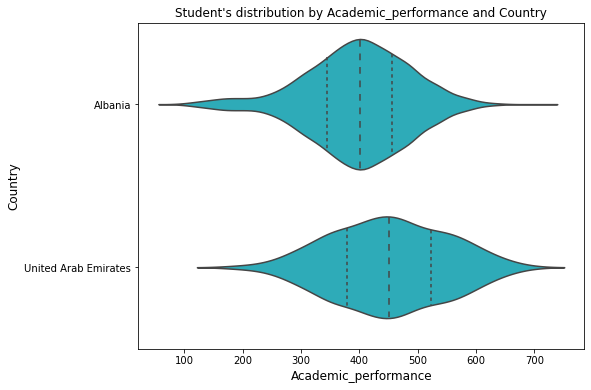

In [105]:
bivar_numcat('Academic_performance', 'Country', "violin")

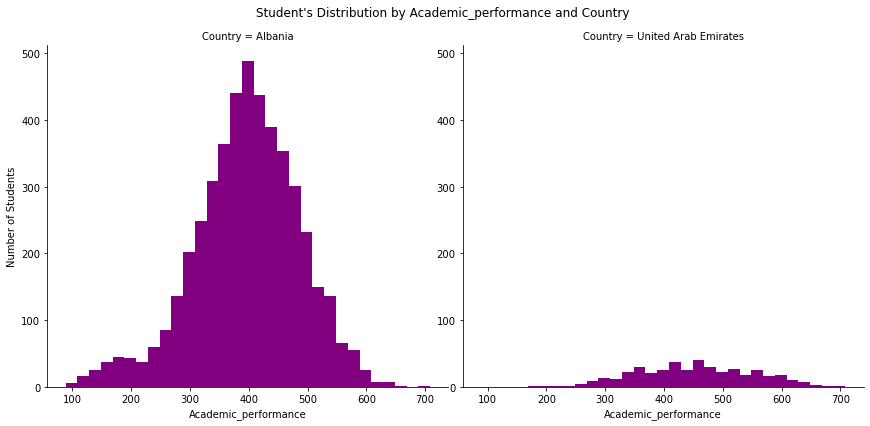

In [106]:
bin_edges = np.arange(df_pisa_clean['Academic_performance'].min(), df_pisa_clean['Academic_performance'].max()+10,20)
bivar_catnum('Academic_performance', 'Country', col_wrap=2, height=6, bins=True)

### Observation 28: 
> - These plots seek to analyze the relationship between two variables namely: Academic performance and Country. The violinplot reveal that students from United Arab Emirates performed better academically than students from Albania. This is revealed in the median value of 460 for students from United Arab Emirates and about 410 for students from Albania respectively.In support of this observation, the histogram plot show that the highest academic performance bar (mode) for students in Albania is about 410 while that for students in United Arab Emirates is between 450-470 repectively.

>- Meanwhile, the violinplot for Albania has **wider width** than the violinplot for United Arab Emirates, indicating that many students from Albania partook in the survey than the few students from United Arab Emirates. In agreement, the histogram plot also showed that **MORE than 480 students from Albania scored above 400 in their academic studies as against the few students from the United Arab Emirates scoring above 400.

### Research Question 29: How does gender affect the academic performance of students?

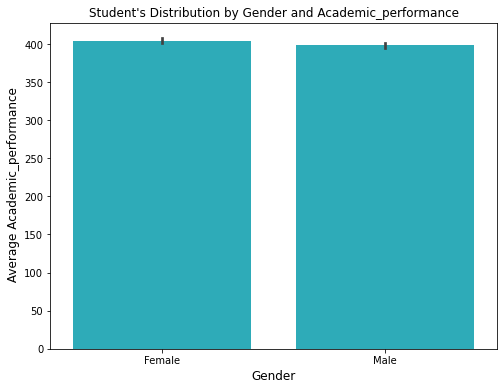

In [107]:
bivar_numcat('Gender','Academic_performance', "bar")

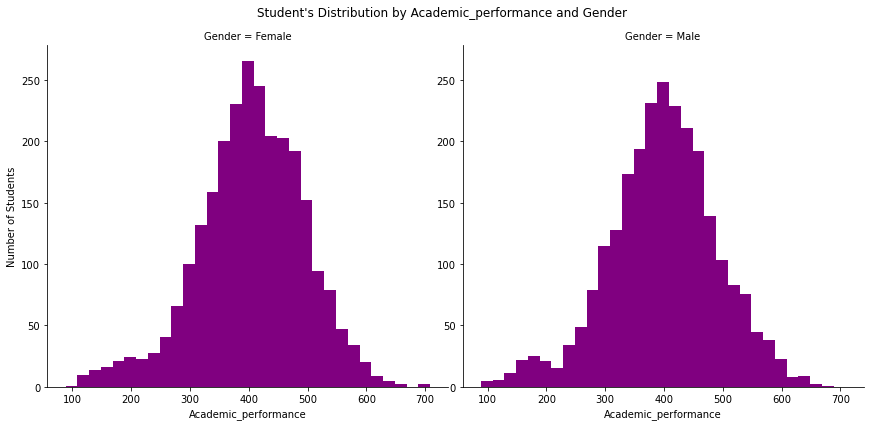

In [108]:
bivar_catnum('Academic_performance', 'Gender', col_wrap=2, height=6, bins=True)

### Observation 29: 
> -  Past research suggested that girls are in general more successful in school than boys. In view of this belief that students' gender is a factor that influence the students' academic performance, I looked into the relationship between academic performance and gender variables.
> - The violinplot showed that there is no major significant difference in the relationship between academic performance and gender i.e. both male and female students' perform in almost similar manner in their academic studies, however, the histogram plot showed that females perform slightly better than male in their academic achievement. Thus, validating the report that female students outperform their male counterparts in academic performance (Orabi, 2007; Dayioglu & Turut, 2007; Khwaileh & Zaza, 2010).

### Research Question 30:  What is the impact of grade repetition on student's academic performance?

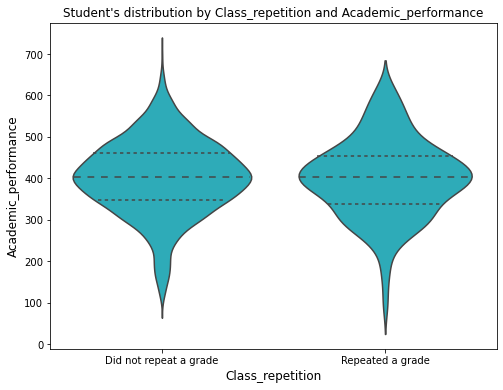

In [109]:
bivar_numcat('Class_repetition', 'Academic_performance','violin');

In [340]:
df_pisa_clean.groupby('Class_repetition')['Academic_performance'].mean()

Class_repetition
Did not repeat a grade    402.768040
Repeated a grade          399.179649
Name: Academic_performance, dtype: float64

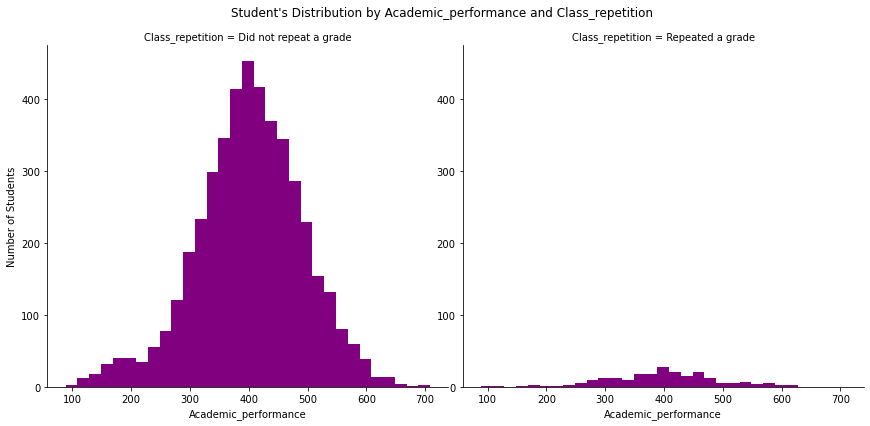

In [110]:
bivar_catnum('Academic_performance', 'Class_repetition', col_wrap=2, height=6, bins=True)

### Observation 30: 
<div style="text-align: justify">

> - It is arguable that grade repetition (Class_repetition) has negative effect on student's academic performance. While some are from the school of thought that repeating failed classes gives weak-performing students the opportunity to refresh, relearn and experience new success, resulting in the better academic performance of the students, others are of the opinion that repeating students are more likely to leave school before completing their academic studies. Therefore, I examined the relationship between the two variables **Class_repetition and academic performance** in the PISA dataset examined.
> - The violin plot reveal that there is a slight difference in the academic performance score between students that repeated a grade and those that did not repeat a grade, however students that did not repeat a grade perform slightly better than those that repeated a grade.
> - Furthermore, the histogram plot reveals that the highest academic achievement score for students that did not repeat a grade is 660 while the highest academic achievement score for students that repeated a grade is 620. The extended bins in the academic performance for students that did not repeat a grade can be termed as outliers.

> - Meanwhile, the histogram plot also validates that students who did not repeat a grade in their academic studies are MORE than students who repeated a grade.

> - Thus, grade repetition(Class_repetition) is a factor that contributes to student's academic performance when it relates to the students who took the PISA assessment. </div>

### Research Question 31:  Does the immigration status of a student affects his/her academic performance ?

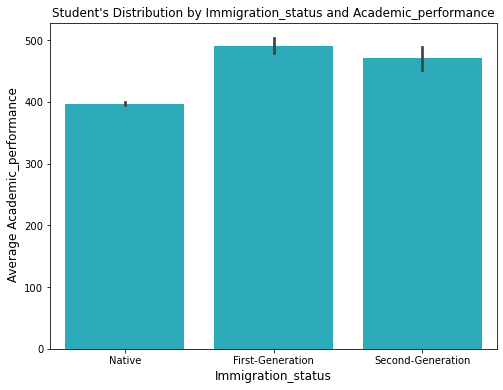

In [111]:
bivar_numcat('Immigration_status', 'Academic_performance','bar');

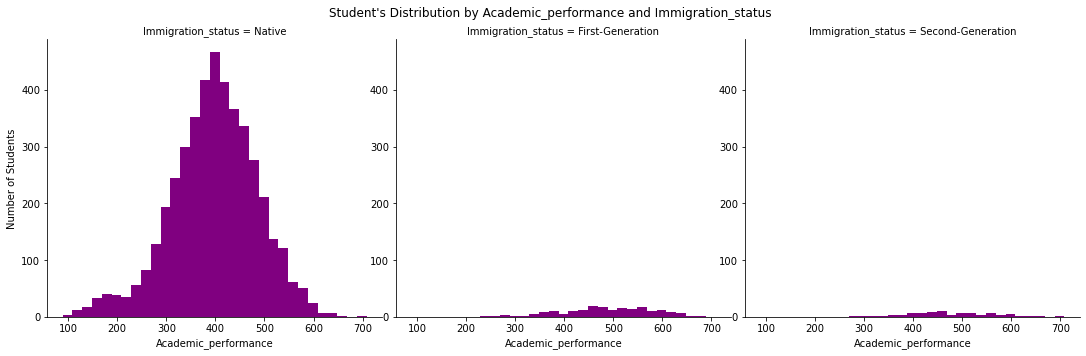

In [112]:
bivar_catnum('Academic_performance', 'Immigration_status', col_wrap=3, height=5, bins=True)

### Observation 31: 
<div style="text-align: justify">
    
> - There is this popular belief that immigrant students tend to be at a disadvantaged when it comes to attaining academic excellence. Here, I look at the effect of immigration status on the academic performance of students. 

> - From the barplot shown above, it is glaring that immigration status has an impact on the academic performance of students as first and second-generation immigrant students performed better academically than native students in the PISA dataset analyzed. The barplot also validates this as the highest average achievement score for native students is 400 while for students in the first-, and second-generation category; are about 480 and 470 respectively. The order for academic performance with respect to immigration status follows: **First-generation immigrants > Second-generation immigrants > Natives**

>- Also, the plots reveal that there is no much significant difference in the score of the students in the first-generation and the second-generation immigrants towards achieving better academic performance. 

>- It can then be supposed that the reason for the immigrant students performing better than the native students academically could be that the former turned their disadvantage into attaining academic excellence instead of wallowing in self-pity and give-up on their academic achievement. </div>

### Research Question 32:  How does parental education level affect academic achievement of students?

<Figure size 576x432 with 0 Axes>

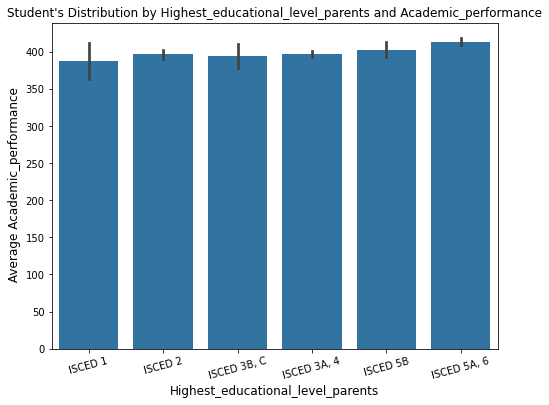

In [153]:
plt.figure(figsize=(8,6));
bivar_numcat('Highest_educational_level_parents', 'Academic_performance','bar');
plt.xticks(rotation=15);

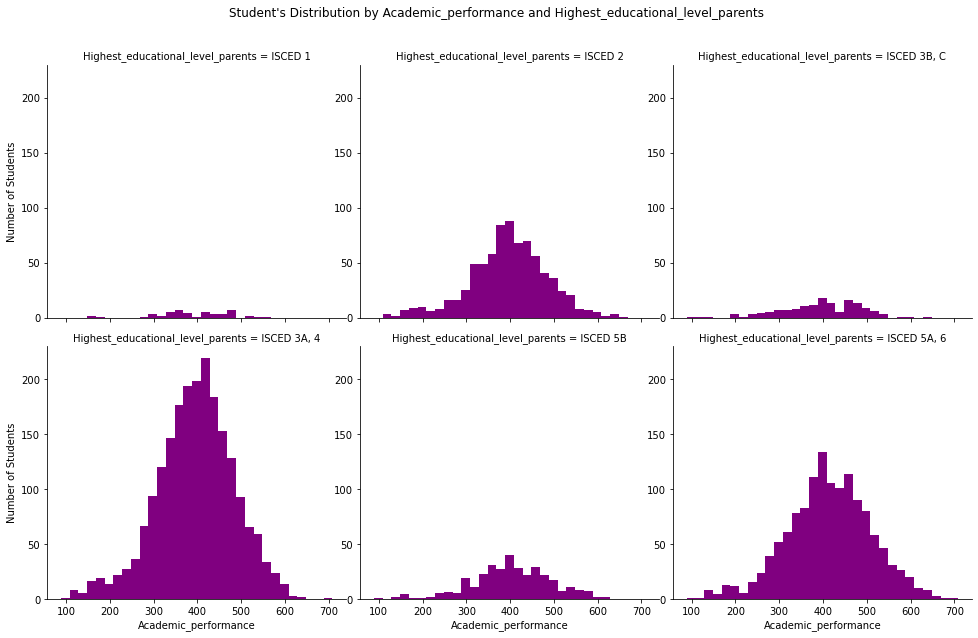

In [114]:
bivar_catnum('Academic_performance', 'Highest_educational_level_parents', col_wrap=3, height=4.5, bins=True)

### Observation 32: 
<div style="text-align: justify">
    
- Research from the National Coalition for Parent Involvement in Education shares that “no matter their income or background, students with involved parents are more likely to have higher grades and test scores, attend school regularly, have better social skills, show improved behavior and adapt well to school.” 
- To validate this statement, I examine the relationship between the highest education level of parent and academic performance variables in the PISA dataset. 
> - The barplot showed that there seems not to be much significant difference between these two variables, although students whose parents reached the **'ISCED 5A, 6'** level of educational performed the best academically and those whose parents stopped at ISCED 1 performed the least. 
>- It can then be agreed that students whose parents have higher levels of education may have an enhanced regard for learning, more positive ability beliefs, a stronger work orientation, and they may use more effective learning strategies than students of parents with lower levels of education.
> - Hence, highest educational level of parents is a factor that influences student's academic performance. </div>

### Research Question 33:  What is the relationship between students who give up easily and academic performance?

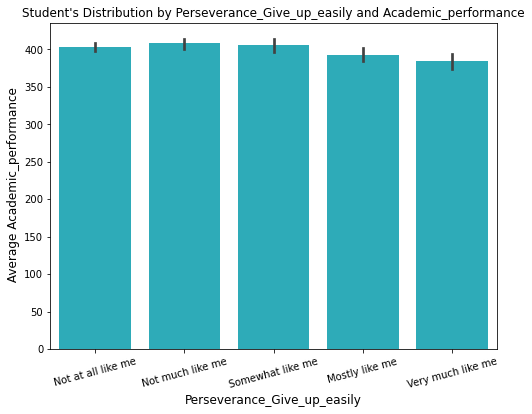

In [115]:
bivar_numcat('Perseverance_Give_up_easily', 'Academic_performance','bar'); 
plt.xticks(rotation=15);

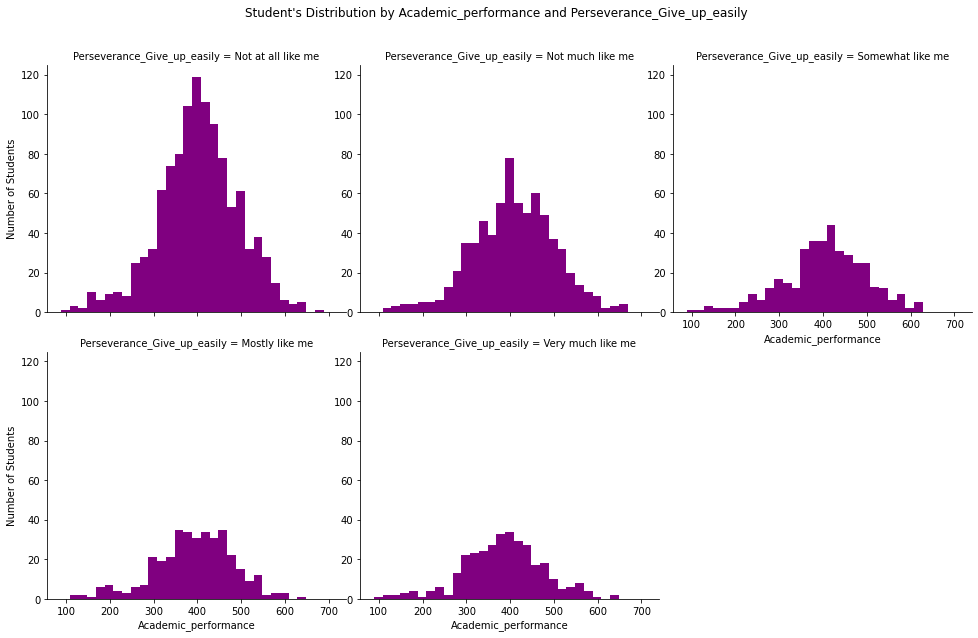

In [116]:
bivar_catnum('Academic_performance', 'Perseverance_Give_up_easily', col_wrap=3, height=4.5, bins=True)

### Observation 33: 
<div style="text-align: justify">
    
- It is said that the quality of perseverance is crucial for success in every field of life and students with high levels of perseverance and grit have the highest GPAs and best attendance, and are more likely to be accepted to the most prestigious schools. The variables analyzed here are academic performance and perseverance(give_up_easily). 
> - From the histogram plot, students who did not give up easily are MORE than those who gave up easily. Moreso, higher percentage of students with an average score of 400 and above in their academic achievement are NOT MUCH LIKELY to give up easily. This is against the lower percentage of students who had average score of 400 and above in their academic achievement and are likely to give up easily.
> - So, it is evident from the barplots that students who are not much likely to give up easily performed better academically than those that tend to give up easily. 
>- Therefore, we can conclude that the perseverance level of a student influence the student's academic performance in a positive way. </div>

### Research Question 34:  Does good academic achievement of student implies that students are prepared for life within and outside school?

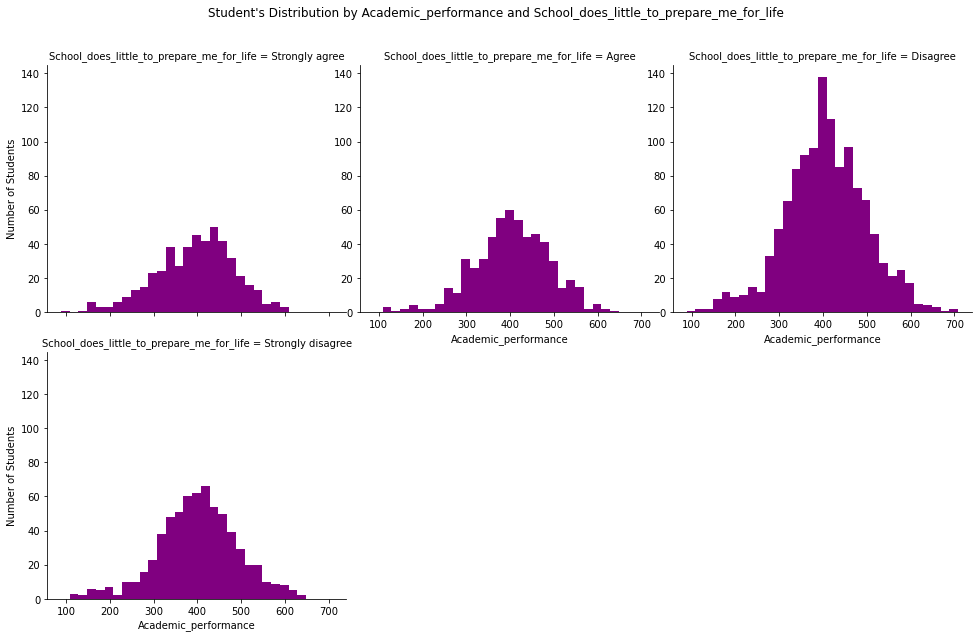

In [117]:
bivar_catnum('Academic_performance', 'School_does_little_to_prepare_me_for_life', col_wrap=3, height=4.5, bins=True)

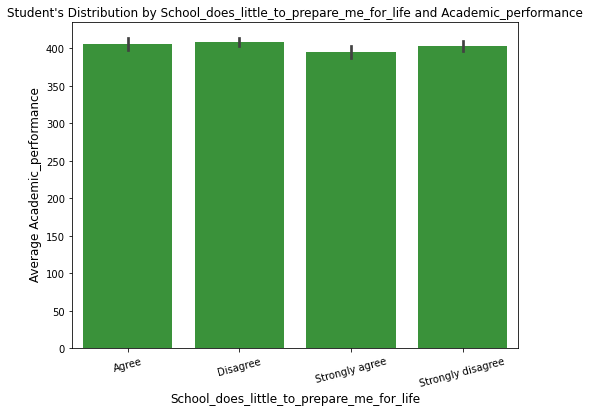

In [342]:
bivar_numcat('School_does_little_to_prepare_me_for_life', 'Academic_performance','bar'); 
plt.xticks(rotation=15);

### Observation 34: 
<div style="text-align: justify">
    
- We want to do well at school for an obvious reason: because – as we’re often told – it’s the primary route to doing well at life. Few of us are in love with the A grades themselves – we want them because we’re understandably interested in one day having a fulfilling career, a pleasant house and the respect of others. But the question is, do those fantasies become reality?
-Nowadays, people are of the opinion that school does little to prepare them for life as some people who learnt a trade (forfeited school) achieved better things than those with academic qualifications. So the question posed is does good academic achievement of student implies that students are prepared for life within and outside school? 

> - The variables analyzed here are academic performance and school_does_little_to_prepare_me_for_life. The histogram plots above depicts that most students disgree with the fact that school does little to prepare them for life. They strongly believe going to school will make them face whatever comes after school. 
> -In addition, such students that disagreed that school does little to prepare them for life performed better academically as seen in the histogram plot and bar plot of "disagree", than those who agreed that school does little to prepare them or life.
> -Therefore, we can conclude that students who performed well academically are prepared for life and better able to make the transition into life beyond school, adulthood and to achieve occupational and economic success. </div>

### Research Question 35:  Does classroom management have impact on student's academic performance?

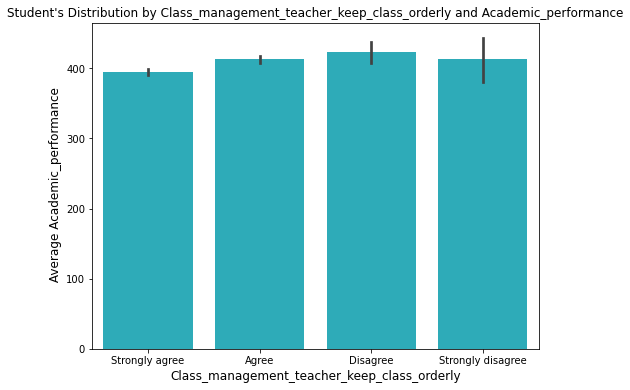

In [118]:
bivar_numcat('Class_management_teacher_keep_class_orderly', 'Academic_performance','bar'); 

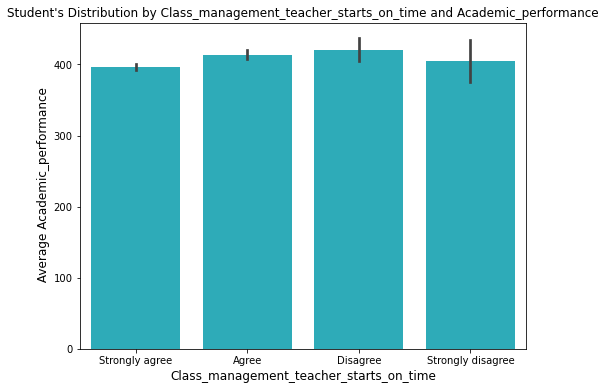

In [119]:
bivar_numcat('Class_management_teacher_starts_on_time', 'Academic_performance', 'bar'); 

### Observation 35: 
<div style="text-align: justify">
    
- Classroom management is a process, as well as a set of skills and strategies, that teachers and schools use to create and maintain appropriate behavior of students in the classroom. It was found that effective classroom management significantly increases academic achievement of students and decreases behavioral problems of the students (Korpershoek et al, 2016).
- Reports have it that Teachers' classroom management is clearly associated with students' outcomes. 
- A successful classroom management system will help prevent teacher burnout and reduce the need for yelling, scolding or other stressful discipline methods that cause friction between teacher and student. This kind of environment enhances learning, as well as social/emotional development.

> - I set to examine the relationship between the two class management practises and academic performance. Surprisingly, the analysis showed that most students disagreed that class management promotes their academic achievement in school irrespective of whether the teacher keeps the class orderly or starts on time. As seen in the plots, those who disagreed that class management(teacher keeps class orderly and teacher starts on time) promotes academic performance had the highest score in academic performance than those who agreed that class management promotes academic performance, although a slight difference.
> - Perhaps, other forms of class management need to be considered before arriving at a valid conclusion that class management indeed does not promote student's academic achievement. </div>

### Research Question 36:  What attributes can be ascribed to student's failure in their academic studies? Can you state the role of causal attribution of academic success and failure?

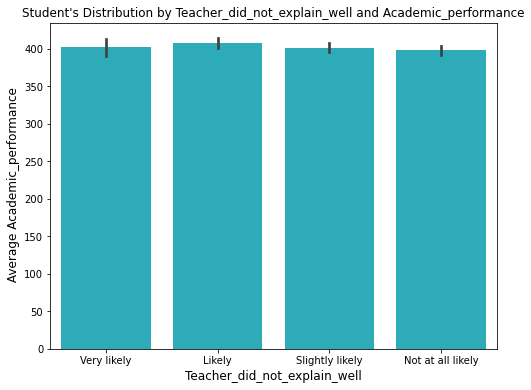

In [120]:
bivar_numcat('Teacher_did_not_explain_well', 'Academic_performance','bar'); 

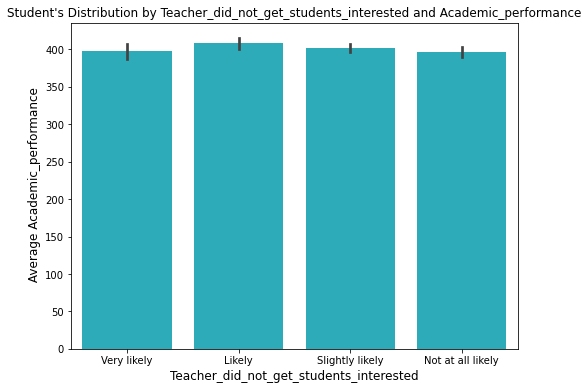

In [121]:
bivar_numcat('Teacher_did_not_get_students_interested','Academic_performance','bar'); 

### Observation 36: 
<div style="text-align: justify">
    
- Causal attribution refers to one’s perception of the factors that cause learning success and failure. Teachers' attitudes can help or hurt student motivation, achievement and well-being. Recent studies found that negative teacher attitudes can impair academic achievement and increase students' psychological disorders and physical symptoms of stress. Reports show that while teachers' positive attitudes have positive effects on students' performance and personality developments, negative attitudes have a negative effect on both the performance levels and personality development of students.

> - Teacher_did_not_get_students_interested and Teacher_did_not_explain_well variables are the variables attributed to student's failure. Although most students who partook in the assessment slightly attributed their failure to teachers not getting the students interested and that teachers did not explain well, however relating these variables with academic achievement gave another findings. 
> - In the plots above, one would have expected that the difference in the academic achievement score of students that performed the least and those that performed best academically will be wide enough to attribute student's academic failure to failure of teachers not getting students interested and teachers not explaining well to students. However, the plots suggest that there is only slight difference between these two sets of students(those that performed least and those that performed best academically).
>- The students that performed the best academically stated that they would likely attribute their failure to teachers not explaining well in class and teachers not getting them interested in the subjects taught. This can be summed up as negative teacher's attitudinal problem.
>- Therefore, teachers should show more interest towards the students, approach the students positively and use a variety of teaching methods in accordance with the students’ level.</div>

### Research Question 37:  How does teacher's suport influence the academic performance of students?

In [122]:
df_pisa_clean.groupby('Teacher_support')['Academic_performance'].median()

Teacher_support
Strongly agree       402.470727
Agree                406.085850
Disagree             411.691027
Strongly disagree    446.834847
Name: Academic_performance, dtype: float64

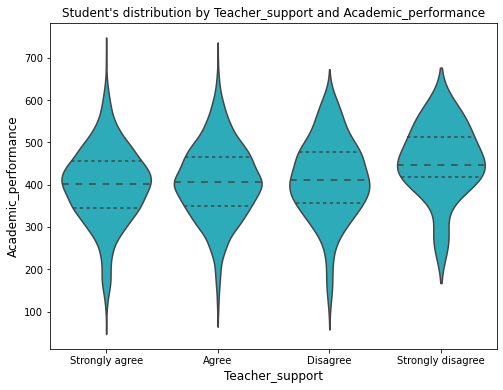

In [123]:
bivar_numcat('Teacher_support', 'Academic_performance','violin'); 

### Observation 37: 
<div style="text-align: justify">
    
> The ways that teachers respond to student behavior have a direct impact on whether it escalates or de-escalates as well as on student achievement. I looked into the relationship between teacher's support and academic achievement. 
> - The plots above showed that students that performed the best academically are those that strongly disagree that teacher support facilitates their academic perfomance. </div>

### Research Question 38:  What is the impact of student-teacher relationship on student's academic achievement?

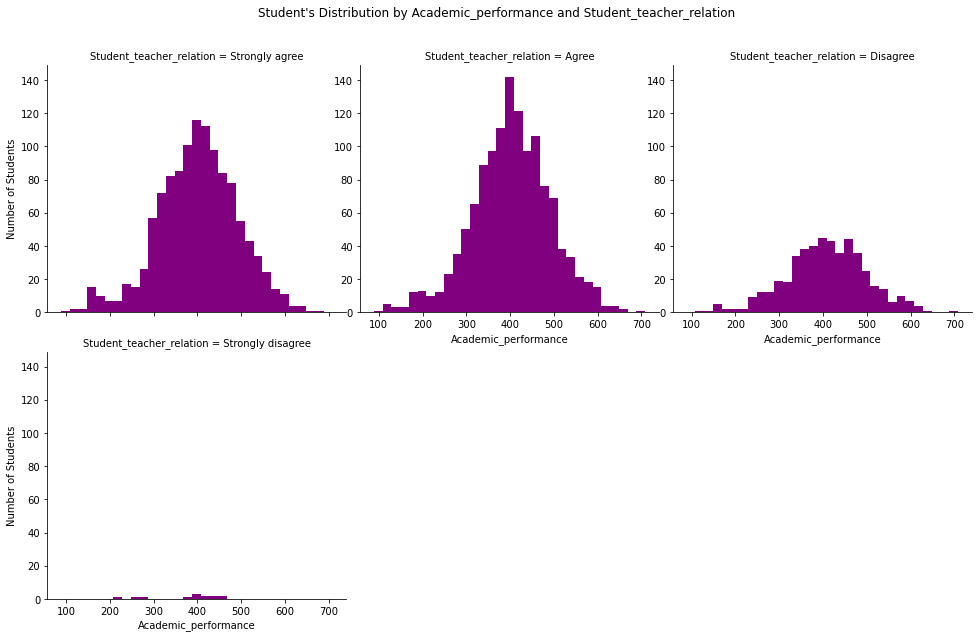

In [124]:
bivar_catnum('Academic_performance', 'Student_teacher_relation', col_wrap=3, height=4.5, bins=True)

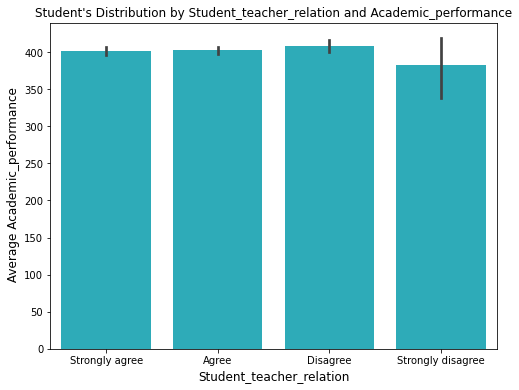

In [125]:
bivar_numcat('Student_teacher_relation','Academic_performance', 'bar'); 

### Observation 38: 
<div style="text-align: justify">
    
> The greatest important cause of failure in the beginning for a teacher lies in the area of interpersonal relationship. Cordial teacher-student relationship have several effects on students, some of which include; stimulates students motivation, stimulates students interest, enhances academic engagement, improves students commitment in the class, and enhances better academic performance.
> - The relationship between academic performance and student-teacher relation variables were analyzed. Although, most students agreed that there exist a good relationship between the students and the teachers, however most students disagree that the relationship between the students and the teachers influences their academic performance.
>- The plot also displayed that there is no wide difference in the academic achievement score of students who disagree to student-teacher relationship promoting their academic achievement and those that agree to student-teacher relationship promoting their academic achievement. 
> - Meanwhile, other forms of student-teacher relationship explored in this dataset gave similar conclusion. Therefore, for this dataset, it is unlikely that student-teacher relationship promotes student's academic achievement. </div>

#### Comment 10: 
After examining the relationship between academic performance and other variables, I also looked into the relationship between average learning time of students and other features. The code below was created to loop through the features so as to avoid code repetition.

### Research Question 39:  How does the highest educational level of parents affects the student's average learning time?

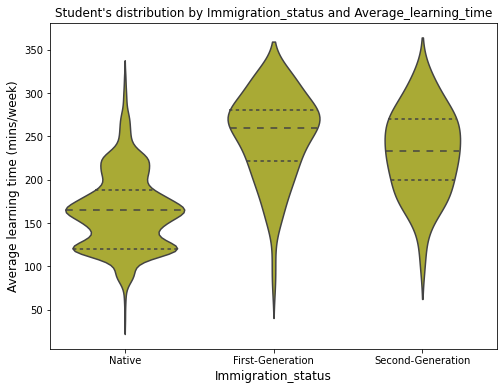

In [126]:
base_color =sb.color_palette()[8];
bivar_numcat('Immigration_status', 'Average_learning_time', "violin");
plt.ylabel("Average learning time (mins/week)");

### Observation 39:
<div style="text-align: justify">
    
> - This plot seeks to address the question of how the highest educational level of parents affects the student's average learning time. The plot show that there are more native students studying than the first and second-generation immigrant students as seen in the wider width of the native than the corresponding immigrant students. 
> - Also, the immigrant students spent MORE TIME LEARNING than the native students. This might be due to the pressure on the immigrant students to study harder to overcome the challenges facing them as immigrants; whereas the native students might be affected by "too comfortable syndrome" thereby spending less time learning as compared to other immigrant students. </div>

### Research Question 40:  Do students who repeated a class spend more time learning than those who did not repeat a class?

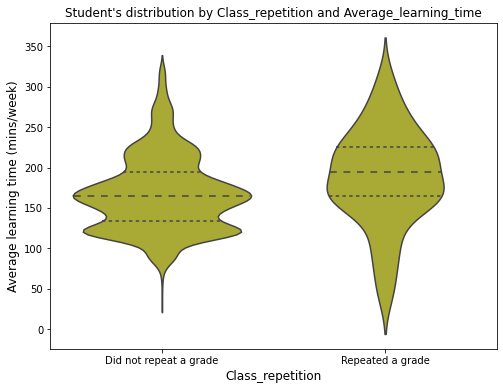

In [127]:
base_color =sb.color_palette()[8];
bivar_numcat('Class_repetition', 'Average_learning_time', "violin");
plt.ylabel("Average learning time (mins/week)");

### Observation 40:
<div style="text-align: justify">
    
> - This plot seeks to reveal the relationship between the Class_repetition and the average learning time. The wider width of the "did not repeat" category showed that students who did not repeat a grade are MORE than those that repeated. 
> - To answer the question above, the violinplot supports the expected fact that students who repeated a grade are likely to spend more time learning than those who DID NOT repeat a grade. This is evident in the time spent by those who DID NOT repeat a grade vs those that repeated a grade; **160mins/week _vs_ 200mins/week** respectively. The reason for such time difference could be because those who repeated a grade are a grade behind and so  will need to spent more time studying to make up for their studies than those who did not repeat a grade. </div>

### Research Question 41:  How does parent's highest educational level contributes to the average learning time of students?

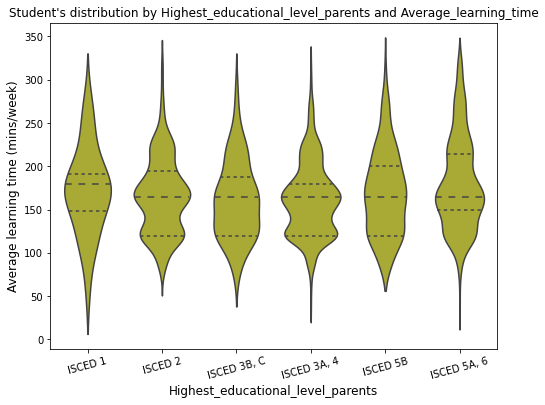

In [128]:
base_color =sb.color_palette()[8];
bivar_numcat('Highest_educational_level_parents', 'Average_learning_time', "violin");
plt.ylabel("Average learning time (mins/week)");
plt.xticks(rotation=15);

### Observation 41:
<div style="text-align: justify">
    
> - This plot seek to address how parent's highest educational level contribute to the average learning time of students. The violinplot also showed that students whose parent are at the ISCED 3A, 4 educational level are MORE than others as seen in its wider width. 
> - The plot also showed that students whose parents are at the ISCED 5A and ISCED 6 educational level spent the MOST time learning while the students whose parents are at the ISCED 3A, 3B, 3C and 4 educational level spent the LEAST time learning.
> - Therefore, the students whose parents had higher educational levels spent longer hours learning than students with parents of lower educational levels. </div>

### Research Question 42:  Is there a relationship between students who showed interest in mathematics and their average math literacy score?

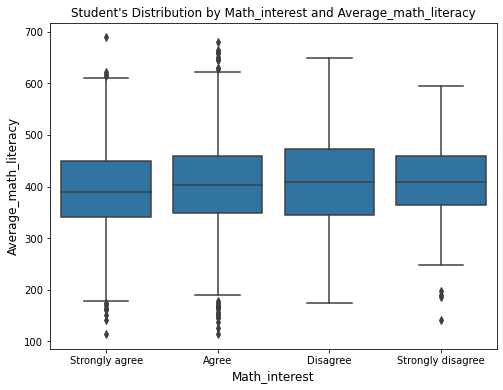

In [129]:
base_color =sb.color_palette()[0];
bivar_numcat('Math_interest', 'Average_math_literacy', "box");

### Observation 42:
<div style="text-align: justify">
    
> - This plot seek to examine the relationship between students who showed interest in mathematics and their average math literacy score. The violinplot above showed that the students that disagreed about their interest in mathematics had the highest score in average math literacy.
> - It is worth noting that there is just a slight difference in the academic achievement score of those that agreed and those that disgreed that their interest in mathematics positively influence their average mathematics literacy score. </div>

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

<div style="text-align: justify">
    
The relationship between the feature of interest (academic performance) and other features are as follows:
> - There is a strong positive relationship between the pairs; academic performance and individual average_math, average_science and average_reading literacies.
>- There is a weak positive relationship between the pair academic performance and average learning time variable.
>- The relationship between academic performance and country variables showed that students from the United Arab Emirates perform better academically than students from Albania.
> - There is a slight significant relationship between student's academic performance and gender, although female students outperform their male counterparts in their academic achievement tests. 
> - In similar manner, students that did not repeat a grade perform slightly better than those that repeated a grade in school.
> - The relationship between academic performance and immigration status showed that immigrants students perform better academically than the native students; following the order: **First-generation immigrants > Second generation immigrants > Natives**.
> - For the relationship between academic performance and highest educational level of parents, it can be summarized that students whose parents reached the highest level of education (**'ISCED 5A, 6'**) performed the best academically and those whose parents stopped at ISCED 1 performed the least. Thus, students whose parents have higher levels of education performed better academically than students with parents having lower level of education
> - The perseverance level(give up easily) of a student influences the student's academic performance in a positive way as students who are NOT MUCH likely to give up easily performed better academically than those that tend to give up easily.
> - Students who disagreed that classroom management(teacher keeps class orderly and teacher starts on time) promotes academic performance had the highest overall achievement score than those who agreed that class management promotes academic performance, although a slight difference. Perhaps, other forms of class management need to be considered before arriving at a valid conclusion that class management indeed does not promote student's academic achievement.
> - Students that performed the best academically stated that they would likely attribute their failure to teachers not explaining well in class and teachers not getting them interested in the subjects taught. This can be summed up as negative teacher's attitudinal problem.
> - In this PISA dataset, it is unlikely that student-teacher relationship promotes student's academic achievement.
> - In the relationship between academic performance and school does little to prepare me for life, the analysis revealed that students who performed best academically are prepared for life and better able to make the transition into life beyond school, adulthood and to achieve occupational and economic success. Hence, these students agreed that school does more to prepare them for life.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- > Yes I observe some interesting relationships between the other features besides those with the main feature of interest. The relationship between average learning time and some other features showed that:
> 1. - the immigrant students spent MORE TIME LEARNING than the native students.
> 2. - students who repeated a grade are likely to spend more time learning than those who DID NOT repeat a grade.
> 3. - students whose parents had higher educational levels spent longer hours learning than students with parents of lower educational levels.
- In addition, the examined relationships between the pairs; student's average math literacy and average science literacy, student's average math literacy and average reading literacy, and student's average science literacy and average reading literacy, showed that there exist strong positive correlation between these pairs. This implies that as one variable is increasing, the other variable is also increasing simultaneously. 
- Furthermore, students that disagreed about their interest in mathematics had the highest score in average math literacy.
- Other examined relationships among other features aside the main features can be seen in the appendix section, after the conclusion section of this report. </div>

### Comment 12: Other relationships among other variables can be found in the Appendix section which is the section after the conclusion section of this report.

## Multivariate Exploration

> In this section, plots of three or more variables in the PISA dataset were investigated. I made sure my investigations were justified, and follow from my work in the previous sections.

### Research Question 43:  How does Immigration status and Class repetition affect the Academic performance of students?

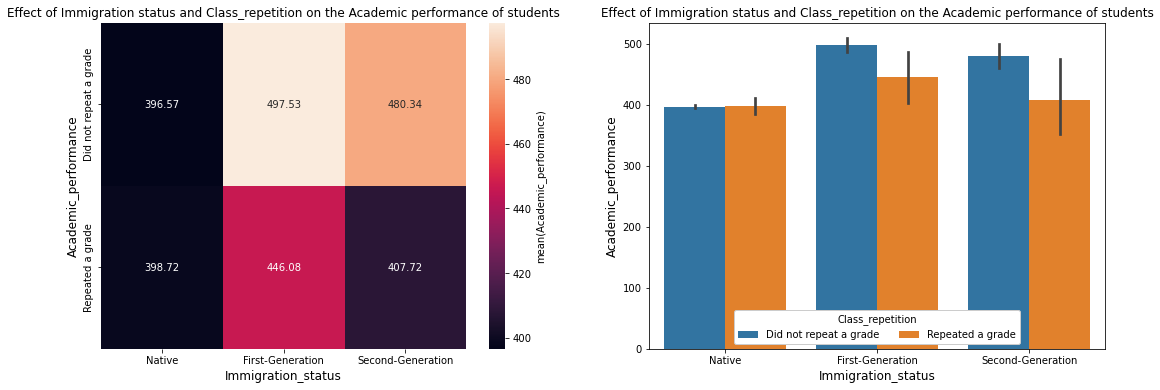

In [130]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
df_heatmap = df_pisa_clean.pivot_table(values='Academic_performance',index='Class_repetition',
                                       columns='Immigration_status',aggfunc=np.mean)
sb.heatmap(df_heatmap,annot=True, fmt = '.2f',
           cbar_kws = {'label' : 'mean(Academic_performance)'})
plt.xlabel('Immigration_status', fontsize =12)
plt.ylabel('Academic_performance', fontsize =12)
plt.title('Effect of Immigration status and Class_repetition on the Academic performance of students', fontsize =12);


plt.subplot(1,2,2)
ax = sb.barplot(data = df_pisa_clean, x = 'Immigration_status', y = 'Academic_performance', hue = 'Class_repetition')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Class_repetition');
plt.xlabel('Immigration_status', fontsize =12)
plt.ylabel('Academic_performance', fontsize =12)
plt.title('Effect of Immigration status and Class_repetition on the Academic performance of students', fontsize =12);

### Observation 43:
<div style="text-align: justify">
    
> To answer the question of how immigration status and Class repetition affect the academic performance of students, the relationship among Class_repetition, Immigration status and Academic performance were considered. 
> - The barplot showed that the native students who repeated a grade and those that did not repeat a grade performed in the same manner academically as there is no significant difference in these two categories. However, from the heatmap on the left, the analysis reveal that the native students that repeated a grade had a slightly higher score than those that did not repeat a grade.
> - For the immigrant students, those who did not repeat a grade performed better academically than those immigrant students that repeated a grade irrespective of whether they are first-, or second-generation immigrants. 
> - It can also be noticed that the immigrants that repeated a grade performed better academically than the native students irrespective of whether the latter repeated a grade or not. 
> - It can then be validated that alot is required of the immigrant students to perform better academically than the native students who are in their comfort zone. Thus, immigration status and Class_repetition are factors that influence the academic performance of students. </div>

In [155]:
def multi_catnum(num, cat1, cat2, kind, height, col_wrap):
    
    if kind == "bar" and height== None and col_wrap ==None:
        plt.figure(figsize=(13,11))
        ax = sb.barplot(data = df_pisa_clean, x = cat1, y = num, hue = cat2, palette='viridis_r')
        plt.setp(ax.axes, xlabel= cat1, ylabel= num);
        plt.title(f"Effect of Student's {cat1} and {cat2} on Academic Performance");
    
        
    elif kind == "heatmap" and height== None and col_wrap ==None:
        plt.figure(figsize=(18,5))
        df_heatmap = df_pisa_clean.pivot_table(values=num,index=cat1,
                                       columns=cat2,aggfunc=np.mean)
        sb.heatmap(df_heatmap,annot=True, fmt = '.2f', cbar_kws = {'label' : 'mean(num)'})
        plt.title(f"Effect of Student's {cat1} and {cat2} on Academic Performance");      
        
        
    elif kind == "violin" and height == height and col_wrap==col_wrap:
        g=sb.FacetGrid(data= df_pisa_clean, col = cat1, margin_titles=True, col_wrap=col_wrap, height =height)
        g.map(sb.violinplot, num, cat2, inner='quartile')
        g.fig.subplots_adjust(top=0.89);
        g.fig.suptitle(f"Effect of Student's {cat1} and {cat2} on Academic Performance");
        plt.show()


### Research Question 44:  Could immigration status and student's level of perseverance to give up easily hinder students from performing well academically?

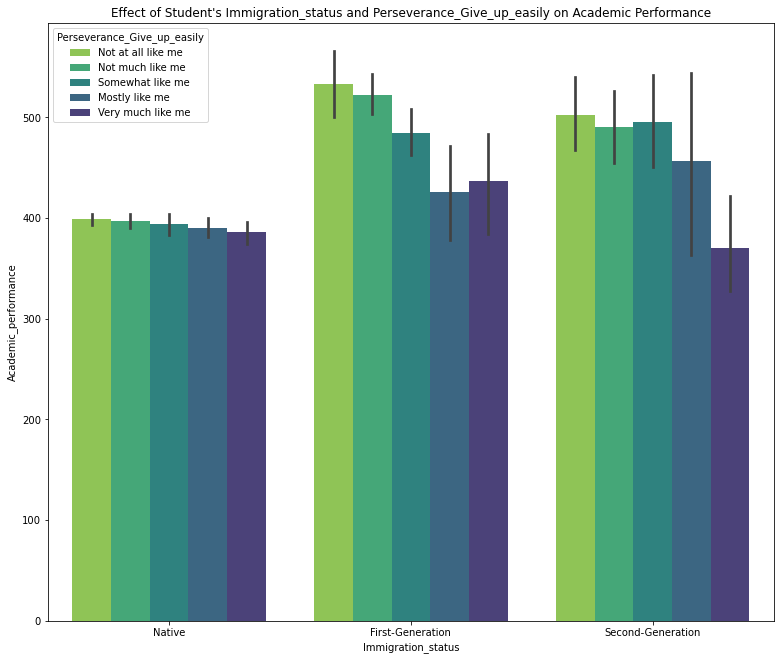

In [156]:
multi_catnum("Academic_performance", "Immigration_status","Perseverance_Give_up_easily", kind='bar', height=None, col_wrap=None)

### Observation 44: 
<div style="text-align: justify">
    
> To address if immigration status and student's level of perseverance to give up easily hinder students from performing well academically, the plot above was analyzed. 
> - The findings showed that among the native students, those who are NOT AT ALL likely to give up easily perform the best academically while those that are VERY MUCH likely to give up easily perform the least academically. The trend for native students to perform well academically in term of the perseverance level (give up easily) follows: 
**Not at all like me > Not much like me > Somewhat like me > Mostly like me > Very much like me**

>- For the immigrant students, there is a distinctive difference between those that are NOT AT ALL likely and those that are VERY MUCH likely to give up easily. The immigrants students who are NOT AT ALL likely to give up easily perform the best academically than students with other categories of perseverance level; with students who are VERY MUCH likely to give up being the least to perform well academically.
>- Therefore, we can conclude that the perseverance level of a student and the student's immigration status influence the student's academic performance.</div>

### Research Question 45:  Could parent's educational level be a contributory factor to student's class repetition academically?

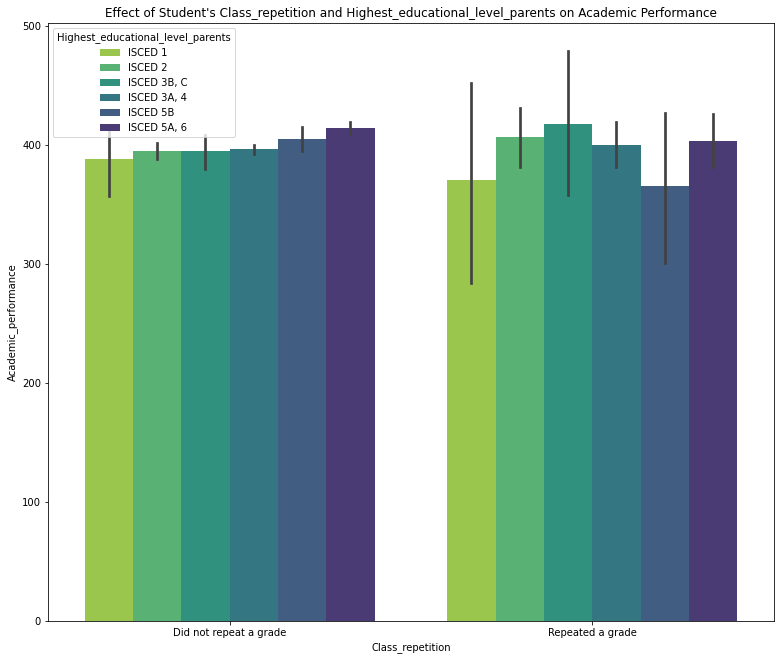

In [157]:
multi_catnum("Academic_performance", "Class_repetition","Highest_educational_level_parents", kind='bar', 
             height=None, col_wrap=None);

### Observation 45: 
<div style="text-align: justify">
    
> Looking at the relationship among Class repetition, highest educational level of parents and academic performance, it is clear that parent's educational level is a contributory factor to predict student's class repetition academically. It is expected that students whose parent's highest level of education is ISCED 5A,6 and  did not repeat a grade would perform the best academically and those whose parent's level of education is ISCED 1 and repeated a grade would perform woefully. 
> - As predicted, among students that DID NOT REPEAT a grade, students of parents with the highest level of education performed the best in their academic studies while students of parents with the lowest level of education had the lowest score.
> - An interesting finding was observed among students that REPEATED a grade. Students whose parent's highest level of education is ISCED 3B,C and repeated a grade perform the best academically, while students with parent's highest level of education being ISCED 5A,6 had the lowest score; lower than students of parent with ISCED 1.

> - To sum up, irrespective of whether the students repeated a grade or not, students whose parent's highest level of education is ISCED 3B,C and repeated a grade perform the best academically and students with parent's highest level of education being ISCED 5A,6 had the lowest score.

> - Several factors such as parent's occupational status, pressure on students from parents and others might be responsible for students with parent's highest level of education being ISCED 5A,6 having the lowest score.
>- The reason for students whose parent's highest level of education is ISCED 3B,C and repeated a grade, performing the best academically, is not far-fetched. It is likely that these set of students got extra parental support to perform better academically since they repeated a grade already. </div> 

### Research Question 46:  Is there a relationship between class repetition and student's perseverance level to give up easily on the academic performance of students?

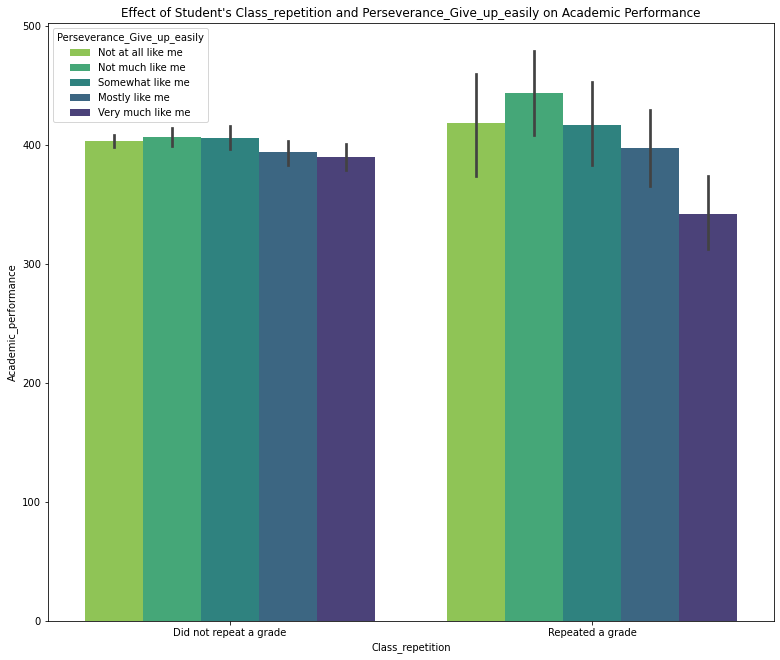

In [159]:
multi_catnum("Academic_performance", "Class_repetition","Perseverance_Give_up_easily", kind='bar', 
             height=None, col_wrap=None);

### Observation 46: 
The plot to address the effect of class repetition and student's perseverance level to give up easily on their academic studies reveal that:
- Whether students REPEATED a grade or NOT, students that are NOT MUCH likely to give up easily performed the best academically while those that are VERY MUCH LIKELY to give up easily are low-performing students.
- Across all students, students who REPEATED a grade AND are NOT MUCH LIKELY to give up easily scored higher than other students in their academic studies, irrespective of whether the other students repeated a grade or not.
- Hence, there is a positive relationship between class repetition and student's perseverance level to give up easily on the student's academic performance.

### Research Question 47:  Are parent's education level and student's perseverance level good predictors for a student's success in school?

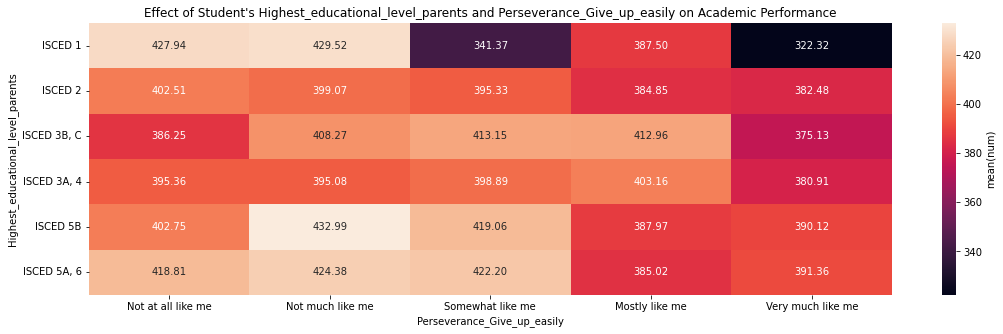

In [136]:
multi_catnum("Academic_performance", "Highest_educational_level_parents","Perseverance_Give_up_easily", 
             kind='heatmap', height=None, col_wrap=None)

C:\Users\OLALEKAN\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


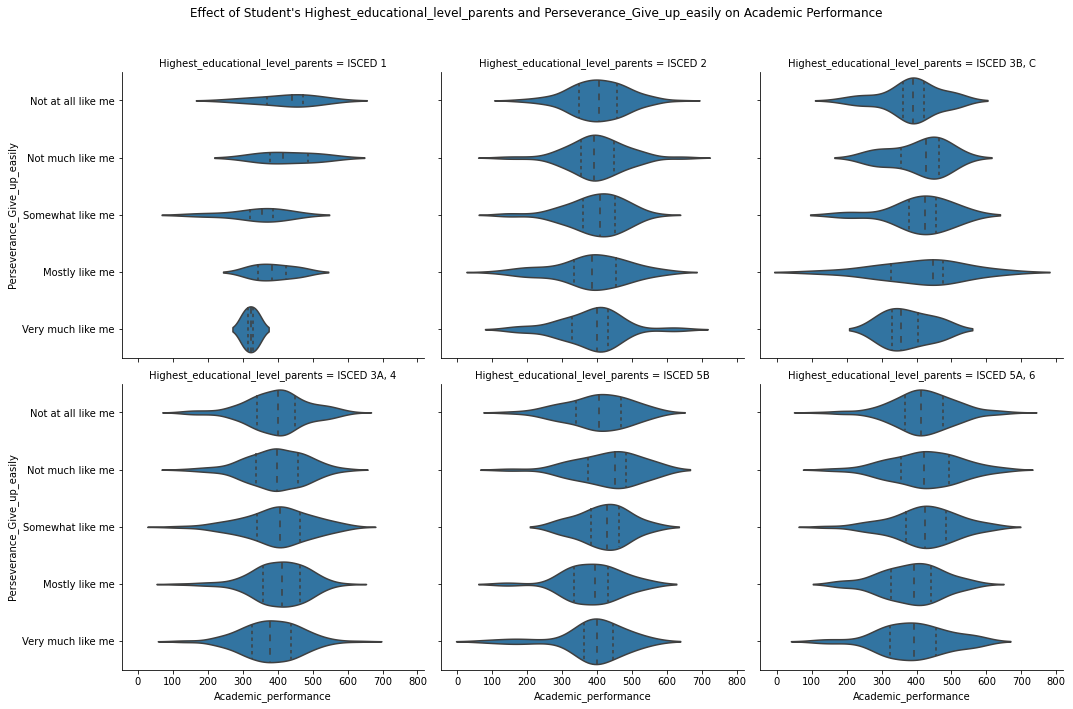

In [137]:
multi_catnum("Academic_performance", "Highest_educational_level_parents","Perseverance_Give_up_easily",
             kind='violin', height=5, col_wrap=3)

### Observation 47: 
<div style="text-align: justify">
    
- To address this question, the variables academic performance, perseverance give up easily and highest educational level of parents were plotted to look at the relationship among these. 
> - Among students whose parent's highest level of education is ISCED 1 and ISCED 2, those who are NOT MUCH LIKELY to give up easily performed best among all category of perseverance level and those who are VERY MUCH LIKELY to give up easily had the lowest score. 
> - For students whose parent's highest level of education is ISCED 3B, C, those who are SOMEWHAT LIKELY to give up easily had the highest score and those who are VERY MUCH LIKELY to give up easily had the lowest score. 
> - For students whose parent's highest level of education is ISCED 5B or ISCED 6, those who are NOT MUCH LIKELY to give up easily had the highest score and those who are MOSTLY LIKELY to give up easily had the lowest score.
> - Across all parental educational level, students whose parent's highest level of education is ISCED 5B and are NOT MUCH LIKELY to give up easily perform the best academically and those whose parent's highest level of education is ISCED 1 and are VERY LIKELY to give up easily had the lowest score. </div> 

In [138]:
# A loop was also created to explore relationship among other variables.

def multi_numcat(cat, num1, num2, kind, col_wrap, height):

    if kind == 'color_hue':
        g=sb.FacetGrid(data= df_pisa_clean, hue = cat, height = 7, aspect=1.5)
        g.map(sb.regplot,num1, num2, x_jitter =0.3, scatter_kws = {'alpha' : 0.8}, fit_reg=False)
        g.add_legend()
        g.fig.suptitle(f"Effect of Student's {cat} and {num1} on {num2}")
        
    elif kind== 'color_bar':
        plt.scatter(data= df_pisa_clean, x=num1, y=num2, c=num3, alpha = 1)
        plt.colorbar(label=num3)
        plt.xlabel(num1)
        plt.ylabel(num2)         
        plt.title((f"Effect of Student's {num3} and {num1} on {num2}"))
        
    elif kind == 'face':
        g=sb.FacetGrid(data= df_pisa_clean, col = cat, margin_titles=True, col_wrap=col_wrap, height =height)
        g.map(plt.scatter,num1, num2, alpha = 1)
        g.fig.subplots_adjust(top=0.89);
        g.fig.suptitle(f"Effect of Student's {cat} and {num1} on {num2}");
        plt.show()

### Research Question 48:  Are student's perseverance level and student's learning time good predictors for student's academic success in school? 

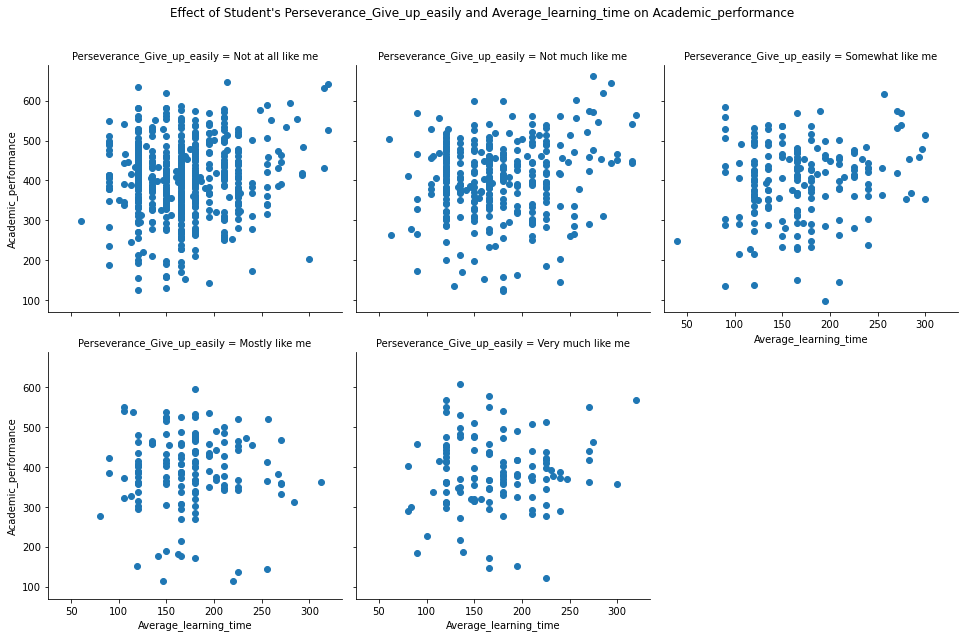

In [139]:
multi_numcat("Perseverance_Give_up_easily", "Average_learning_time",  "Academic_performance",
             kind = 'face', col_wrap= 3, height = 4.5)

### Observation 48: 
<div style="text-align: justify">
    
> Reports showed that countries with longer average learning time in regular school lessons tend to achieve higher scores. Also it was reported that effective time management is associated with greater academic performance and lower levels of anxiety in students. To answer the question above, three variables were analyzed; perseverance(give up easily), average learning time and academic performance. 
> - The plot above showed that students who DO NOT NECESSARILY give up easily, spent more time learning, resulting in better academic performance than those students who spent less time learning and tend to give up easily. This shows that there is a positive relationship between Perseverance level and average learning time for successful academic performance.</div> 

### Research Question 49:  What is the relationship between class repetition and student's average learning time towards achieving good academic performance?

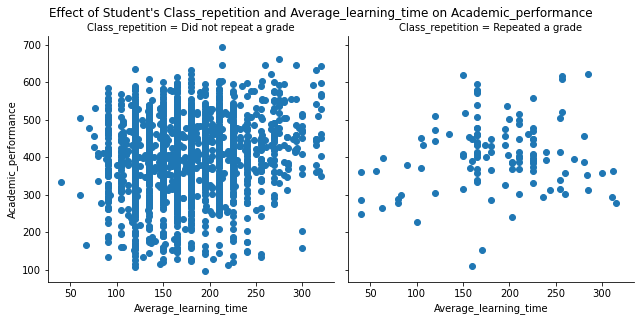

In [140]:
multi_numcat("Class_repetition", "Average_learning_time",  "Academic_performance", kind = 'face', col_wrap= 2, height = 4.5)

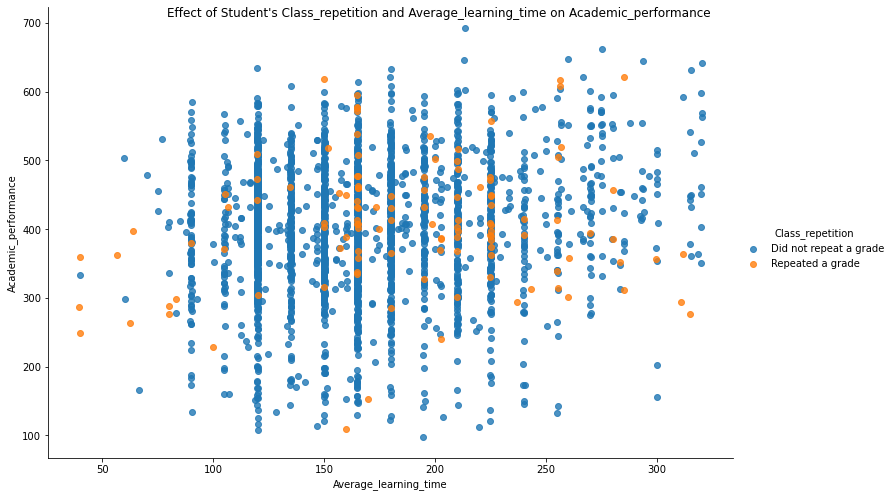

In [141]:
multi_numcat("Class_repetition", "Average_learning_time",  "Academic_performance",
             kind = 'color_hue', col_wrap= None, height = 4.5)

### Observation 49: 
<div style="text-align: justify">
    
The relationship among these three variables (Class repetition, average learning and academic performance) showed that;
> - 1. students who DO NOT repeat a grade and spent above 150 mins/week performed better academically than those who DID NOT repeat a grade and spent lesser time learning.
> - 2. students who repeated a grade and spent more than 150 mins/week to catch up with their studies performed better academically than those who repeated a grade and spent lesser than learning. This suggests that there is hope for students to perform better academically if they spent more time learning eventhough they repeated a grade. Repeating a grade should not be a barrier to performing well academically only if such students can spend more time learning.
> - 3. Whether a student repeated a grade or not, spending more time learning will boost a student's academic performance and increase the student's chance of succeeding in the outside world.

Therefore, we can conclude that there is a positive relationship between student's grade repetition and average learning time for successful academic performance. </div>

### Research Question 50:  What is the effect of immigration status and average learning time on student's academic performance?

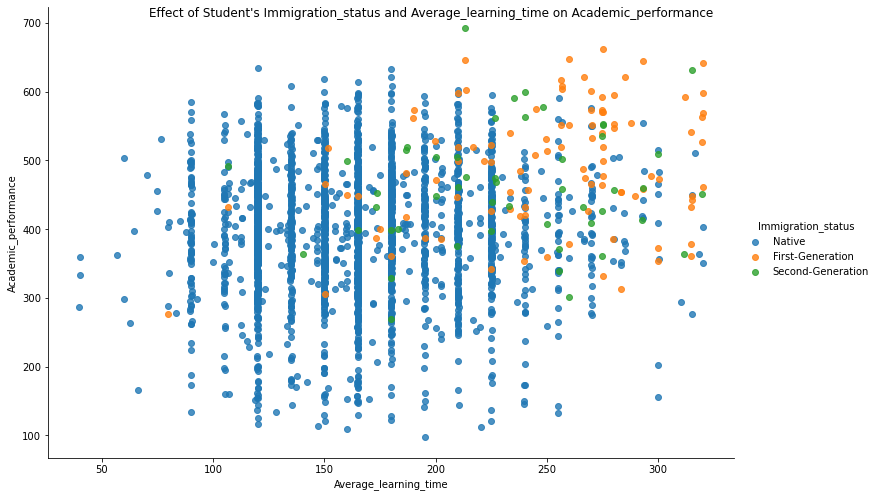

In [142]:
multi_numcat("Immigration_status", "Average_learning_time",  "Academic_performance",
             kind = 'color_hue', col_wrap= None, height = 4.5)

### Observation 50: 
<div style="text-align: justify">
    
To understand the effect of immigration status and average learning time on student's academic performance, the three parameters were analyzed. The plot as represented above showed that: 
- 1. Immigrant students spent more time learning than native students. 
- 2. Most of the immigrant students spent more than 180mins/week studying and hence, better academic performance. The zeal to learn for longer hours and to achieve better academic performance by the immigrants could be due to the greater expectation required of them to prove themselves as immigrant in a country since most immigrants are at disadvantaged in a foreign country.
- 3. All students (irrespective of their immigration status) who spent time above 170mins/week learning perform better academically than those who spent less than 170mins/week learning.</div>

### Research Question 51:  What is the effect of parent's highest level of education and average learning time on student's academic performance?

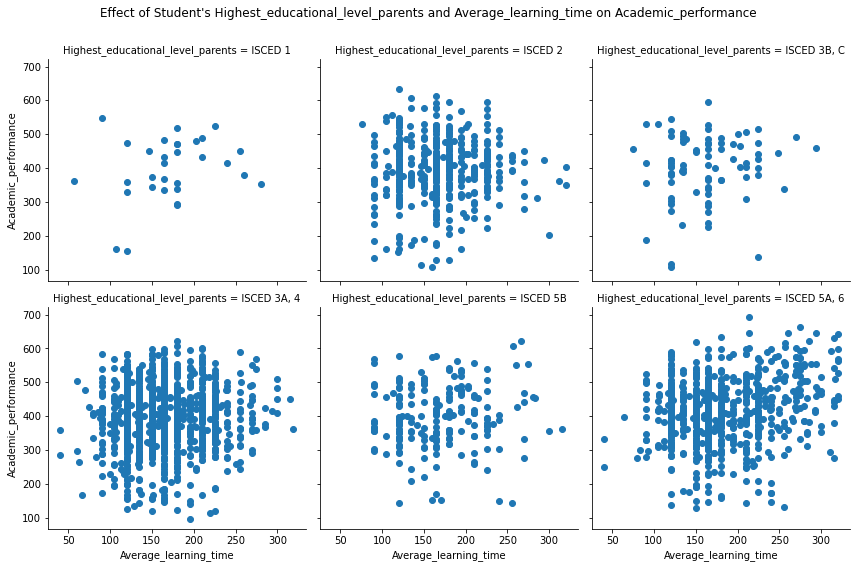

In [143]:
multi_numcat("Highest_educational_level_parents", "Average_learning_time",  "Academic_performance",
             kind = 'face', col_wrap= 3, height = 4)

### Observation 51: 
<div style="text-align: justify">
    
Analyzing the effect of parent's highest level of education and average learning time on student's academic performance, three variables were considered. 
> - The plot showing this analysis showed that students whose parents highest level of education is ISCED 5A, 6 spent more time learning and hence better academic performance than those of lower education level. 
> - Also, students whose parents highest level of education is low; ISCED 1, had academic performance score below 500 while those of parents with ISCED 5A, 6 level of education had academic score of above 500.
>- Therefore, the students whose parents had higher educational levels spend longer hours learning and tend to perform better academically than students with parents of lower educational levels and spend longer hours learning.
> -This signifies that there is a positive relationship between average learning time and parent's highest level of education towards a students academic performance. </div>

### Research Question 52: What is the effect of highest parental educational years and average learning time on student's academic performance? 

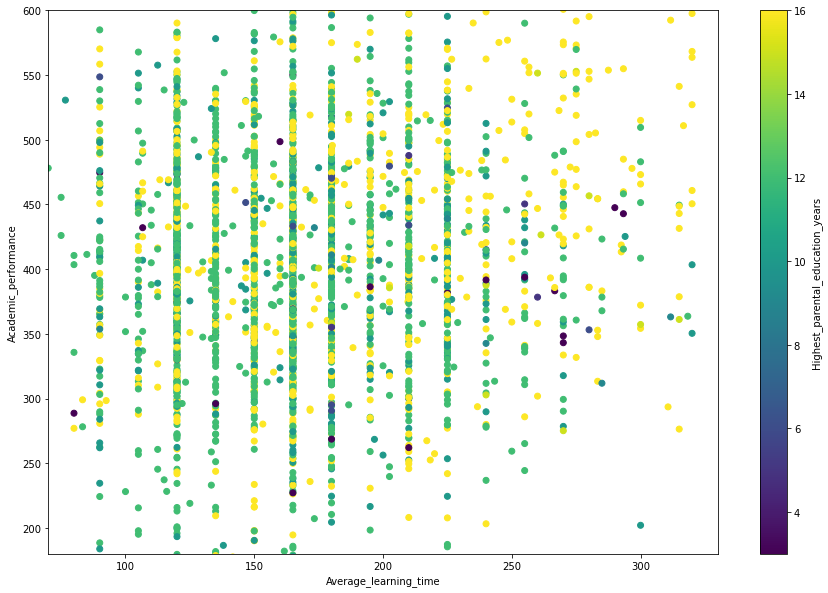

In [144]:
plt.figure(figsize = [15, 10])
plt.scatter(data= df_pisa_clean, x="Average_learning_time", y="Academic_performance", c="Highest_parental_education_years", 
            alpha = 1)
plt.colorbar(label='Highest_parental_education_years')
plt.xlabel('Average_learning_time')
plt.ylabel('Academic_performance')
plt.xlim(70, 330);
plt.ylim(180,600);

### Observation 52: 
<div style="text-align: justify">
    
> Similar to the findings from the effect of parent's highest level of education and average learning time on student's academic performance (observation 51), the relationship between highest parental educational years and average learning time towards a student's academic performance followed the same trend. 
> - Students whose parents spent 12years and above in education spent more time learning and thus showed better academic performance than those whose parents spent lower years in education. 
> - It means that there is a positive relationship between highest parental educational years and average learning time towards a student's academic performance.</div>

### Research Question 53:  What can be deduced from the relationship between the modal grade of a country and average learning time in student's academic performance? 

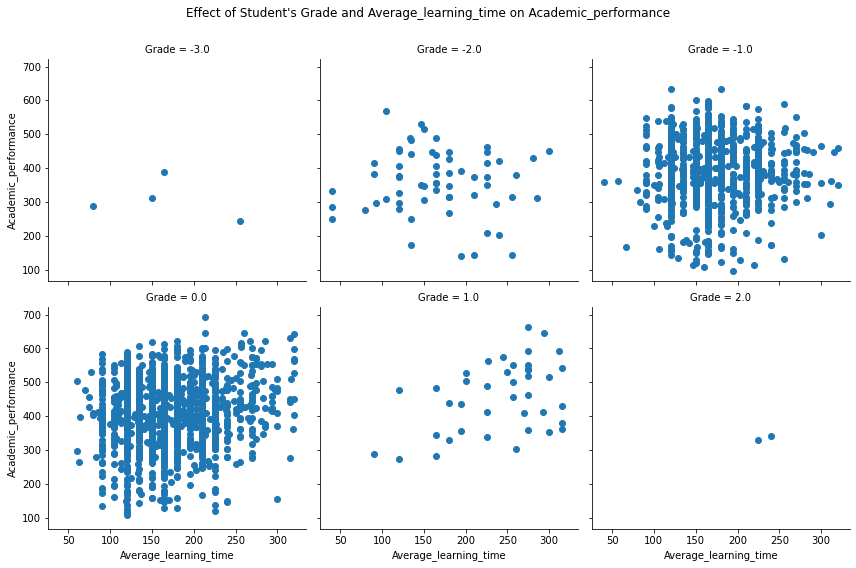

In [145]:
multi_numcat("Grade", "Average_learning_time",  "Academic_performance",
             kind = 'face', col_wrap= 3, height = 4)

### Observation 53: 
<div style="text-align: justify">
    
> Examining the relationship among the modal grade of a country, average learning time and academic performance showed that most students who are in the country's modal grade (zero) and above spent more time learning and hence better academic performance than those students who are below the modal grade in the country. </div>

### Action 8:
The next exploration involves the examining the relationship among four variables. I created a loop as seen below for this exploration too.

In [146]:
def quadri_var(num1, num2, cat1, cat2, title):
# I discovered that the top margin of the plot title differs from plot to plot. So I decided to use different top title margin
# so title was set True for some and None for some.

    if title == True:
        g = sb.FacetGrid(df_pisa_clean, col = cat1, hue=cat2, col_wrap=3, height= 4)
        g.map(sb.scatterplot, num1, num2, alpha=1);
        g.add_legend();
        plt.setp(g.axes, xlabel='Average_learning_time (mins/week)', ylabel='Academic_performance');
        g.figure.suptitle(f"Relationship among student's {num1}, {num2}, {cat1} and {cat2}")
        g.figure.subplots_adjust(top=.9)
        

    else:
        g = sb.FacetGrid(df_pisa_clean, col = cat1, hue=cat2, col_wrap=3, height= 4)
        g.map(sb.scatterplot, num1, num2, alpha=1);
        g.add_legend();
        plt.setp(g.axes, xlabel='Average_learning_time (mins/week)', ylabel='Academic_performance');
        g.figure.suptitle(f"Relationship among student's {num1}, {num2}, {cat1} and {cat2}")
        g.figure.subplots_adjust(top=.85)

### Research Question 54:  Analyze the relationship among student's perseverance (give up easily), class repetition, average learning time and academic performance, then state your observation.

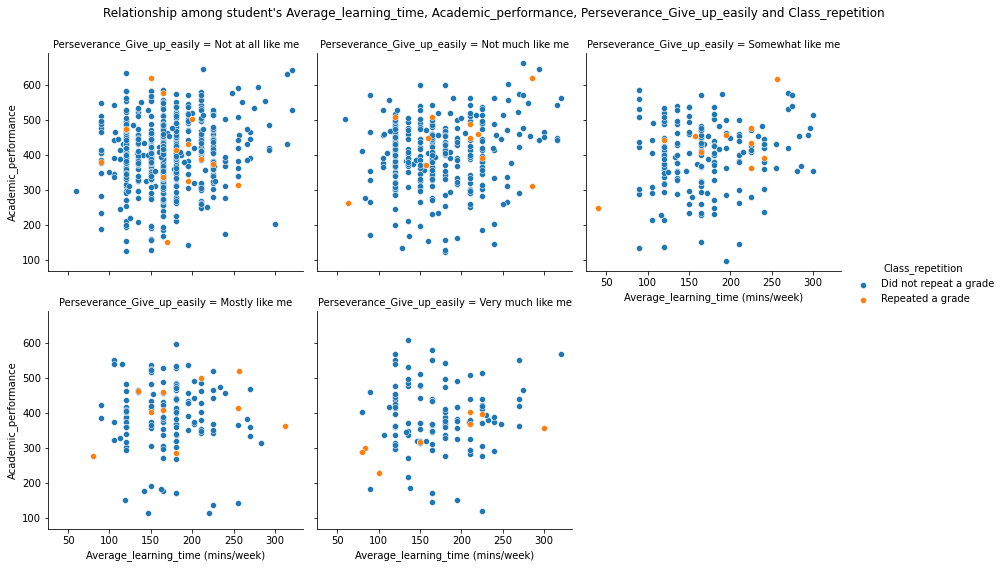

In [147]:
quadri_var('Average_learning_time', 'Academic_performance', 'Perseverance_Give_up_easily', 'Class_repetition', title=True)

### Observation 54: 
<div style="text-align: justify">
    
> Analyzing the relationships among four variables (Perseverance (Give up easily), Class repetition, Academic performance and Average learning time). The plot showed that the students that repeated a grade and are VERY MUCH likely to give up easily spent less time learning and thus lower academic performance while those who DID NOT repeat a grade and are NOT MUCH likely to give up easily, spent more time learning and hence better academic performance.</div>

### Research Question 55:   Analyze the relationship among student's immigration status, class repetition, average learning time and academic performance, then state your observation.

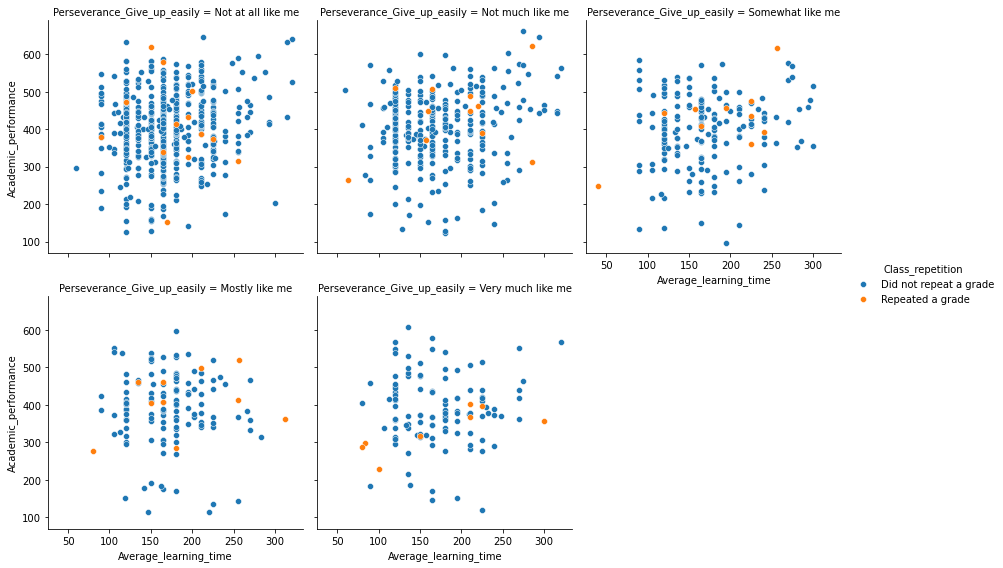

In [148]:
g = sb.FacetGrid(df_pisa_clean, col = 'Perseverance_Give_up_easily', hue="Class_repetition", col_wrap=3, height= 4)
g.map(sb.scatterplot, 'Average_learning_time', 'Academic_performance', alpha=1);
g.add_legend();

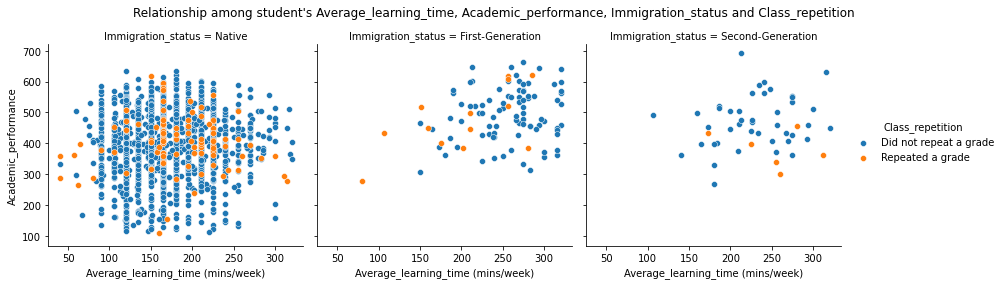

In [149]:
quadri_var('Average_learning_time', 'Academic_performance', 'Immigration_status', 'Class_repetition', title=None)

### Observation 55: 
<div style="text-align: justify">
    
> - Analyzing the relationships among four variables (Immigration status, Class repetition, Average learning time and Academic performance). The plot showed that the students that repeated a grade and that spent above 150mins/week learning tend to perform better academically than those that spent less than 150mins/week learning, irrespective of their immigration status.
> - In support of previous observation, most immigrant students who DID NOT repeat a grade spent more time learning and thus better academic performance.</div> 

### Research Question 56:   Analyze the relationship among student's perseverance level (give up easily), immigration status, average learning time and academic performance. Then state your observation.

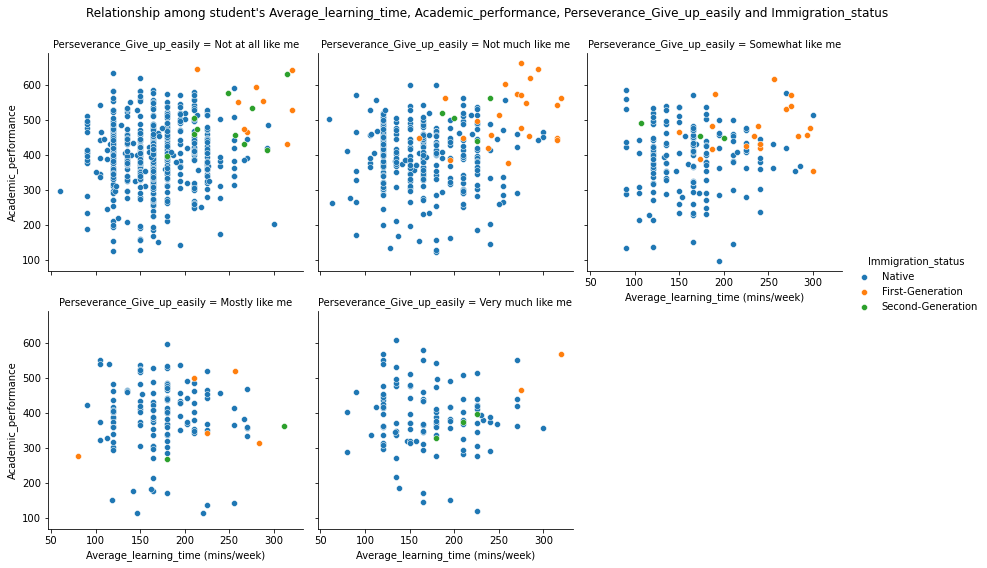

In [150]:
quadri_var('Average_learning_time', 'Academic_performance', 'Perseverance_Give_up_easily', 'Immigration_status', title=True)

### Observation 56: 
<div style="text-align: justify">
    
> - Analyzing the relationships among four variables (Perseverance (Give up easily), Immigration status, Average learning time  and Academic performance). The plot showed that most native students performed averagely well in their academics irrespective of their perseverance level.
> - There are less immigrant students who are VERY MUCH likely to give up easily so they spent more time learning and got better results in their academics.
> - Most immigrant students who are NOT MUCH likely to give up spent alot of time learning and they got better results than the native students who spent lesser time learning.</div> 

### Research Question 57: From the various analysis carried out, can you deduce whether students have learnt the school curriculum well enough or not?


### Observation 57: 
> From the various analysis carried out and plots visualized, I can say that more than 50% of the students have learnt the school curriculum well enough.

### Research Question 58: After the data exploration, can it be concluded that the students are well prepared for life beyond school?

### Observation 58: 
<div style="text-align: justify">
    
> After the data exploration, I can only say that some students are well prepared for life beyond school and some are not. This is so because academic subjects alone cannot determine whether a student is well prepared for life beyond school or not. Other factors such as student's orientation, ability to work unsupervised, time management and many more that could serve as predictor for preparedness for life beyond school was not available in the dataset provided.</div> 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

<div style="text-align: justify">
    
- Yes there were features that strengthened each other in terms of looking at my feature of interest. Some of the relationships between academic performance and other pairs of variables reveal that
> - 1. the immigrant students that repeated a grade performed better academically than the native students irrespective of whether the latter repeated a grade or not.
> - 2. the immigrants students who are NOT AT ALL likely to give up easily performed better academically than students in other categories of perseverance level.
> - 3. in the relationship among class repetition, highest educational level of parents and academic performance, irrespective of whether the students repeated a grade or not, students whose parent's highest level of education is ISCED 3B,C and repeated a grade perform the best academically and students with parent's highest level of education being ISCED 5A,6 had the lowest score.
 > - 4. all students (irrespective of their immigration status) who spent above 170mins/week learning performed better academically than those who spent less than 170mins/week learning when the effect of immigration status and average learning time on student's academic performance was analyzed.
> - 5. whether a student repeated a grade or not, spending more time learning will boost a student's academic performance and increase the student's chance of succeeding in the outside world. Therefore, it was concluded that there is a positive relationship between student's grade repetition and average learning time for successful academic performance.
> - 6. there is a positive relationship between average learning time and parent's highest level of education towards a students academic performance. More so, positive relationship between highest parental educational years and average learning time towards a student's academic performance further validates this observation.
> - 7. students who DO NOT NECESSARILY give up easily, spent more time learning, resulting in better academic performance than those students who spent less time learning and tend to give up easily. This shows that there is a positive relationship between student's perseverance level to give up easily and average learning time for successful academic performance. 
> - 8. most students who are in the country's modal grade (zero) and above spent more time learning and hence better academic performance than those students who are below the modal grade in the country. This is the findings observed in the relationship among the modal grade of a country, average learning time and academic performance.
> - 9. students that repeated a grade and are VERY MUCH likely to give up easily, spent less time learning and thus lower academic performance while those who DID NOT repeat a grade are NOT MUCH likely to give up easily so they spend more time learning and hence better academic performance. This is the findings obtained from analyzing the relationships among four variables Perseverance (Give up easily), Class repetition, Academic performance and Average learning time.</div>


### Were there any interesting or surprising interactions between features?
<div style="text-align: justify">
    
> Yes I oberved a surprising interaction between academic performance, highest educational level of parents and class repetition features.
> - 10. It is surprising to observe that students whose parent's highest level of education is ISCED 3B,C and repeated a grade perform the best academically, having the highest score in their academic performance, slightly higher than the score of students who did not repeat a grade and their parent's highest level of education being ISCED 5A, 6. Also, the result of the analysis showed that students whose parent's highest level of educational is ISCED 5B and DID repeat a grade perform the lowest academically; lower than students of parent with ISCED 1 and repeated a grade. Several factors might lead to this observation such as parent's occupational status, pressure on students from parents, etc.</div> 

## Conclusions

### Summary

<p style='text-align: justify;'>  
The factors affecting the academic performance of students in the Program for International Student Assessment (PISA) dataset were investigated. The summary of the investigation are as follows:
 
- In the PISA dataset exploration, I discovered that most students that took part in the assessment came from Albania than from the United Arab Emirates, however, students from the United Arab Emirates performed better academically than students from Albania. These students are mostly 15years old and they are more of female gender than male. The assumption of the female students outperforming male students in a range of indicators of academic performance was validated.  
   
- The relationship between the two engineered variables; average learning time and academic performance reveal that there is a positive correlation between these two variables, although very weak. This implies that as students spend more time in learning there is the higher probability of the students performing better than they did before in their academic studies. 

- Moreover, more native students partook in the assessment than either the first-, or second-generation immigrant students. But immigrant students perform better academically than the native students, hence immigration status has an impact on the academic performance of students in the PISA dataset analyzed. Of note is the finding that the both native and immigrant students are most likely NOT to repeat a grade than they are to repeat a grade. For the immigrant students, those who did not repeat a grade performed better academically than those immigrant students that repeated a grade irrespective of whether they are first-, or second-generation immigrants. It can also be noticed that the immigrant students that repeated a grade performed better academically than the native students; irrespective of whether the native students repeated a grade or not. 

- It is also worth mentioning that students of parents with higher levels of education or spent higher number of years in education, performed better academically than those with lower level of education; as the former may have an enhanced regard for learning, more positive ability beliefs, a stronger work orientation, and they may use more effective learning strategies than students of parents with lower levels of education. 

- The role of school in preparing students for life was validated as students who performed best academically are prepared for life and better able to make the transition into life beyond school, adulthood and to achieve occupational and economic success. In addition, students that performed the best academically stated that they would likely attribute their failure to teachers not explaining well in class and teachers not getting them interested in the subjects taught. This can be summed up as negative teacher's attitudinal problem.

- Meanwhile, it should be emphasized that students who are not likely to give up easily in their academic studies performed better academically than those that tend to give up easily. In addition, students who do not necessarily give up easily, spent more time learning, and thus better academic performance than those who tend to give up easily. Also, whether students REPEATED a grade or NOT, students that are NOT MUCH likely to give up easily performed the best academically while those that are VERY MUCH LIKELY to give up easily are low-performing students. Across all students, students who REPEATED a grade AND are NOT MUCH LIKELY to give up easily scored higher than other students in their academic studies, irrespective of whether the other students repeated a grade or not.

- Finally, in this PISA dataset, it is unlikely that student-teacher relationship and classroom management promote student's academic achievement.
   

- Besides the main variable of interest, I also looked into the relationships between average learning time and other variables. I found that immigrant students spent more time learning than the native students. Also, as expected, students who repeated a grade spent more time learning (to cover up for lost ground) than those who did not repeat a grade. It should also be worth noting that students of parents with higher educational years/level spent longer time learning than students of parents with lower educational years/level. 
- In conclusion, I also discovered that irrespective of a student's immigration status, grade repetition status, parent's educational level, or the tendency to give up easily, students who spent more time learning perform better academically than those that spent less time learning.</p>  

### Limitation 
<div style="text-align: justify">
    
> 1. Enough features such as internet connection, ICT at home or in school, student's attitudes, student's ability to acquire skills (to find a job, search for job, write resume, go for job interview) and many more that could help me detect other factors that influence student's academic performance were not available in the PISA dataset provided. These features could also help to test whether students are well prepared for life beyond school or not. 
> 2. There are over 600 features to be explored and given the time frame, many of these features could not be examined. Examining most of the features and documenting the findings will require more time than the one provided by Udacity to finish up this project.</div>

### Additional Research
<div style="text-align: justify">
    
> 1. It would be helpful to research into the other features/variables not explored, most especially, the teacher's role, teaching methods, learning environment, dificulty in understanding, teacher-to-student ratio, interest, information about the labour market, home educational resources, attribution to failare and many more as factors in determining student's academic performance and as determinants to examine how well students are ready for life beyond school.</div>

### References
> 1. https://www.childtrends.org/indicators/immigrant-children
> 2. https://ec.europa.eu/eurostat/documents/1978984/6037342/ISCED-EN.pdf
> 3. https://books.google.com.ng/books?id=Yw9GAgAAQBAJ&pg=PA261&lpg=PA261&dq=Grade+compared+to+modal+grade+in+country&source=bl&ots=p1qgcM6iNJ&sig=ACfU3U2wEWEaWfFrDf-DDCib6YMPTVDlyw&hl=en&sa=X&ved=2ahUKEwifh6Tinb35AhVGVfEDHRs-AcwQ6AF6BAgYEAM#v=onepage&q=Grade%20compared%20to%20modal%20grade%20in%20country&f=false
> 4. https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c
> 5. https://www.quora.com/How-can-I-remove-outliers-in-a-large-dataset-with-pandas
> 6. https://stackoverflow.com/questions/44620465/why-did-reset-indexdrop-true-function-unwantedly-remove-column
> 7. https://www.geeksforgeeks.org/how-to-adjust-title-position-in-matplotlib/
> 8. https://mldoodles.com/matplotlib-pie-chart/
> 9. https://stackoverflow.com/questions/36573789/python-seaborn-facetgrid-change-xlabels
> 10. https://stackoverflow.com/questions/72196032/how-to-customize-histogram-using-seaborn-facetgrid
> 11. https://stackoverflow.com/questions/29813694/how-to-add-a-title-to-seaborn-facet-plot
> 12. https://seaborn.pydata.org/tutorial/color_palettes.html
> 13. https://www.geeksforgeeks.org/replacing-missing-values-using-pandas-in-python/
> 14. https://medium.com/@uknak/school-do-not-prepare-us-for-the-real-world-47adfb25bd9f
> 15.https://www.theschooloflife.com/article/success-at-school-vs-success-in-life/
> 16.https://medium.com/@uknak/school-do-not-prepare-us-for-the-real-world-47adfb25bd9f
> 17.https://files.eric.ed.gov/fulltext/EJ1266806.pdf
> 18.https://info.retiredteachers.org/blog/how-does-classroom-management-promote-student-learning
> 19.https://files.eric.ed.gov/fulltext/EJ1232893.pdf
> 20.https://www.researchgate.net/publication/339720791_Academic_achievement_among_university_students_The_role_of_causal_attribution_of_academic_success_and_failure.
> 21.https://samphina.com.ng/impact-teacher-student-relationship-academic-performance/
> 22. https://www.nepjol.info/index.php/jdse/article/download/27958/23066/82820
> 23. https://ec.europa.eu/eurostat/statistics-explained/index.php?title=First_and_second-generation_immigrants_-_statistics_on_education_and_skills.
> 24. Google search engine
> 25. ALX-Udacity Data Analysis Slack forum

### APPENDIX

### Research Question 59: Highlight the relationships between the other features (excluding academic performance and average learning time). Are there any interesting relationships among all these features

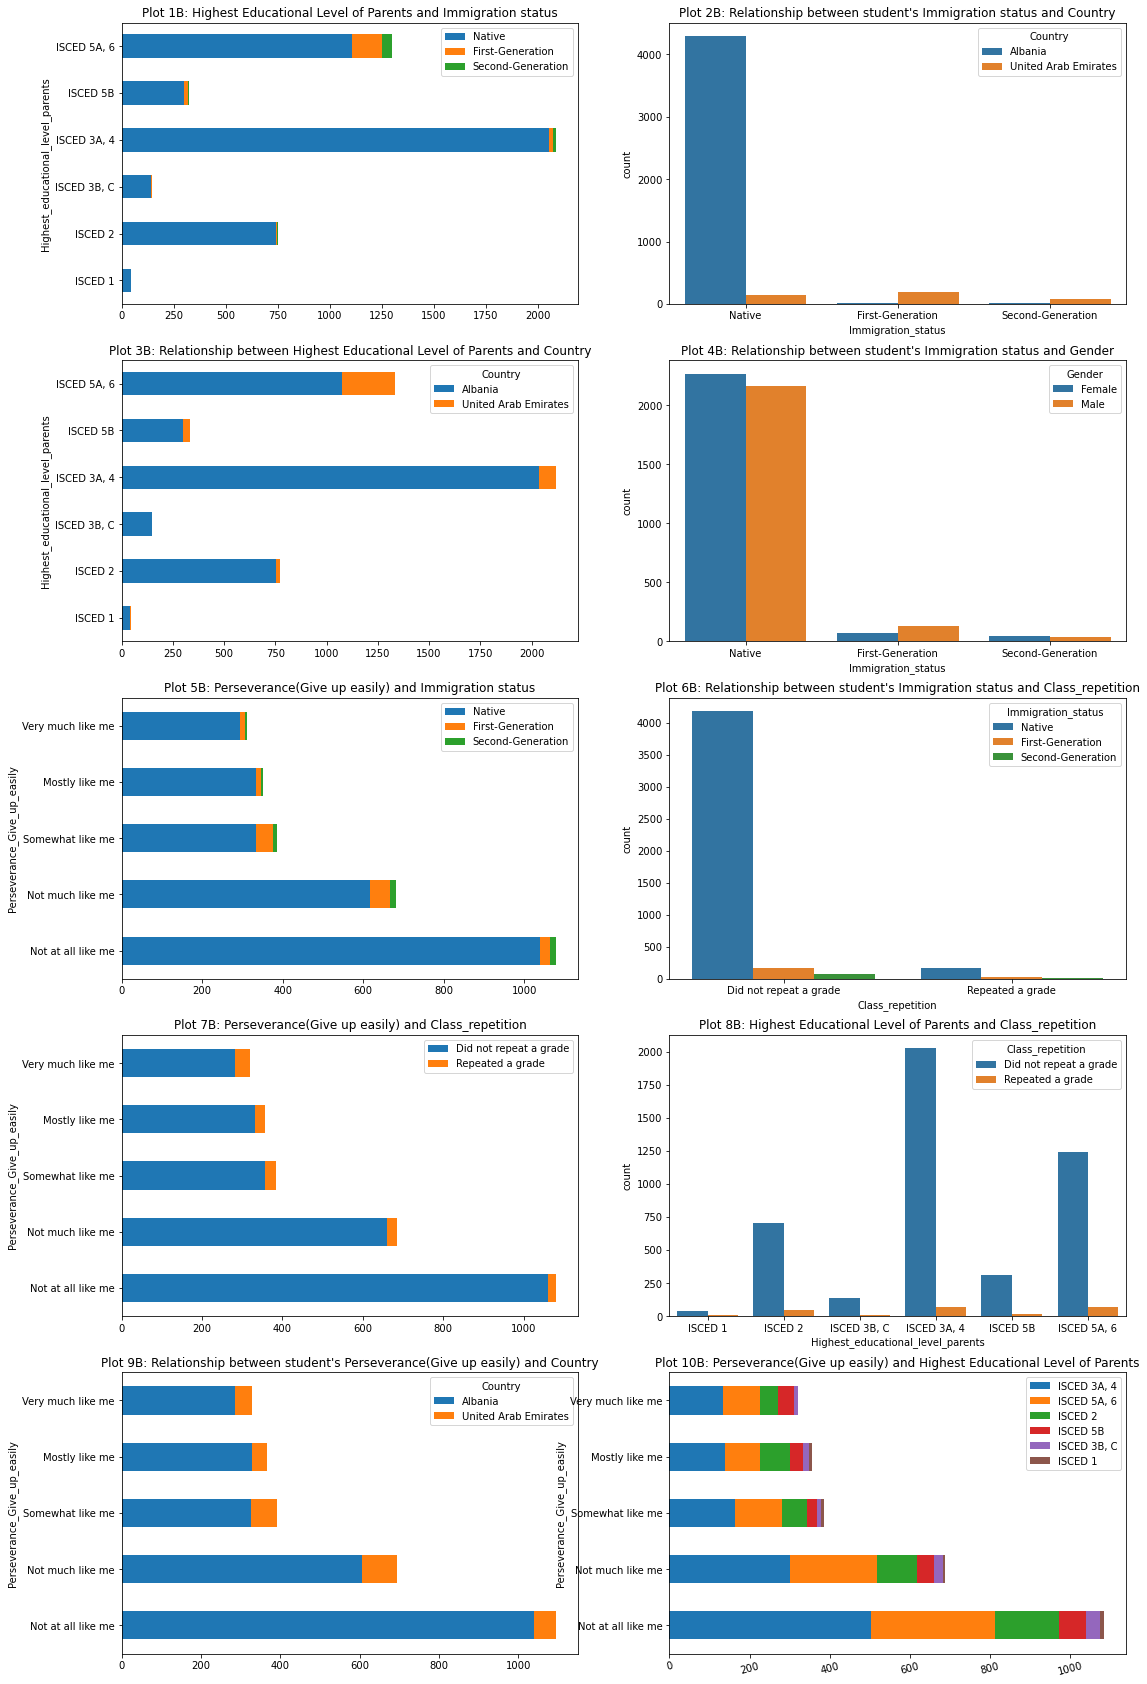

In [151]:
fig, ax = plt.subplots(5,2, figsize=(18, 30))

ax1 = df_pisa_clean.groupby(['Highest_educational_level_parents'])['Immigration_status'].value_counts().unstack().plot(kind='barh',
                                                                                                                 stacked = True, ax=ax[0][0])
plt.gca().invert_yaxis()
ax[0][0].title.set_text("Plot 1B: Highest Educational Level of Parents and Immigration status")


sb.countplot(data=df_pisa_clean, x='Immigration_status', hue='Country',  ax=ax[0][1])
ax[0][1].title.set_text("Plot 2B: Relationship between student's Immigration status and Country")

ax2 = df_pisa_clean.groupby(['Highest_educational_level_parents'])['Country'].value_counts().unstack().plot(kind='barh',
                                                                                                                 stacked = True,ax=ax[1][0])
ax[1][0].title.set_text("Plot 3B: Relationship between Highest Educational Level of Parents and Country")


sb.countplot(data=df_pisa_clean, x='Immigration_status', hue='Gender', ax=ax[1][1])
ax[1][1].title.set_text("Plot 4B: Relationship between student's Immigration status and Gender")


ax3 = df_pisa_clean.groupby(['Perseverance_Give_up_easily'])['Immigration_status'].value_counts().unstack().plot(kind='barh',
                                                                                                                 stacked = True, ax=ax[2][0])
plt.gca().invert_yaxis()
ax[2][0].title.set_text("Plot 5B: Perseverance(Give up easily) and Immigration status")


sb.countplot(data=df_pisa_clean, x='Class_repetition', hue= 'Immigration_status', ax=ax[2][1])
ax[2][1].title.set_text("Plot 6B: Relationship between student's Immigration status and Class repetition")


ax4 = df_pisa_clean.groupby(['Perseverance_Give_up_easily'])['Class_repetition'].value_counts().unstack().plot(kind='barh',
                                                                                                                 stacked = True, ax=ax[3][0])
plt.gca().invert_yaxis()
ax[3][0].title.set_text("Plot 7B: Perseverance(Give up easily) and Class repetition")


sb.countplot(data=df_pisa_clean, x='Highest_educational_level_parents', hue='Class_repetition', ax=ax[3][1])
ax[3][1].title.set_text("Plot 8B: Highest Educational Level of Parents and Class repetition");
plt.xticks(rotation=15);


ax5 = df_pisa_clean.groupby(['Perseverance_Give_up_easily'])['Country'].value_counts().unstack().plot(kind='barh',
                                                                                                                 stacked = True, ax=ax[4][0])
plt.gca().invert_yaxis()
ax[4][0].title.set_text("Plot 9B: Relationship between student's Perseverance(Give up easily) and Country")


ax6 = df_pisa_clean.groupby(['Perseverance_Give_up_easily'])['Highest_educational_level_parents'].value_counts().unstack().plot(kind='barh',
                                                                                                                 stacked = True, ax=ax[4][1])
ax[4][1].title.set_text("Plot 10B: Perseverance(Give up easily) and Highest Educational Level of Parents")

### Observations 59:
- Plot 1B: In the relationship between highest educational level of parents **(HELP)** and Immigration status, the plot depicts that **among the native students**, students whose parent highest educational level is at **ISCED 3A and ISCED 4** are more than those whose parents are at other educational level. For all the immigrant students, students whose parents highest educational level is at **ISCED 5A and ISCED 6**  are more than students of parents at other educational level. The trend follows the order:
>- Native students = ISCED 3A, 4 **>** ISCED 5A, 6 **>** ISCED 2 **>** ISCED 5B **>** ISCED 3B, C **>** ISCED 1.
>- First-generation immigrant students = ISCED 5A, 6 **>** ISCED 3A, 4 **>** ISCED 5B.
>- Second-generation immigrant students = ISCED 5A, 6 **>** ISCED 5B **>** ISCED 3A, 4.

- Plot 2B: This plot looked at the relationship between Country and Immigration status. The plot indicate that in Albania, MORE native students partook in the survey than first-, and second-generation immigrant students. In the United Arab Emirates, the reverse is the case as students who partook in the PISA assessment are MOSTLY first-generation immigrant students followed by the native students and finally the second-generation immigrant students.
> - ALBANIA = Natives > First-generation immigrants > Second-generation immigrants. 
> - United Arab Emirates = First-generation immigrants > Natives > Second-generation immigrants.

- Plot 3B: The plot depicts the relationship between Country and HELP. The plot show that in Albania, the students whose parent's highest educational level is at ISCED 3A, 4 are more than students of parents of other educational level. However in the United State of Emirate, the students whose parent's highest educational level is at ISCED 5A, 6 are the most, more than students of parents of other educational level.

- Plot 4B: This plot seek to answer the question of what the gender distribution of immigrant students are in the PISA dataset. It reveal the relationship between the Immigration status and Gender. From the plot, native students and second-generation immigrant students that partook in the assessment are majorly female while for first-generation immigration students, male gender partook MORE in the assessment than the female gender.

- Plot 5B: Is the immigration status of students a strong determinant for student's perseverance level to give up easily? This plot seek to address the question by analyzing the relationship between students who give up easily and the immigration status of the student. The plot illustrates that among **native students**, those who are NOT likely to give up easily are more than those that are likely to give up easily. However, among the immigrants students; whether first-, or second-generation, those who are NOT MUCH likely to give up easily are more than others who are either very much likely or not likely to give up easily. It is worth noting that the native students who are very much likely to give up easily are MORE than the immigrants students who are NOT MUCH likely to give up easily, irrespective of whether they are first-, or second-generation immigrants. 
>- Native students = Not at all likely **>** Not much likely **>** Somewhat likely **~** Mostly likely **>** Very much likely to give up easily.
>- First-generation immigrant students =  Not much likely **>** Somewhat likely **>** Not at all likely **>** Very much likely **>** Mostly likely to give up easily.
>- Second-generation immigrant students = Not much likely **>** Not at all likely to give up easily.

- Plot 6B: This plot addresses the question of how the immigration status of students influences if student will repeat a grade or not. It specifically show the relationship between Class repetition and Immigration status. Among all that partook in the assessment, students who did not repeat a grade are mostly native students while students who repeated a grade are also mostly native students. 
>- Student who did not repeat a grade = Natives > First-generation immigrants > Second-generation immigrants. 
> - Students who repeated a grade = Natives > First-generation immigrants == Second-generation immigrants 

- Plot 7B: In similar manner, this plot addresses the relationship between class repetition and student's perseverance level of giving up easily. As expected, students who do not repeat a grade are NOT much likely to give up easily and those that repeated a grade are VERY MUCH likely to give up easily. 
> - Students who did not repeat a grade = Not at all likely **>** Not much likely **>** Somewhat likely **>** Mostly likely **>** Very much likely to give up easily.
> - Students who repeated a grade = Very much likely **>** Mostly likely **~** Somewhat likely **>** Not much likely  **>** Not at all likely to give up easily.

- Plot 8B: The question of how the educational level of parent determine whether a student will repeat a grade or not was answered here. The plot examine the relationship between **HELP** and Class repetition. The analysis reveal that the students who did not repeat a grade are more than those that repeated irrespective of their parent's highest educational level. The number of students who did not repeat are MOST with students whose parents are at the ISCED 3A, 4 educational level.

- Plot 9B: The relationship between student's perseverance level of giving up easily and Country is illustrated in this plot. In Albania, students who are NOT AT ALL likely to give up easily are more than those who are VERY MUCH likely to give up easily in their studies. Moreover, in the United Arab Emirates, students who are NOT MUCH likely to give up easily are more than other forms of giving up easily. 
> - Albania = Not at all likely **>** Not much likely **>** Somewhat likely **>** Mostly likely **>** Very much likely to give up easily.
> - United Arab Emirates = Not much likely  **>** Somewhat likely **>**  Not at all likely **>** Very much likely **>** Mostly likely to give up easily.

- Plot 10B: It is true that you cannot give what you do not have. The relationship between students that are likely to either give up easily or not with parent's highest educational level depicts this. The illustration as represented in plot 10B showed that students whose parents have the highest level of education (ISCED 3 and above)  are NOT likely to give up easily than students whose parents barely have educational level (ISCED 1).